In [2]:
from monai.utils import first, set_determinism
from monai.transforms import(
    Compose,
    AddChanneld,
    LoadImaged,
    Resized,
    ToTensord,
    Spacingd,
    Orientationd,
    ScaleIntensityRanged,
    CropForegroundd,
    Activations,
)

from monai.networks.nets import UNet
from monai.networks.layers import Norm
from monai.data import CacheDataset, DataLoader, Dataset

from monai.losses import DiceLoss, DiceCELoss

import torch
from preparation import prepare
from utils import train

import torch
import matplotlib.pyplot as plt

import os
from glob import glob
import numpy as np

from monai.inferers import sliding_window_inference

In [5]:




data_dir = r'C:\Users\Dikshant Sharma\Documents\Github\Computer Vision\Image Segmentation\data\train_test'
model_dir = r'C:\Users\Dikshant Sharma\Documents\Github\Computer Vision\Image Segmentation\model' 
print("Preparation Started: ")
data_in = prepare(data_dir, cache=True)
print("Preparation Done.....")
device = torch.device("cuda:0")
model = UNet(
    dimensions=3,
    in_channels=1,
    out_channels=2,
    channels=(16, 32, 64, 128, 256), 
    strides=(2, 2, 2, 2),
    num_res_units=2, 
    norm=Norm.BATCH,
).to(device)


#loss_function = DiceCELoss(to_onehot_y=True, sigmoid=True, squared_pred=True, ce_weight=calculate_weights(1792651250,2510860).to(device))
loss_function = DiceLoss(to_onehot_y=True, sigmoid=True, squared_pred=True)
optimizer = torch.optim.Adam(model.parameters(), 1e-5, weight_decay=1e-5, amsgrad=True)

train(model, data_in, loss_function, optimizer, 100, model_dir)

Preparation Started: 


Loading dataset: 100%|█████████████████████████████████████████████████████████████████| 71/71 [03:31<00:00,  2.98s/it]


Preparation Done.....
----------
epoch 1/100
1/299, Train_loss: 0.5603
Train_dice: 0.4397
2/299, Train_loss: 0.6047
Train_dice: 0.3953
3/299, Train_loss: 0.5579
Train_dice: 0.4421
4/299, Train_loss: 0.4759
Train_dice: 0.5241
5/299, Train_loss: 0.4339
Train_dice: 0.5661
6/299, Train_loss: 0.4756
Train_dice: 0.5244
7/299, Train_loss: 0.6040
Train_dice: 0.3960
8/299, Train_loss: 0.5538
Train_dice: 0.4462
9/299, Train_loss: 0.4531
Train_dice: 0.5469
10/299, Train_loss: 0.4132
Train_dice: 0.5868
11/299, Train_loss: 0.4968
Train_dice: 0.5032
12/299, Train_loss: 0.6041
Train_dice: 0.3959
13/299, Train_loss: 0.6025
Train_dice: 0.3975
14/299, Train_loss: 0.5724
Train_dice: 0.4276
15/299, Train_loss: 0.4951
Train_dice: 0.5049
16/299, Train_loss: 0.4320
Train_dice: 0.5680
17/299, Train_loss: 0.5352
Train_dice: 0.4648
18/299, Train_loss: 0.5991
Train_dice: 0.4009
19/299, Train_loss: 0.5451
Train_dice: 0.4549
20/299, Train_loss: 0.4621
Train_dice: 0.5379
21/299, Train_loss: 0.5223
Train_dice: 0.477

177/299, Train_loss: 0.5978
Train_dice: 0.4022
178/299, Train_loss: 0.4301
Train_dice: 0.5699
179/299, Train_loss: 0.5439
Train_dice: 0.4561
180/299, Train_loss: 0.5964
Train_dice: 0.4036
181/299, Train_loss: 0.5895
Train_dice: 0.4105
182/299, Train_loss: 0.4129
Train_dice: 0.5871
183/299, Train_loss: 0.5766
Train_dice: 0.4234
184/299, Train_loss: 0.4765
Train_dice: 0.5235
185/299, Train_loss: 0.3656
Train_dice: 0.6344
186/299, Train_loss: 0.5211
Train_dice: 0.4789
187/299, Train_loss: 0.5763
Train_dice: 0.4237
188/299, Train_loss: 0.5193
Train_dice: 0.4807
189/299, Train_loss: 0.4982
Train_dice: 0.5018
190/299, Train_loss: 0.4840
Train_dice: 0.5160
191/299, Train_loss: 0.5314
Train_dice: 0.4686
192/299, Train_loss: 0.4499
Train_dice: 0.5501
193/299, Train_loss: 0.5930
Train_dice: 0.4070
194/299, Train_loss: 0.4875
Train_dice: 0.5125
195/299, Train_loss: 0.4015
Train_dice: 0.5985
196/299, Train_loss: 0.4979
Train_dice: 0.5021
197/299, Train_loss: 0.4889
Train_dice: 0.5111
198/299, Trai

50/299, Train_loss: 0.3691
Train_dice: 0.6309
51/299, Train_loss: 0.2920
Train_dice: 0.7080
52/299, Train_loss: 0.5726
Train_dice: 0.4274
53/299, Train_loss: 0.5337
Train_dice: 0.4663
54/299, Train_loss: 0.3717
Train_dice: 0.6283
55/299, Train_loss: 0.4155
Train_dice: 0.5845
56/299, Train_loss: 0.5264
Train_dice: 0.4736
57/299, Train_loss: 0.3554
Train_dice: 0.6446
58/299, Train_loss: 0.3468
Train_dice: 0.6532
59/299, Train_loss: 0.5551
Train_dice: 0.4449
60/299, Train_loss: 0.3534
Train_dice: 0.6466
61/299, Train_loss: 0.5370
Train_dice: 0.4630
62/299, Train_loss: 0.5048
Train_dice: 0.4952
63/299, Train_loss: 0.4068
Train_dice: 0.5932
64/299, Train_loss: 0.5844
Train_dice: 0.4156
65/299, Train_loss: 0.5835
Train_dice: 0.4165
66/299, Train_loss: 0.3517
Train_dice: 0.6483
67/299, Train_loss: 0.3993
Train_dice: 0.6007
68/299, Train_loss: 0.5196
Train_dice: 0.4804
69/299, Train_loss: 0.3281
Train_dice: 0.6719
70/299, Train_loss: 0.3011
Train_dice: 0.6989
71/299, Train_loss: 0.5070
Train_d

226/299, Train_loss: 0.5260
Train_dice: 0.4740
227/299, Train_loss: 0.3802
Train_dice: 0.6198
228/299, Train_loss: 0.2802
Train_dice: 0.7198
229/299, Train_loss: 0.3813
Train_dice: 0.6187
230/299, Train_loss: 0.5253
Train_dice: 0.4747
231/299, Train_loss: 0.3576
Train_dice: 0.6424
232/299, Train_loss: 0.2713
Train_dice: 0.7287
233/299, Train_loss: 0.2796
Train_dice: 0.7204
234/299, Train_loss: 0.5304
Train_dice: 0.4696
235/299, Train_loss: 0.4091
Train_dice: 0.5909
236/299, Train_loss: 0.3155
Train_dice: 0.6845
237/299, Train_loss: 0.3252
Train_dice: 0.6748
238/299, Train_loss: 0.5229
Train_dice: 0.4771
239/299, Train_loss: 0.5778
Train_dice: 0.4222
240/299, Train_loss: 0.4571
Train_dice: 0.5429
241/299, Train_loss: 0.2929
Train_dice: 0.7071
242/299, Train_loss: 0.4092
Train_dice: 0.5908
243/299, Train_loss: 0.5456
Train_dice: 0.4544
244/299, Train_loss: 0.3474
Train_dice: 0.6526
245/299, Train_loss: 0.3270
Train_dice: 0.6730
246/299, Train_loss: 0.5777
Train_dice: 0.4223
247/299, Trai

100/299, Train_loss: 0.4775
Train_dice: 0.5225
101/299, Train_loss: 0.3260
Train_dice: 0.6740
102/299, Train_loss: 0.3804
Train_dice: 0.6196
103/299, Train_loss: 0.5143
Train_dice: 0.4857
104/299, Train_loss: 0.3628
Train_dice: 0.6372
105/299, Train_loss: 0.2934
Train_dice: 0.7066
106/299, Train_loss: 0.4784
Train_dice: 0.5216
107/299, Train_loss: 0.4896
Train_dice: 0.5104
108/299, Train_loss: 0.2844
Train_dice: 0.7156
109/299, Train_loss: 0.5792
Train_dice: 0.4208
110/299, Train_loss: 0.3569
Train_dice: 0.6431
111/299, Train_loss: 0.4441
Train_dice: 0.5559
112/299, Train_loss: 0.2775
Train_dice: 0.7225
113/299, Train_loss: 0.5243
Train_dice: 0.4757
114/299, Train_loss: 0.5868
Train_dice: 0.4132
115/299, Train_loss: 0.3912
Train_dice: 0.6088
116/299, Train_loss: 0.3513
Train_dice: 0.6487
117/299, Train_loss: 0.4486
Train_dice: 0.5514
118/299, Train_loss: 0.5078
Train_dice: 0.4922
119/299, Train_loss: 0.2969
Train_dice: 0.7031
120/299, Train_loss: 0.5300
Train_dice: 0.4700
121/299, Trai

275/299, Train_loss: 0.4591
Train_dice: 0.5409
276/299, Train_loss: 0.3818
Train_dice: 0.6182
277/299, Train_loss: 0.2832
Train_dice: 0.7168
278/299, Train_loss: 0.4275
Train_dice: 0.5725
279/299, Train_loss: 0.5536
Train_dice: 0.4464
280/299, Train_loss: 0.4455
Train_dice: 0.5545
281/299, Train_loss: 0.3506
Train_dice: 0.6494
282/299, Train_loss: 0.2475
Train_dice: 0.7525
283/299, Train_loss: 0.2994
Train_dice: 0.7006
284/299, Train_loss: 0.5346
Train_dice: 0.4654
285/299, Train_loss: 0.3434
Train_dice: 0.6566
286/299, Train_loss: 0.2432
Train_dice: 0.7568
287/299, Train_loss: 0.3479
Train_dice: 0.6521
288/299, Train_loss: 0.5835
Train_dice: 0.4165
289/299, Train_loss: 0.5196
Train_dice: 0.4804
290/299, Train_loss: 0.3551
Train_dice: 0.6449
291/299, Train_loss: 0.2484
Train_dice: 0.7516
292/299, Train_loss: 0.4407
Train_dice: 0.5593
293/299, Train_loss: 0.5814
Train_dice: 0.4186
294/299, Train_loss: 0.4603
Train_dice: 0.5397
295/299, Train_loss: 0.2900
Train_dice: 0.7100
296/299, Trai

149/299, Train_loss: 0.5664
Train_dice: 0.4336
150/299, Train_loss: 0.4887
Train_dice: 0.5113
151/299, Train_loss: 0.5450
Train_dice: 0.4550
152/299, Train_loss: 0.3567
Train_dice: 0.6433
153/299, Train_loss: 0.2258
Train_dice: 0.7742
154/299, Train_loss: 0.2747
Train_dice: 0.7253
155/299, Train_loss: 0.5757
Train_dice: 0.4243
156/299, Train_loss: 0.5427
Train_dice: 0.4573
157/299, Train_loss: 0.5082
Train_dice: 0.4918
158/299, Train_loss: 0.5549
Train_dice: 0.4451
159/299, Train_loss: 0.5324
Train_dice: 0.4676
160/299, Train_loss: 0.5432
Train_dice: 0.4568
161/299, Train_loss: 0.5081
Train_dice: 0.4919
162/299, Train_loss: 0.5750
Train_dice: 0.4250
163/299, Train_loss: 0.5798
Train_dice: 0.4202
164/299, Train_loss: 0.5319
Train_dice: 0.4681
165/299, Train_loss: 0.3005
Train_dice: 0.6995
166/299, Train_loss: 0.3817
Train_dice: 0.6183
167/299, Train_loss: 0.4796
Train_dice: 0.5204
168/299, Train_loss: 0.2348
Train_dice: 0.7652
169/299, Train_loss: 0.5742
Train_dice: 0.4258
170/299, Trai

21/299, Train_loss: 0.3841
Train_dice: 0.6159
22/299, Train_loss: 0.4765
Train_dice: 0.5235
23/299, Train_loss: 0.2631
Train_dice: 0.7369
24/299, Train_loss: 0.2667
Train_dice: 0.7333
25/299, Train_loss: 0.5690
Train_dice: 0.4310
26/299, Train_loss: 0.5786
Train_dice: 0.4214
27/299, Train_loss: 0.4954
Train_dice: 0.5046
28/299, Train_loss: 0.3838
Train_dice: 0.6162
29/299, Train_loss: 0.2694
Train_dice: 0.7306
30/299, Train_loss: 0.3985
Train_dice: 0.6015
31/299, Train_loss: 0.4519
Train_dice: 0.5481
32/299, Train_loss: 0.2674
Train_dice: 0.7326
33/299, Train_loss: 0.4527
Train_dice: 0.5473
34/299, Train_loss: 0.5427
Train_dice: 0.4573
35/299, Train_loss: 0.4017
Train_dice: 0.5983
36/299, Train_loss: 0.2751
Train_dice: 0.7249
37/299, Train_loss: 0.3643
Train_dice: 0.6357
38/299, Train_loss: 0.4947
Train_dice: 0.5053
39/299, Train_loss: 0.2698
Train_dice: 0.7302
40/299, Train_loss: 0.2158
Train_dice: 0.7842
41/299, Train_loss: 0.4808
Train_dice: 0.5192
42/299, Train_loss: 0.5394
Train_d

197/299, Train_loss: 0.3973
Train_dice: 0.6027
198/299, Train_loss: 0.2719
Train_dice: 0.7281
199/299, Train_loss: 0.5562
Train_dice: 0.4438
200/299, Train_loss: 0.3937
Train_dice: 0.6063
201/299, Train_loss: 0.5756
Train_dice: 0.4244
202/299, Train_loss: 0.5234
Train_dice: 0.4766
203/299, Train_loss: 0.3898
Train_dice: 0.6102
204/299, Train_loss: 0.5679
Train_dice: 0.4321
205/299, Train_loss: 0.5688
Train_dice: 0.4312
206/299, Train_loss: 0.3359
Train_dice: 0.6641
207/299, Train_loss: 0.4259
Train_dice: 0.5741
208/299, Train_loss: 0.5764
Train_dice: 0.4236
209/299, Train_loss: 0.4616
Train_dice: 0.5384
210/299, Train_loss: 0.3017
Train_dice: 0.6983
211/299, Train_loss: 0.3479
Train_dice: 0.6521
212/299, Train_loss: 0.5766
Train_dice: 0.4234
213/299, Train_loss: 0.2916
Train_dice: 0.7084
214/299, Train_loss: 0.3752
Train_dice: 0.6248
215/299, Train_loss: 0.2624
Train_dice: 0.7376
216/299, Train_loss: 0.5755
Train_dice: 0.4245
217/299, Train_loss: 0.3153
Train_dice: 0.6847
218/299, Trai

70/299, Train_loss: 0.2086
Train_dice: 0.7914
71/299, Train_loss: 0.4521
Train_dice: 0.5479
72/299, Train_loss: 0.2528
Train_dice: 0.7472
73/299, Train_loss: 0.2266
Train_dice: 0.7734
74/299, Train_loss: 0.5691
Train_dice: 0.4309
75/299, Train_loss: 0.5428
Train_dice: 0.4572
76/299, Train_loss: 0.3543
Train_dice: 0.6457
77/299, Train_loss: 0.2692
Train_dice: 0.7308
78/299, Train_loss: 0.4961
Train_dice: 0.5039
79/299, Train_loss: 0.5742
Train_dice: 0.4258
80/299, Train_loss: 0.4326
Train_dice: 0.5674
81/299, Train_loss: 0.2259
Train_dice: 0.7741
82/299, Train_loss: 0.3215
Train_dice: 0.6785
83/299, Train_loss: 0.4619
Train_dice: 0.5381
84/299, Train_loss: 0.5281
Train_dice: 0.4719
85/299, Train_loss: 0.2965
Train_dice: 0.7035
86/299, Train_loss: 0.2362
Train_dice: 0.7638
87/299, Train_loss: 0.4380
Train_dice: 0.5620
88/299, Train_loss: 0.2722
Train_dice: 0.7278
89/299, Train_loss: 0.4688
Train_dice: 0.5312
90/299, Train_loss: 0.4688
Train_dice: 0.5312
91/299, Train_loss: 0.3352
Train_d

245/299, Train_loss: 0.2561
Train_dice: 0.7439
246/299, Train_loss: 0.5561
Train_dice: 0.4439
247/299, Train_loss: 0.5656
Train_dice: 0.4344
248/299, Train_loss: 0.4193
Train_dice: 0.5807
249/299, Train_loss: 0.2248
Train_dice: 0.7752
250/299, Train_loss: 0.4131
Train_dice: 0.5869
251/299, Train_loss: 0.4787
Train_dice: 0.5213
252/299, Train_loss: 0.2839
Train_dice: 0.7161
253/299, Train_loss: 0.2920
Train_dice: 0.7080
254/299, Train_loss: 0.5569
Train_dice: 0.4431
255/299, Train_loss: 0.3454
Train_dice: 0.6546
256/299, Train_loss: 0.2237
Train_dice: 0.7763
257/299, Train_loss: 0.4318
Train_dice: 0.5682
258/299, Train_loss: 0.5005
Train_dice: 0.4995
259/299, Train_loss: 0.2951
Train_dice: 0.7049
260/299, Train_loss: 0.2515
Train_dice: 0.7485
261/299, Train_loss: 0.5735
Train_dice: 0.4265
262/299, Train_loss: 0.5444
Train_dice: 0.4556
263/299, Train_loss: 0.3205
Train_dice: 0.6795
264/299, Train_loss: 0.2142
Train_dice: 0.7858
265/299, Train_loss: 0.5285
Train_dice: 0.4715
266/299, Trai

119/299, Train_loss: 0.2368
Train_dice: 0.7632
120/299, Train_loss: 0.4956
Train_dice: 0.5044
121/299, Train_loss: 0.2485
Train_dice: 0.7515
122/299, Train_loss: 0.5570
Train_dice: 0.4430
123/299, Train_loss: 0.2583
Train_dice: 0.7417
124/299, Train_loss: 0.3350
Train_dice: 0.6650
125/299, Train_loss: 0.3755
Train_dice: 0.6245
126/299, Train_loss: 0.4052
Train_dice: 0.5948
127/299, Train_loss: 0.4768
Train_dice: 0.5232
128/299, Train_loss: 0.2422
Train_dice: 0.7578
129/299, Train_loss: 0.4690
Train_dice: 0.5310
130/299, Train_loss: 0.4309
Train_dice: 0.5691
131/299, Train_loss: 0.2284
Train_dice: 0.7716
132/299, Train_loss: 0.2891
Train_dice: 0.7109
133/299, Train_loss: 0.5532
Train_dice: 0.4468
134/299, Train_loss: 0.3869
Train_dice: 0.6131
135/299, Train_loss: 0.2308
Train_dice: 0.7692
136/299, Train_loss: 0.5221
Train_dice: 0.4779
137/299, Train_loss: 0.4361
Train_dice: 0.5639
138/299, Train_loss: 0.3641
Train_dice: 0.6359
139/299, Train_loss: 0.4385
Train_dice: 0.5615
140/299, Trai

294/299, Train_loss: 0.4202
Train_dice: 0.5798
295/299, Train_loss: 0.2322
Train_dice: 0.7678
296/299, Train_loss: 0.2096
Train_dice: 0.7904
297/299, Train_loss: 0.4978
Train_dice: 0.5022
298/299, Train_loss: 0.3096
Train_dice: 0.6904
299/299, Train_loss: 0.2908
Train_dice: 0.7092
--------------------
Epoch_loss: 0.3847
Epoch_metric: 0.6153
test_loss_epoch: 0.4199
test_dice_epoch: 0.6120
current epoch: 7 current mean dice: 0.7110
best mean dice: 0.6120 at epoch: 7
----------
epoch 8/100
1/299, Train_loss: 0.4354
Train_dice: 0.5646
2/299, Train_loss: 0.5680
Train_dice: 0.4320
3/299, Train_loss: 0.4285
Train_dice: 0.5715
4/299, Train_loss: 0.2543
Train_dice: 0.7457
5/299, Train_loss: 0.1907
Train_dice: 0.8093
6/299, Train_loss: 0.2501
Train_dice: 0.7499
7/299, Train_loss: 0.5691
Train_dice: 0.4309
8/299, Train_loss: 0.4239
Train_dice: 0.5761
9/299, Train_loss: 0.2240
Train_dice: 0.7760
10/299, Train_loss: 0.1669
Train_dice: 0.8331
11/299, Train_loss: 0.2913
Train_dice: 0.7087
12/299, Tra

168/299, Train_loss: 0.1831
Train_dice: 0.8169
169/299, Train_loss: 0.5575
Train_dice: 0.4425
170/299, Train_loss: 0.2658
Train_dice: 0.7342
171/299, Train_loss: 0.4075
Train_dice: 0.5925
172/299, Train_loss: 0.5637
Train_dice: 0.4363
173/299, Train_loss: 0.4072
Train_dice: 0.5928
174/299, Train_loss: 0.2518
Train_dice: 0.7482
175/299, Train_loss: 0.4668
Train_dice: 0.5332
176/299, Train_loss: 0.3700
Train_dice: 0.6300
177/299, Train_loss: 0.5661
Train_dice: 0.4339
178/299, Train_loss: 0.2853
Train_dice: 0.7147
179/299, Train_loss: 0.4615
Train_dice: 0.5385
180/299, Train_loss: 0.5633
Train_dice: 0.4367
181/299, Train_loss: 0.5474
Train_dice: 0.4526
182/299, Train_loss: 0.2542
Train_dice: 0.7458
183/299, Train_loss: 0.5208
Train_dice: 0.4792
184/299, Train_loss: 0.3283
Train_dice: 0.6717
185/299, Train_loss: 0.1959
Train_dice: 0.8041
186/299, Train_loss: 0.4168
Train_dice: 0.5832
187/299, Train_loss: 0.5168
Train_dice: 0.4832
188/299, Train_loss: 0.4213
Train_dice: 0.5787
189/299, Trai

40/299, Train_loss: 0.1677
Train_dice: 0.8323
41/299, Train_loss: 0.4486
Train_dice: 0.5514
42/299, Train_loss: 0.5167
Train_dice: 0.4833
43/299, Train_loss: 0.2800
Train_dice: 0.7200
44/299, Train_loss: 0.2013
Train_dice: 0.7987
45/299, Train_loss: 0.4807
Train_dice: 0.5193
46/299, Train_loss: 0.5357
Train_dice: 0.4643
47/299, Train_loss: 0.3226
Train_dice: 0.6774
48/299, Train_loss: 0.2436
Train_dice: 0.7564
49/299, Train_loss: 0.4991
Train_dice: 0.5009
50/299, Train_loss: 0.2435
Train_dice: 0.7565
51/299, Train_loss: 0.1661
Train_dice: 0.8339
52/299, Train_loss: 0.5294
Train_dice: 0.4706
53/299, Train_loss: 0.4657
Train_dice: 0.5343
54/299, Train_loss: 0.2472
Train_dice: 0.7528
55/299, Train_loss: 0.2969
Train_dice: 0.7031
56/299, Train_loss: 0.4562
Train_dice: 0.5438
57/299, Train_loss: 0.2302
Train_dice: 0.7698
58/299, Train_loss: 0.2215
Train_dice: 0.7785
59/299, Train_loss: 0.5079
Train_dice: 0.4921
60/299, Train_loss: 0.2378
Train_dice: 0.7622
61/299, Train_loss: 0.4727
Train_d

216/299, Train_loss: 0.5617
Train_dice: 0.4383
217/299, Train_loss: 0.2639
Train_dice: 0.7361
218/299, Train_loss: 0.1454
Train_dice: 0.8546
219/299, Train_loss: 0.2483
Train_dice: 0.7517
220/299, Train_loss: 0.5618
Train_dice: 0.4382
221/299, Train_loss: 0.4434
Train_dice: 0.5566
222/299, Train_loss: 0.2469
Train_dice: 0.7531
223/299, Train_loss: 0.2479
Train_dice: 0.7521
224/299, Train_loss: 0.5426
Train_dice: 0.4574
225/299, Train_loss: 0.5634
Train_dice: 0.4366
226/299, Train_loss: 0.4667
Train_dice: 0.5333
227/299, Train_loss: 0.2775
Train_dice: 0.7225
228/299, Train_loss: 0.1688
Train_dice: 0.8312
229/299, Train_loss: 0.2794
Train_dice: 0.7206
230/299, Train_loss: 0.4663
Train_dice: 0.5337
231/299, Train_loss: 0.2502
Train_dice: 0.7498
232/299, Train_loss: 0.1613
Train_dice: 0.8387
233/299, Train_loss: 0.1740
Train_dice: 0.8260
234/299, Train_loss: 0.4750
Train_dice: 0.5250
235/299, Train_loss: 0.3135
Train_dice: 0.6865
236/299, Train_loss: 0.2109
Train_dice: 0.7891
237/299, Trai

89/299, Train_loss: 0.4378
Train_dice: 0.5622
90/299, Train_loss: 0.4378
Train_dice: 0.5622
91/299, Train_loss: 0.2888
Train_dice: 0.7112
92/299, Train_loss: 0.2406
Train_dice: 0.7594
93/299, Train_loss: 0.4215
Train_dice: 0.5785
94/299, Train_loss: 0.2359
Train_dice: 0.7641
95/299, Train_loss: 0.5303
Train_dice: 0.4697
96/299, Train_loss: 0.3679
Train_dice: 0.6321
97/299, Train_loss: 0.2133
Train_dice: 0.7867
98/299, Train_loss: 0.3034
Train_dice: 0.6966
99/299, Train_loss: 0.5596
Train_dice: 0.4404
100/299, Train_loss: 0.4136
Train_dice: 0.5864
101/299, Train_loss: 0.2368
Train_dice: 0.7632
102/299, Train_loss: 0.2960
Train_dice: 0.7040
103/299, Train_loss: 0.4621
Train_dice: 0.5379
104/299, Train_loss: 0.2761
Train_dice: 0.7239
105/299, Train_loss: 0.2003
Train_dice: 0.7997
106/299, Train_loss: 0.4165
Train_dice: 0.5835
107/299, Train_loss: 0.4043
Train_dice: 0.5957
108/299, Train_loss: 0.1769
Train_dice: 0.8231
109/299, Train_loss: 0.5432
Train_dice: 0.4568
110/299, Train_loss: 0.2

264/299, Train_loss: 0.1727
Train_dice: 0.8273
265/299, Train_loss: 0.5077
Train_dice: 0.4923
266/299, Train_loss: 0.4150
Train_dice: 0.5850
267/299, Train_loss: 0.2066
Train_dice: 0.7934
268/299, Train_loss: 0.1680
Train_dice: 0.8320
269/299, Train_loss: 0.3843
Train_dice: 0.6157
270/299, Train_loss: 0.5197
Train_dice: 0.4803
271/299, Train_loss: 0.3738
Train_dice: 0.6262
272/299, Train_loss: 0.2249
Train_dice: 0.7751
273/299, Train_loss: 0.3061
Train_dice: 0.6939
274/299, Train_loss: 0.5224
Train_dice: 0.4776
275/299, Train_loss: 0.3944
Train_dice: 0.6056
276/299, Train_loss: 0.3014
Train_dice: 0.6986
277/299, Train_loss: 0.1968
Train_dice: 0.8032
278/299, Train_loss: 0.3529
Train_dice: 0.6471
279/299, Train_loss: 0.5163
Train_dice: 0.4837
280/299, Train_loss: 0.3757
Train_dice: 0.6243
281/299, Train_loss: 0.2611
Train_dice: 0.7389
282/299, Train_loss: 0.1600
Train_dice: 0.8400
283/299, Train_loss: 0.2102
Train_dice: 0.7898
284/299, Train_loss: 0.4912
Train_dice: 0.5088
285/299, Trai

138/299, Train_loss: 0.3273
Train_dice: 0.6727
139/299, Train_loss: 0.4067
Train_dice: 0.5933
140/299, Train_loss: 0.4986
Train_dice: 0.5014
141/299, Train_loss: 0.1793
Train_dice: 0.8207
142/299, Train_loss: 0.3194
Train_dice: 0.6806
143/299, Train_loss: 0.2546
Train_dice: 0.7454
144/299, Train_loss: 0.3606
Train_dice: 0.6394
145/299, Train_loss: 0.5581
Train_dice: 0.4419
146/299, Train_loss: 0.2386
Train_dice: 0.7614
147/299, Train_loss: 0.5336
Train_dice: 0.4664
148/299, Train_loss: 0.4392
Train_dice: 0.5608
149/299, Train_loss: 0.5299
Train_dice: 0.4701
150/299, Train_loss: 0.4278
Train_dice: 0.5722
151/299, Train_loss: 0.5062
Train_dice: 0.4938
152/299, Train_loss: 0.2760
Train_dice: 0.7240
153/299, Train_loss: 0.1469
Train_dice: 0.8531
154/299, Train_loss: 0.1900
Train_dice: 0.8100
155/299, Train_loss: 0.5459
Train_dice: 0.4541
156/299, Train_loss: 0.4839
Train_dice: 0.5161
157/299, Train_loss: 0.4580
Train_dice: 0.5420
158/299, Train_loss: 0.5011
Train_dice: 0.4989
159/299, Trai

10/299, Train_loss: 0.1296
Train_dice: 0.8704
11/299, Train_loss: 0.2513
Train_dice: 0.7487
12/299, Train_loss: 0.5569
Train_dice: 0.4431
13/299, Train_loss: 0.5516
Train_dice: 0.4484
14/299, Train_loss: 0.4478
Train_dice: 0.5522
15/299, Train_loss: 0.2519
Train_dice: 0.7481
16/299, Train_loss: 0.1579
Train_dice: 0.8421
17/299, Train_loss: 0.3411
Train_dice: 0.6589
18/299, Train_loss: 0.5388
Train_dice: 0.4612
19/299, Train_loss: 0.3696
Train_dice: 0.6304
20/299, Train_loss: 0.2020
Train_dice: 0.7980
21/299, Train_loss: 0.3136
Train_dice: 0.6864
22/299, Train_loss: 0.4174
Train_dice: 0.5826
23/299, Train_loss: 0.1801
Train_dice: 0.8199
24/299, Train_loss: 0.1902
Train_dice: 0.8098
25/299, Train_loss: 0.5427
Train_dice: 0.4573
26/299, Train_loss: 0.5550
Train_dice: 0.4450
27/299, Train_loss: 0.4453
Train_dice: 0.5547
28/299, Train_loss: 0.3135
Train_dice: 0.6865
29/299, Train_loss: 0.1935
Train_dice: 0.8065
30/299, Train_loss: 0.3318
Train_dice: 0.6682
31/299, Train_loss: 0.3914
Train_d

187/299, Train_loss: 0.4951
Train_dice: 0.5049
188/299, Train_loss: 0.3885
Train_dice: 0.6115
189/299, Train_loss: 0.3423
Train_dice: 0.6577
190/299, Train_loss: 0.3321
Train_dice: 0.6679
191/299, Train_loss: 0.4041
Train_dice: 0.5959
192/299, Train_loss: 0.2461
Train_dice: 0.7539
193/299, Train_loss: 0.5416
Train_dice: 0.4584
194/299, Train_loss: 0.3254
Train_dice: 0.6746
195/299, Train_loss: 0.2041
Train_dice: 0.7959
196/299, Train_loss: 0.3415
Train_dice: 0.6585
197/299, Train_loss: 0.3318
Train_dice: 0.6682
198/299, Train_loss: 0.1910
Train_dice: 0.8090
199/299, Train_loss: 0.5249
Train_dice: 0.4751
200/299, Train_loss: 0.3243
Train_dice: 0.6757
201/299, Train_loss: 0.5525
Train_dice: 0.4475
202/299, Train_loss: 0.4807
Train_dice: 0.5193
203/299, Train_loss: 0.3221
Train_dice: 0.6779
204/299, Train_loss: 0.5426
Train_dice: 0.4574
205/299, Train_loss: 0.5443
Train_dice: 0.4557
206/299, Train_loss: 0.2615
Train_dice: 0.7385
207/299, Train_loss: 0.3630
Train_dice: 0.6370
208/299, Trai

60/299, Train_loss: 0.2046
Train_dice: 0.7954
61/299, Train_loss: 0.4476
Train_dice: 0.5524
62/299, Train_loss: 0.3730
Train_dice: 0.6270
63/299, Train_loss: 0.3077
Train_dice: 0.6923
64/299, Train_loss: 0.5360
Train_dice: 0.4640
65/299, Train_loss: 0.5361
Train_dice: 0.4639
66/299, Train_loss: 0.1822
Train_dice: 0.8178
67/299, Train_loss: 0.2348
Train_dice: 0.7652
68/299, Train_loss: 0.4161
Train_dice: 0.5839
69/299, Train_loss: 0.1593
Train_dice: 0.8407
70/299, Train_loss: 0.1371
Train_dice: 0.8629
71/299, Train_loss: 0.3957
Train_dice: 0.6043
72/299, Train_loss: 0.1806
Train_dice: 0.8194
73/299, Train_loss: 0.1550
Train_dice: 0.8450
74/299, Train_loss: 0.5457
Train_dice: 0.4543
75/299, Train_loss: 0.5098
Train_dice: 0.4902
76/299, Train_loss: 0.2834
Train_dice: 0.7166
77/299, Train_loss: 0.1975
Train_dice: 0.8025
78/299, Train_loss: 0.4522
Train_dice: 0.5478
79/299, Train_loss: 0.5521
Train_dice: 0.4479
80/299, Train_loss: 0.3722
Train_dice: 0.6278
81/299, Train_loss: 0.1547
Train_d

236/299, Train_loss: 0.1717
Train_dice: 0.8283
237/299, Train_loss: 0.1854
Train_dice: 0.8146
238/299, Train_loss: 0.4398
Train_dice: 0.5602
239/299, Train_loss: 0.5298
Train_dice: 0.4702
240/299, Train_loss: 0.3426
Train_dice: 0.6574
241/299, Train_loss: 0.1538
Train_dice: 0.8462
242/299, Train_loss: 0.2686
Train_dice: 0.7314
243/299, Train_loss: 0.4767
Train_dice: 0.5233
244/299, Train_loss: 0.2017
Train_dice: 0.7983
245/299, Train_loss: 0.1862
Train_dice: 0.8138
246/299, Train_loss: 0.5302
Train_dice: 0.4698
247/299, Train_loss: 0.5427
Train_dice: 0.4573
248/299, Train_loss: 0.3584
Train_dice: 0.6416
249/299, Train_loss: 0.1581
Train_dice: 0.8419
250/299, Train_loss: 0.3477
Train_dice: 0.6523
251/299, Train_loss: 0.4250
Train_dice: 0.5750
252/299, Train_loss: 0.2116
Train_dice: 0.7884
253/299, Train_loss: 0.2197
Train_dice: 0.7803
254/299, Train_loss: 0.5313
Train_dice: 0.4687
255/299, Train_loss: 0.2759
Train_dice: 0.7241
256/299, Train_loss: 0.1552
Train_dice: 0.8448
257/299, Trai

110/299, Train_loss: 0.2189
Train_dice: 0.7811
111/299, Train_loss: 0.3313
Train_dice: 0.6687
112/299, Train_loss: 0.1475
Train_dice: 0.8525
113/299, Train_loss: 0.4488
Train_dice: 0.5512
114/299, Train_loss: 0.5501
Train_dice: 0.4499
115/299, Train_loss: 0.2644
Train_dice: 0.7356
116/299, Train_loss: 0.2086
Train_dice: 0.7914
117/299, Train_loss: 0.3394
Train_dice: 0.6606
118/299, Train_loss: 0.4110
Train_dice: 0.5890
119/299, Train_loss: 0.1675
Train_dice: 0.8325
120/299, Train_loss: 0.4510
Train_dice: 0.5490
121/299, Train_loss: 0.1806
Train_dice: 0.8194
122/299, Train_loss: 0.5321
Train_dice: 0.4679
123/299, Train_loss: 0.1838
Train_dice: 0.8162
124/299, Train_loss: 0.2534
Train_dice: 0.7466
125/299, Train_loss: 0.3072
Train_dice: 0.6928
126/299, Train_loss: 0.3402
Train_dice: 0.6598
127/299, Train_loss: 0.4241
Train_dice: 0.5759
128/299, Train_loss: 0.1740
Train_dice: 0.8260
129/299, Train_loss: 0.4167
Train_dice: 0.5833
130/299, Train_loss: 0.3707
Train_dice: 0.6293
131/299, Trai

285/299, Train_loss: 0.2216
Train_dice: 0.7784
286/299, Train_loss: 0.1260
Train_dice: 0.8740
287/299, Train_loss: 0.2256
Train_dice: 0.7744
288/299, Train_loss: 0.5485
Train_dice: 0.4515
289/299, Train_loss: 0.4420
Train_dice: 0.5580
290/299, Train_loss: 0.2362
Train_dice: 0.7638
291/299, Train_loss: 0.1290
Train_dice: 0.8710
292/299, Train_loss: 0.3349
Train_dice: 0.6651
293/299, Train_loss: 0.5440
Train_dice: 0.4560
294/299, Train_loss: 0.3616
Train_dice: 0.6384
295/299, Train_loss: 0.1646
Train_dice: 0.8354
296/299, Train_loss: 0.1437
Train_dice: 0.8563
297/299, Train_loss: 0.4570
Train_dice: 0.5430
298/299, Train_loss: 0.2419
Train_dice: 0.7581
299/299, Train_loss: 0.2216
Train_dice: 0.7784
--------------------
Epoch_loss: 0.3295
Epoch_metric: 0.6705
test_loss_epoch: 0.3914
test_dice_epoch: 0.6439
current epoch: 14 current mean dice: 0.7582
best mean dice: 0.6439 at epoch: 14
----------
epoch 15/100
1/299, Train_loss: 0.3811
Train_dice: 0.6189
2/299, Train_loss: 0.5478
Train_dice:

159/299, Train_loss: 0.4656
Train_dice: 0.5344
160/299, Train_loss: 0.4532
Train_dice: 0.5468
161/299, Train_loss: 0.4265
Train_dice: 0.5735
162/299, Train_loss: 0.5256
Train_dice: 0.4744
163/299, Train_loss: 0.5435
Train_dice: 0.4565
164/299, Train_loss: 0.4541
Train_dice: 0.5459
165/299, Train_loss: 0.1686
Train_dice: 0.8314
166/299, Train_loss: 0.2675
Train_dice: 0.7325
167/299, Train_loss: 0.3851
Train_dice: 0.6149
168/299, Train_loss: 0.1192
Train_dice: 0.8808
169/299, Train_loss: 0.5331
Train_dice: 0.4669
170/299, Train_loss: 0.2018
Train_dice: 0.7982
171/299, Train_loss: 0.3520
Train_dice: 0.6480
172/299, Train_loss: 0.5411
Train_dice: 0.4589
173/299, Train_loss: 0.3457
Train_dice: 0.6543
174/299, Train_loss: 0.1868
Train_dice: 0.8132
175/299, Train_loss: 0.4177
Train_dice: 0.5823
176/299, Train_loss: 0.3047
Train_dice: 0.6953
177/299, Train_loss: 0.5465
Train_dice: 0.4535
178/299, Train_loss: 0.2165
Train_dice: 0.7835
179/299, Train_loss: 0.4080
Train_dice: 0.5920
180/299, Trai

31/299, Train_loss: 0.3604
Train_dice: 0.6396
32/299, Train_loss: 0.1547
Train_dice: 0.8453
33/299, Train_loss: 0.3638
Train_dice: 0.6362
34/299, Train_loss: 0.4877
Train_dice: 0.5123
35/299, Train_loss: 0.2951
Train_dice: 0.7049
36/299, Train_loss: 0.1613
Train_dice: 0.8387
37/299, Train_loss: 0.2534
Train_dice: 0.7466
38/299, Train_loss: 0.4140
Train_dice: 0.5860
39/299, Train_loss: 0.1553
Train_dice: 0.8447
40/299, Train_loss: 0.1098
Train_dice: 0.8902
41/299, Train_loss: 0.3978
Train_dice: 0.6022
42/299, Train_loss: 0.4827
Train_dice: 0.5173
43/299, Train_loss: 0.2118
Train_dice: 0.7882
44/299, Train_loss: 0.1383
Train_dice: 0.8617
45/299, Train_loss: 0.4379
Train_dice: 0.5621
46/299, Train_loss: 0.5079
Train_dice: 0.4921
47/299, Train_loss: 0.2555
Train_dice: 0.7445
48/299, Train_loss: 0.1782
Train_dice: 0.8218
49/299, Train_loss: 0.4608
Train_dice: 0.5392
50/299, Train_loss: 0.1788
Train_dice: 0.8212
51/299, Train_loss: 0.1102
Train_dice: 0.8898
52/299, Train_loss: 0.4993
Train_d

207/299, Train_loss: 0.3276
Train_dice: 0.6724
208/299, Train_loss: 0.5440
Train_dice: 0.4560
209/299, Train_loss: 0.3698
Train_dice: 0.6302
210/299, Train_loss: 0.1886
Train_dice: 0.8114
211/299, Train_loss: 0.2369
Train_dice: 0.7631
212/299, Train_loss: 0.5432
Train_dice: 0.4568
213/299, Train_loss: 0.1802
Train_dice: 0.8198
214/299, Train_loss: 0.2602
Train_dice: 0.7398
215/299, Train_loss: 0.1459
Train_dice: 0.8541
216/299, Train_loss: 0.5455
Train_dice: 0.4545
217/299, Train_loss: 0.1940
Train_dice: 0.8060
218/299, Train_loss: 0.0933
Train_dice: 0.9067
219/299, Train_loss: 0.1820
Train_dice: 0.8180
220/299, Train_loss: 0.5440
Train_dice: 0.4560
221/299, Train_loss: 0.3934
Train_dice: 0.6066
222/299, Train_loss: 0.1831
Train_dice: 0.8169
223/299, Train_loss: 0.1798
Train_dice: 0.8202
224/299, Train_loss: 0.5186
Train_dice: 0.4814
225/299, Train_loss: 0.5465
Train_dice: 0.4535
226/299, Train_loss: 0.4206
Train_dice: 0.5794
227/299, Train_loss: 0.2100
Train_dice: 0.7900
228/299, Trai

80/299, Train_loss: 0.3382
Train_dice: 0.6618
81/299, Train_loss: 0.1244
Train_dice: 0.8756
82/299, Train_loss: 0.2142
Train_dice: 0.7858
83/299, Train_loss: 0.3735
Train_dice: 0.6265
84/299, Train_loss: 0.4720
Train_dice: 0.5280
85/299, Train_loss: 0.1864
Train_dice: 0.8136
86/299, Train_loss: 0.1321
Train_dice: 0.8679
87/299, Train_loss: 0.3474
Train_dice: 0.6526
88/299, Train_loss: 0.1656
Train_dice: 0.8344
89/299, Train_loss: 0.3862
Train_dice: 0.6138
90/299, Train_loss: 0.3851
Train_dice: 0.6149
91/299, Train_loss: 0.2226
Train_dice: 0.7774
92/299, Train_loss: 0.1752
Train_dice: 0.8248
93/299, Train_loss: 0.3651
Train_dice: 0.6349
94/299, Train_loss: 0.1716
Train_dice: 0.8284
95/299, Train_loss: 0.5031
Train_dice: 0.4969
96/299, Train_loss: 0.3053
Train_dice: 0.6947
97/299, Train_loss: 0.1512
Train_dice: 0.8488
98/299, Train_loss: 0.2397
Train_dice: 0.7603
99/299, Train_loss: 0.5421
Train_dice: 0.4579
100/299, Train_loss: 0.3597
Train_dice: 0.6403
101/299, Train_loss: 0.1748
Train

255/299, Train_loss: 0.2388
Train_dice: 0.7612
256/299, Train_loss: 0.1234
Train_dice: 0.8766
257/299, Train_loss: 0.3387
Train_dice: 0.6613
258/299, Train_loss: 0.4327
Train_dice: 0.5673
259/299, Train_loss: 0.1867
Train_dice: 0.8133
260/299, Train_loss: 0.1481
Train_dice: 0.8519
261/299, Train_loss: 0.5448
Train_dice: 0.4552
262/299, Train_loss: 0.4989
Train_dice: 0.5011
263/299, Train_loss: 0.2145
Train_dice: 0.7855
264/299, Train_loss: 0.1182
Train_dice: 0.8818
265/299, Train_loss: 0.4741
Train_dice: 0.5259
266/299, Train_loss: 0.3589
Train_dice: 0.6411
267/299, Train_loss: 0.1482
Train_dice: 0.8518
268/299, Train_loss: 0.1108
Train_dice: 0.8892
269/299, Train_loss: 0.3236
Train_dice: 0.6764
270/299, Train_loss: 0.4932
Train_dice: 0.5068
271/299, Train_loss: 0.3122
Train_dice: 0.6878
272/299, Train_loss: 0.1635
Train_dice: 0.8365
273/299, Train_loss: 0.2394
Train_dice: 0.7606
274/299, Train_loss: 0.4922
Train_dice: 0.5078
275/299, Train_loss: 0.3340
Train_dice: 0.6660
276/299, Trai

129/299, Train_loss: 0.3821
Train_dice: 0.6179
130/299, Train_loss: 0.3313
Train_dice: 0.6687
131/299, Train_loss: 0.1273
Train_dice: 0.8727
132/299, Train_loss: 0.1813
Train_dice: 0.8187
133/299, Train_loss: 0.5102
Train_dice: 0.4898
134/299, Train_loss: 0.2871
Train_dice: 0.7129
135/299, Train_loss: 0.1320
Train_dice: 0.8680
136/299, Train_loss: 0.4621
Train_dice: 0.5379
137/299, Train_loss: 0.3441
Train_dice: 0.6559
138/299, Train_loss: 0.2626
Train_dice: 0.7374
139/299, Train_loss: 0.3508
Train_dice: 0.6492
140/299, Train_loss: 0.4599
Train_dice: 0.5401
141/299, Train_loss: 0.1210
Train_dice: 0.8790
142/299, Train_loss: 0.2517
Train_dice: 0.7483
143/299, Train_loss: 0.1897
Train_dice: 0.8103
144/299, Train_loss: 0.2980
Train_dice: 0.7020
145/299, Train_loss: 0.5413
Train_dice: 0.4587
146/299, Train_loss: 0.1738
Train_dice: 0.8262
147/299, Train_loss: 0.5083
Train_dice: 0.4917
148/299, Train_loss: 0.3702
Train_dice: 0.6298
149/299, Train_loss: 0.5006
Train_dice: 0.4994
150/299, Trai

1/299, Train_loss: 0.3484
Train_dice: 0.6516
2/299, Train_loss: 0.5395
Train_dice: 0.4605
3/299, Train_loss: 0.3387
Train_dice: 0.6613
4/299, Train_loss: 0.1531
Train_dice: 0.8469
5/299, Train_loss: 0.0987
Train_dice: 0.9013
6/299, Train_loss: 0.1519
Train_dice: 0.8481
7/299, Train_loss: 0.5414
Train_dice: 0.4586
8/299, Train_loss: 0.3339
Train_dice: 0.6661
9/299, Train_loss: 0.1259
Train_dice: 0.8741
10/299, Train_loss: 0.0825
Train_dice: 0.9175
11/299, Train_loss: 0.1905
Train_dice: 0.8095
12/299, Train_loss: 0.5408
Train_dice: 0.4592
13/299, Train_loss: 0.5334
Train_dice: 0.4666
14/299, Train_loss: 0.3990
Train_dice: 0.6010
15/299, Train_loss: 0.1902
Train_dice: 0.8098
16/299, Train_loss: 0.1066
Train_dice: 0.8934
17/299, Train_loss: 0.2774
Train_dice: 0.7226
18/299, Train_loss: 0.5175
Train_dice: 0.4825
19/299, Train_loss: 0.3073
Train_dice: 0.6927
20/299, Train_loss: 0.1442
Train_dice: 0.8558
21/299, Train_loss: 0.2498
Train_dice: 0.7502
22/299, Train_loss: 0.3629
Train_dice: 0.63

178/299, Train_loss: 0.1835
Train_dice: 0.8165
179/299, Train_loss: 0.3775
Train_dice: 0.6225
180/299, Train_loss: 0.5328
Train_dice: 0.4672
181/299, Train_loss: 0.5062
Train_dice: 0.4938
182/299, Train_loss: 0.1533
Train_dice: 0.8467
183/299, Train_loss: 0.4594
Train_dice: 0.5406
184/299, Train_loss: 0.2269
Train_dice: 0.7731
185/299, Train_loss: 0.1048
Train_dice: 0.8952
186/299, Train_loss: 0.3287
Train_dice: 0.6713
187/299, Train_loss: 0.4607
Train_dice: 0.5393
188/299, Train_loss: 0.3295
Train_dice: 0.6705
189/299, Train_loss: 0.2802
Train_dice: 0.7198
190/299, Train_loss: 0.2674
Train_dice: 0.7326
191/299, Train_loss: 0.3471
Train_dice: 0.6529
192/299, Train_loss: 0.1755
Train_dice: 0.8245
193/299, Train_loss: 0.5216
Train_dice: 0.4784
194/299, Train_loss: 0.2626
Train_dice: 0.7374
195/299, Train_loss: 0.1446
Train_dice: 0.8554
196/299, Train_loss: 0.2798
Train_dice: 0.7202
197/299, Train_loss: 0.2679
Train_dice: 0.7321
198/299, Train_loss: 0.1299
Train_dice: 0.8701
199/299, Trai

51/299, Train_loss: 0.0874
Train_dice: 0.9126
52/299, Train_loss: 0.4826
Train_dice: 0.5174
53/299, Train_loss: 0.3889
Train_dice: 0.6111
54/299, Train_loss: 0.1496
Train_dice: 0.8504
55/299, Train_loss: 0.1943
Train_dice: 0.8057
56/299, Train_loss: 0.3732
Train_dice: 0.6268
57/299, Train_loss: 0.1352
Train_dice: 0.8648
58/299, Train_loss: 0.1281
Train_dice: 0.8719
59/299, Train_loss: 0.4628
Train_dice: 0.5372
60/299, Train_loss: 0.1577
Train_dice: 0.8423
61/299, Train_loss: 0.4013
Train_dice: 0.5987
62/299, Train_loss: 0.3130
Train_dice: 0.6870
63/299, Train_loss: 0.2715
Train_dice: 0.7285
64/299, Train_loss: 0.5152
Train_dice: 0.4848
65/299, Train_loss: 0.5134
Train_dice: 0.4866
66/299, Train_loss: 0.1261
Train_dice: 0.8739
67/299, Train_loss: 0.1732
Train_dice: 0.8268
68/299, Train_loss: 0.3631
Train_dice: 0.6369
69/299, Train_loss: 0.1099
Train_dice: 0.8901
70/299, Train_loss: 0.0922
Train_dice: 0.9078
71/299, Train_loss: 0.3376
Train_dice: 0.6624
72/299, Train_loss: 0.1267
Train_d

227/299, Train_loss: 0.1746
Train_dice: 0.8254
228/299, Train_loss: 0.0877
Train_dice: 0.9123
229/299, Train_loss: 0.1776
Train_dice: 0.8224
230/299, Train_loss: 0.3894
Train_dice: 0.6106
231/299, Train_loss: 0.1503
Train_dice: 0.8497
232/299, Train_loss: 0.0799
Train_dice: 0.9201
233/299, Train_loss: 0.0883
Train_dice: 0.9117
234/299, Train_loss: 0.4028
Train_dice: 0.5972
235/299, Train_loss: 0.2082
Train_dice: 0.7918
236/299, Train_loss: 0.1167
Train_dice: 0.8833
237/299, Train_loss: 0.1279
Train_dice: 0.8721
238/299, Train_loss: 0.3924
Train_dice: 0.6076
239/299, Train_loss: 0.5068
Train_dice: 0.4932
240/299, Train_loss: 0.2807
Train_dice: 0.7193
241/299, Train_loss: 0.1039
Train_dice: 0.8961
242/299, Train_loss: 0.2052
Train_dice: 0.7948
243/299, Train_loss: 0.4361
Train_dice: 0.5639
244/299, Train_loss: 0.1428
Train_dice: 0.8572
245/299, Train_loss: 0.1294
Train_dice: 0.8706
246/299, Train_loss: 0.5075
Train_dice: 0.4925
247/299, Train_loss: 0.5246
Train_dice: 0.4754
248/299, Trai

101/299, Train_loss: 0.1422
Train_dice: 0.8578
102/299, Train_loss: 0.1953
Train_dice: 0.8047
103/299, Train_loss: 0.3896
Train_dice: 0.6104
104/299, Train_loss: 0.1758
Train_dice: 0.8242
105/299, Train_loss: 0.1112
Train_dice: 0.8888
106/299, Train_loss: 0.3278
Train_dice: 0.6722
107/299, Train_loss: 0.3080
Train_dice: 0.6920
108/299, Train_loss: 0.0947
Train_dice: 0.9053
109/299, Train_loss: 0.5078
Train_dice: 0.4922
110/299, Train_loss: 0.1615
Train_dice: 0.8385
111/299, Train_loss: 0.2670
Train_dice: 0.7330
112/299, Train_loss: 0.0989
Train_dice: 0.9011
113/299, Train_loss: 0.4047
Train_dice: 0.5953
114/299, Train_loss: 0.5357
Train_dice: 0.4643
115/299, Train_loss: 0.1995
Train_dice: 0.8005
116/299, Train_loss: 0.1517
Train_dice: 0.8483
117/299, Train_loss: 0.2757
Train_dice: 0.7243
118/299, Train_loss: 0.3499
Train_dice: 0.6501
119/299, Train_loss: 0.1144
Train_dice: 0.8856
120/299, Train_loss: 0.4029
Train_dice: 0.5971
121/299, Train_loss: 0.1236
Train_dice: 0.8764
122/299, Trai

276/299, Train_loss: 0.1958
Train_dice: 0.8042
277/299, Train_loss: 0.1050
Train_dice: 0.8950
278/299, Train_loss: 0.2513
Train_dice: 0.7487
279/299, Train_loss: 0.4653
Train_dice: 0.5347
280/299, Train_loss: 0.2771
Train_dice: 0.7229
281/299, Train_loss: 0.1611
Train_dice: 0.8389
282/299, Train_loss: 0.0806
Train_dice: 0.9194
283/299, Train_loss: 0.1179
Train_dice: 0.8821
284/299, Train_loss: 0.4299
Train_dice: 0.5701
285/299, Train_loss: 0.1610
Train_dice: 0.8390
286/299, Train_loss: 0.0820
Train_dice: 0.9180
287/299, Train_loss: 0.1651
Train_dice: 0.8349
288/299, Train_loss: 0.5346
Train_dice: 0.4654
289/299, Train_loss: 0.3980
Train_dice: 0.6020
290/299, Train_loss: 0.1790
Train_dice: 0.8210
291/299, Train_loss: 0.0841
Train_dice: 0.9159
292/299, Train_loss: 0.2714
Train_dice: 0.7286
293/299, Train_loss: 0.5290
Train_dice: 0.4710
294/299, Train_loss: 0.3004
Train_dice: 0.6996
295/299, Train_loss: 0.1139
Train_dice: 0.8861
296/299, Train_loss: 0.0963
Train_dice: 0.9037
297/299, Trai

150/299, Train_loss: 0.3368
Train_dice: 0.6632
151/299, Train_loss: 0.4490
Train_dice: 0.5510
152/299, Train_loss: 0.1794
Train_dice: 0.8206
153/299, Train_loss: 0.0751
Train_dice: 0.9249
154/299, Train_loss: 0.0966
Train_dice: 0.9034
155/299, Train_loss: 0.5148
Train_dice: 0.4852
156/299, Train_loss: 0.4191
Train_dice: 0.5809
157/299, Train_loss: 0.3731
Train_dice: 0.6269
158/299, Train_loss: 0.4287
Train_dice: 0.5713
159/299, Train_loss: 0.4220
Train_dice: 0.5780
160/299, Train_loss: 0.4116
Train_dice: 0.5884
161/299, Train_loss: 0.3721
Train_dice: 0.6279
162/299, Train_loss: 0.5018
Train_dice: 0.4982
163/299, Train_loss: 0.5264
Train_dice: 0.4736
164/299, Train_loss: 0.4105
Train_dice: 0.5895
165/299, Train_loss: 0.1162
Train_dice: 0.8838
166/299, Train_loss: 0.2051
Train_dice: 0.7949
167/299, Train_loss: 0.3264
Train_dice: 0.6736
168/299, Train_loss: 0.0778
Train_dice: 0.9222
169/299, Train_loss: 0.5118
Train_dice: 0.4882
170/299, Train_loss: 0.1409
Train_dice: 0.8591
171/299, Trai

22/299, Train_loss: 0.3315
Train_dice: 0.6685
23/299, Train_loss: 0.1005
Train_dice: 0.8995
24/299, Train_loss: 0.1054
Train_dice: 0.8946
25/299, Train_loss: 0.5097
Train_dice: 0.4903
26/299, Train_loss: 0.5320
Train_dice: 0.4680
27/299, Train_loss: 0.3639
Train_dice: 0.6361
28/299, Train_loss: 0.2095
Train_dice: 0.7905
29/299, Train_loss: 0.1081
Train_dice: 0.8919
30/299, Train_loss: 0.2309
Train_dice: 0.7691
31/299, Train_loss: 0.2963
Train_dice: 0.7037
32/299, Train_loss: 0.1058
Train_dice: 0.8942
33/299, Train_loss: 0.3016
Train_dice: 0.6984
34/299, Train_loss: 0.4537
Train_dice: 0.5463
35/299, Train_loss: 0.2304
Train_dice: 0.7696
36/299, Train_loss: 0.1105
Train_dice: 0.8895
37/299, Train_loss: 0.1894
Train_dice: 0.8106
38/299, Train_loss: 0.3593
Train_dice: 0.6407
39/299, Train_loss: 0.1067
Train_dice: 0.8933
40/299, Train_loss: 0.0722
Train_dice: 0.9278
41/299, Train_loss: 0.3417
Train_dice: 0.6583
42/299, Train_loss: 0.4476
Train_dice: 0.5524
43/299, Train_loss: 0.1522
Train_d

198/299, Train_loss: 0.1068
Train_dice: 0.8932
199/299, Train_loss: 0.4845
Train_dice: 0.5155
200/299, Train_loss: 0.2227
Train_dice: 0.7773
201/299, Train_loss: 0.5293
Train_dice: 0.4707
202/299, Train_loss: 0.4189
Train_dice: 0.5811
203/299, Train_loss: 0.2194
Train_dice: 0.7806
204/299, Train_loss: 0.5126
Train_dice: 0.4874
205/299, Train_loss: 0.5173
Train_dice: 0.4827
206/299, Train_loss: 0.1683
Train_dice: 0.8317
207/299, Train_loss: 0.2646
Train_dice: 0.7354
208/299, Train_loss: 0.5318
Train_dice: 0.4682
209/299, Train_loss: 0.3102
Train_dice: 0.6898
210/299, Train_loss: 0.1341
Train_dice: 0.8659
211/299, Train_loss: 0.1771
Train_dice: 0.8229
212/299, Train_loss: 0.5308
Train_dice: 0.4692
213/299, Train_loss: 0.1270
Train_dice: 0.8730
214/299, Train_loss: 0.1975
Train_dice: 0.8025
215/299, Train_loss: 0.0992
Train_dice: 0.9008
216/299, Train_loss: 0.5331
Train_dice: 0.4669
217/299, Train_loss: 0.1370
Train_dice: 0.8630
218/299, Train_loss: 0.0626
Train_dice: 0.9374
219/299, Trai

71/299, Train_loss: 0.3009
Train_dice: 0.6991
72/299, Train_loss: 0.0997
Train_dice: 0.9003
73/299, Train_loss: 0.0810
Train_dice: 0.9190
74/299, Train_loss: 0.5197
Train_dice: 0.4803
75/299, Train_loss: 0.4624
Train_dice: 0.5376
76/299, Train_loss: 0.1858
Train_dice: 0.8142
77/299, Train_loss: 0.1121
Train_dice: 0.8879
78/299, Train_loss: 0.3786
Train_dice: 0.6214
79/299, Train_loss: 0.5310
Train_dice: 0.4690
80/299, Train_loss: 0.2737
Train_dice: 0.7263
81/299, Train_loss: 0.0843
Train_dice: 0.9157
82/299, Train_loss: 0.1570
Train_dice: 0.8430
83/299, Train_loss: 0.3154
Train_dice: 0.6846
84/299, Train_loss: 0.4332
Train_dice: 0.5668
85/299, Train_loss: 0.1314
Train_dice: 0.8686
86/299, Train_loss: 0.0897
Train_dice: 0.9103
87/299, Train_loss: 0.2875
Train_dice: 0.7125
88/299, Train_loss: 0.1154
Train_dice: 0.8846
89/299, Train_loss: 0.3296
Train_dice: 0.6704
90/299, Train_loss: 0.3260
Train_dice: 0.6740
91/299, Train_loss: 0.1635
Train_dice: 0.8365
92/299, Train_loss: 0.1211
Train_d

246/299, Train_loss: 0.4948
Train_dice: 0.5052
247/299, Train_loss: 0.5154
Train_dice: 0.4846
248/299, Train_loss: 0.2603
Train_dice: 0.7397
249/299, Train_loss: 0.0846
Train_dice: 0.9154
250/299, Train_loss: 0.2483
Train_dice: 0.7517
251/299, Train_loss: 0.3380
Train_dice: 0.6620
252/299, Train_loss: 0.1221
Train_dice: 0.8779
253/299, Train_loss: 0.1290
Train_dice: 0.8710
254/299, Train_loss: 0.4962
Train_dice: 0.5038
255/299, Train_loss: 0.1771
Train_dice: 0.8229
256/299, Train_loss: 0.0820
Train_dice: 0.9180
257/299, Train_loss: 0.2763
Train_dice: 0.7237
258/299, Train_loss: 0.3835
Train_dice: 0.6165
259/299, Train_loss: 0.1338
Train_dice: 0.8662
260/299, Train_loss: 0.0995
Train_dice: 0.9005
261/299, Train_loss: 0.5324
Train_dice: 0.4676
262/299, Train_loss: 0.4688
Train_dice: 0.5312
263/299, Train_loss: 0.1551
Train_dice: 0.8449
264/299, Train_loss: 0.0761
Train_dice: 0.9239
265/299, Train_loss: 0.4374
Train_dice: 0.5626
266/299, Train_loss: 0.2956
Train_dice: 0.7044
267/299, Trai

120/299, Train_loss: 0.3720
Train_dice: 0.6280
121/299, Train_loss: 0.0998
Train_dice: 0.9002
122/299, Train_loss: 0.4969
Train_dice: 0.5031
123/299, Train_loss: 0.1034
Train_dice: 0.8966
124/299, Train_loss: 0.1560
Train_dice: 0.8440
125/299, Train_loss: 0.2077
Train_dice: 0.7923
126/299, Train_loss: 0.2407
Train_dice: 0.7593
127/299, Train_loss: 0.3346
Train_dice: 0.6654
128/299, Train_loss: 0.0945
Train_dice: 0.9055
129/299, Train_loss: 0.3230
Train_dice: 0.6770
130/299, Train_loss: 0.2692
Train_dice: 0.7308
131/299, Train_loss: 0.0838
Train_dice: 0.9162
132/299, Train_loss: 0.1271
Train_dice: 0.8729
133/299, Train_loss: 0.4864
Train_dice: 0.5136
134/299, Train_loss: 0.2209
Train_dice: 0.7791
135/299, Train_loss: 0.0872
Train_dice: 0.9128
136/299, Train_loss: 0.4207
Train_dice: 0.5793
137/299, Train_loss: 0.2787
Train_dice: 0.7213
138/299, Train_loss: 0.2041
Train_dice: 0.7959
139/299, Train_loss: 0.2890
Train_dice: 0.7110
140/299, Train_loss: 0.4173
Train_dice: 0.5827
141/299, Trai

295/299, Train_loss: 0.0944
Train_dice: 0.9056
296/299, Train_loss: 0.0792
Train_dice: 0.9208
297/299, Train_loss: 0.3843
Train_dice: 0.6157
298/299, Train_loss: 0.1476
Train_dice: 0.8524
299/299, Train_loss: 0.1326
Train_dice: 0.8674
--------------------
Epoch_loss: 0.2548
Epoch_metric: 0.7452
test_loss_epoch: 0.3612
test_dice_epoch: 0.7215
current epoch: 25 current mean dice: 0.8618
best mean dice: 0.7215 at epoch: 25
----------
epoch 26/100
1/299, Train_loss: 0.2825
Train_dice: 0.7175
2/299, Train_loss: 0.5279
Train_dice: 0.4721
3/299, Train_loss: 0.2742
Train_dice: 0.7258
4/299, Train_loss: 0.1034
Train_dice: 0.8966
5/299, Train_loss: 0.0647
Train_dice: 0.9353
6/299, Train_loss: 0.1002
Train_dice: 0.8998
7/299, Train_loss: 0.5287
Train_dice: 0.4713
8/299, Train_loss: 0.2710
Train_dice: 0.7290
9/299, Train_loss: 0.0839
Train_dice: 0.9161
10/299, Train_loss: 0.0533
Train_dice: 0.9467
11/299, Train_loss: 0.1316
Train_dice: 0.8684
12/299, Train_loss: 0.5290
Train_dice: 0.4710
13/299, T

169/299, Train_loss: 0.5002
Train_dice: 0.4998
170/299, Train_loss: 0.1127
Train_dice: 0.8873
171/299, Train_loss: 0.2473
Train_dice: 0.7527
172/299, Train_loss: 0.5160
Train_dice: 0.4840
173/299, Train_loss: 0.2458
Train_dice: 0.7542
174/299, Train_loss: 0.1025
Train_dice: 0.8975
175/299, Train_loss: 0.3292
Train_dice: 0.6708
176/299, Train_loss: 0.2024
Train_dice: 0.7976
177/299, Train_loss: 0.5246
Train_dice: 0.4754
178/299, Train_loss: 0.1279
Train_dice: 0.8721
179/299, Train_loss: 0.3158
Train_dice: 0.6842
180/299, Train_loss: 0.5183
Train_dice: 0.4817
181/299, Train_loss: 0.4812
Train_dice: 0.5188
182/299, Train_loss: 0.1031
Train_dice: 0.8969
183/299, Train_loss: 0.4190
Train_dice: 0.5810
184/299, Train_loss: 0.1650
Train_dice: 0.8350
185/299, Train_loss: 0.0672
Train_dice: 0.9328
186/299, Train_loss: 0.2648
Train_dice: 0.7352
187/299, Train_loss: 0.4194
Train_dice: 0.5806
188/299, Train_loss: 0.2635
Train_dice: 0.7365
189/299, Train_loss: 0.2154
Train_dice: 0.7846
190/299, Trai

41/299, Train_loss: 0.3041
Train_dice: 0.6959
42/299, Train_loss: 0.4246
Train_dice: 0.5754
43/299, Train_loss: 0.1232
Train_dice: 0.8768
44/299, Train_loss: 0.0728
Train_dice: 0.9272
45/299, Train_loss: 0.3578
Train_dice: 0.6422
46/299, Train_loss: 0.4637
Train_dice: 0.5363
47/299, Train_loss: 0.1582
Train_dice: 0.8418
48/299, Train_loss: 0.1002
Train_dice: 0.8998
49/299, Train_loss: 0.3898
Train_dice: 0.6102
50/299, Train_loss: 0.1003
Train_dice: 0.8997
51/299, Train_loss: 0.0571
Train_dice: 0.9429
52/299, Train_loss: 0.4490
Train_dice: 0.5510
53/299, Train_loss: 0.3293
Train_dice: 0.6707
54/299, Train_loss: 0.1011
Train_dice: 0.8989
55/299, Train_loss: 0.1404
Train_dice: 0.8596
56/299, Train_loss: 0.3124
Train_dice: 0.6876
57/299, Train_loss: 0.0895
Train_dice: 0.9105
58/299, Train_loss: 0.0847
Train_dice: 0.9153
59/299, Train_loss: 0.4283
Train_dice: 0.5717
60/299, Train_loss: 0.1233
Train_dice: 0.8767
61/299, Train_loss: 0.3456
Train_dice: 0.6544
62/299, Train_loss: 0.2618
Train_d

217/299, Train_loss: 0.1123
Train_dice: 0.8877
218/299, Train_loss: 0.0481
Train_dice: 0.9519
219/299, Train_loss: 0.1001
Train_dice: 0.8999
220/299, Train_loss: 0.5258
Train_dice: 0.4742
221/299, Train_loss: 0.3081
Train_dice: 0.6919
222/299, Train_loss: 0.1033
Train_dice: 0.8967
223/299, Train_loss: 0.1016
Train_dice: 0.8984
224/299, Train_loss: 0.4809
Train_dice: 0.5191
225/299, Train_loss: 0.5273
Train_dice: 0.4727
226/299, Train_loss: 0.3339
Train_dice: 0.6661
227/299, Train_loss: 0.1215
Train_dice: 0.8785
228/299, Train_loss: 0.0573
Train_dice: 0.9427
229/299, Train_loss: 0.1242
Train_dice: 0.8758
230/299, Train_loss: 0.3302
Train_dice: 0.6698
231/299, Train_loss: 0.1017
Train_dice: 0.8983
232/299, Train_loss: 0.0534
Train_dice: 0.9466
233/299, Train_loss: 0.0585
Train_dice: 0.9415
234/299, Train_loss: 0.3468
Train_dice: 0.6532
235/299, Train_loss: 0.1493
Train_dice: 0.8507
236/299, Train_loss: 0.0789
Train_dice: 0.9211
237/299, Train_loss: 0.0852
Train_dice: 0.9148
238/299, Trai

90/299, Train_loss: 0.2879
Train_dice: 0.7121
91/299, Train_loss: 0.1330
Train_dice: 0.8670
92/299, Train_loss: 0.0965
Train_dice: 0.9035
93/299, Train_loss: 0.2674
Train_dice: 0.7326
94/299, Train_loss: 0.0975
Train_dice: 0.9025
95/299, Train_loss: 0.4592
Train_dice: 0.5408
96/299, Train_loss: 0.2083
Train_dice: 0.7917
97/299, Train_loss: 0.0839
Train_dice: 0.9161
98/299, Train_loss: 0.1468
Train_dice: 0.8532
99/299, Train_loss: 0.5239
Train_dice: 0.4761
100/299, Train_loss: 0.2651
Train_dice: 0.7349
101/299, Train_loss: 0.0983
Train_dice: 0.9017
102/299, Train_loss: 0.1377
Train_dice: 0.8623
103/299, Train_loss: 0.3361
Train_dice: 0.6639
104/299, Train_loss: 0.1267
Train_dice: 0.8733
105/299, Train_loss: 0.0717
Train_dice: 0.9283
106/299, Train_loss: 0.2628
Train_dice: 0.7372
107/299, Train_loss: 0.2413
Train_dice: 0.7587
108/299, Train_loss: 0.0625
Train_dice: 0.9375
109/299, Train_loss: 0.4855
Train_dice: 0.5145
110/299, Train_loss: 0.1105
Train_dice: 0.8895
111/299, Train_loss: 0.

265/299, Train_loss: 0.4107
Train_dice: 0.5893
266/299, Train_loss: 0.2542
Train_dice: 0.7458
267/299, Train_loss: 0.0769
Train_dice: 0.9231
268/299, Train_loss: 0.0559
Train_dice: 0.9441
269/299, Train_loss: 0.2208
Train_dice: 0.7792
270/299, Train_loss: 0.4308
Train_dice: 0.5692
271/299, Train_loss: 0.2062
Train_dice: 0.7938
272/299, Train_loss: 0.0873
Train_dice: 0.9127
273/299, Train_loss: 0.1420
Train_dice: 0.8580
274/299, Train_loss: 0.4367
Train_dice: 0.5633
275/299, Train_loss: 0.2281
Train_dice: 0.7719
276/299, Train_loss: 0.1360
Train_dice: 0.8640
277/299, Train_loss: 0.0671
Train_dice: 0.9329
278/299, Train_loss: 0.1865
Train_dice: 0.8135
279/299, Train_loss: 0.4250
Train_dice: 0.5750
280/299, Train_loss: 0.2090
Train_dice: 0.7910
281/299, Train_loss: 0.1090
Train_dice: 0.8910
282/299, Train_loss: 0.0526
Train_dice: 0.9474
283/299, Train_loss: 0.0778
Train_dice: 0.9222
284/299, Train_loss: 0.3802
Train_dice: 0.6198
285/299, Train_loss: 0.1093
Train_dice: 0.8907
286/299, Trai

139/299, Train_loss: 0.2537
Train_dice: 0.7463
140/299, Train_loss: 0.3851
Train_dice: 0.6149
141/299, Train_loss: 0.0652
Train_dice: 0.9348
142/299, Train_loss: 0.1559
Train_dice: 0.8441
143/299, Train_loss: 0.1132
Train_dice: 0.8868
144/299, Train_loss: 0.1971
Train_dice: 0.8029
145/299, Train_loss: 0.5223
Train_dice: 0.4777
146/299, Train_loss: 0.0940
Train_dice: 0.9060
147/299, Train_loss: 0.4653
Train_dice: 0.5347
148/299, Train_loss: 0.2487
Train_dice: 0.7513
149/299, Train_loss: 0.4534
Train_dice: 0.5466
150/299, Train_loss: 0.2740
Train_dice: 0.7260
151/299, Train_loss: 0.4009
Train_dice: 0.5991
152/299, Train_loss: 0.1221
Train_dice: 0.8779
153/299, Train_loss: 0.0518
Train_dice: 0.9482
154/299, Train_loss: 0.0620
Train_dice: 0.9380
155/299, Train_loss: 0.4927
Train_dice: 0.5073
156/299, Train_loss: 0.3701
Train_dice: 0.6299
157/299, Train_loss: 0.3121
Train_dice: 0.6879
158/299, Train_loss: 0.3824
Train_dice: 0.6176
159/299, Train_loss: 0.3734
Train_dice: 0.6266
160/299, Trai

11/299, Train_loss: 0.1030
Train_dice: 0.8970
12/299, Train_loss: 0.5229
Train_dice: 0.4771
13/299, Train_loss: 0.5094
Train_dice: 0.4906
14/299, Train_loss: 0.3004
Train_dice: 0.6996
15/299, Train_loss: 0.1036
Train_dice: 0.8964
16/299, Train_loss: 0.0537
Train_dice: 0.9463
17/299, Train_loss: 0.1746
Train_dice: 0.8254
18/299, Train_loss: 0.4815
Train_dice: 0.5185
19/299, Train_loss: 0.2005
Train_dice: 0.7995
20/299, Train_loss: 0.0767
Train_dice: 0.9233
21/299, Train_loss: 0.1542
Train_dice: 0.8458
22/299, Train_loss: 0.2644
Train_dice: 0.7356
23/299, Train_loss: 0.0695
Train_dice: 0.9305
24/299, Train_loss: 0.0691
Train_dice: 0.9309
25/299, Train_loss: 0.4870
Train_dice: 0.5130
26/299, Train_loss: 0.5217
Train_dice: 0.4783
27/299, Train_loss: 0.2970
Train_dice: 0.7030
28/299, Train_loss: 0.1491
Train_dice: 0.8509
29/299, Train_loss: 0.0720
Train_dice: 0.9280
30/299, Train_loss: 0.1688
Train_dice: 0.8312
31/299, Train_loss: 0.2295
Train_dice: 0.7705
32/299, Train_loss: 0.0711
Train_d

188/299, Train_loss: 0.2217
Train_dice: 0.7783
189/299, Train_loss: 0.1774
Train_dice: 0.8226
190/299, Train_loss: 0.1655
Train_dice: 0.8345
191/299, Train_loss: 0.2402
Train_dice: 0.7598
192/299, Train_loss: 0.0951
Train_dice: 0.9049
193/299, Train_loss: 0.4912
Train_dice: 0.5088
194/299, Train_loss: 0.1569
Train_dice: 0.8431
195/299, Train_loss: 0.0755
Train_dice: 0.9245
196/299, Train_loss: 0.1772
Train_dice: 0.8228
197/299, Train_loss: 0.1642
Train_dice: 0.8358
198/299, Train_loss: 0.0673
Train_dice: 0.9327
199/299, Train_loss: 0.4508
Train_dice: 0.5492
200/299, Train_loss: 0.1581
Train_dice: 0.8419
201/299, Train_loss: 0.5179
Train_dice: 0.4821
202/299, Train_loss: 0.3643
Train_dice: 0.6357
203/299, Train_loss: 0.1547
Train_dice: 0.8453
204/299, Train_loss: 0.4919
Train_dice: 0.5081
205/299, Train_loss: 0.4998
Train_dice: 0.5002
206/299, Train_loss: 0.1155
Train_dice: 0.8845
207/299, Train_loss: 0.1956
Train_dice: 0.8044
208/299, Train_loss: 0.5220
Train_dice: 0.4780
209/299, Trai

61/299, Train_loss: 0.3054
Train_dice: 0.6946
62/299, Train_loss: 0.2326
Train_dice: 0.7674
63/299, Train_loss: 0.2446
Train_dice: 0.7554
64/299, Train_loss: 0.4824
Train_dice: 0.5176
65/299, Train_loss: 0.4779
Train_dice: 0.5221
66/299, Train_loss: 0.0682
Train_dice: 0.9318
67/299, Train_loss: 0.0930
Train_dice: 0.9070
68/299, Train_loss: 0.2625
Train_dice: 0.7375
69/299, Train_loss: 0.0549
Train_dice: 0.9451
70/299, Train_loss: 0.0467
Train_dice: 0.9533
71/299, Train_loss: 0.2296
Train_dice: 0.7704
72/299, Train_loss: 0.0652
Train_dice: 0.9348
73/299, Train_loss: 0.0520
Train_dice: 0.9480
74/299, Train_loss: 0.5036
Train_dice: 0.4964
75/299, Train_loss: 0.4216
Train_dice: 0.5784
76/299, Train_loss: 0.1298
Train_dice: 0.8702
77/299, Train_loss: 0.0745
Train_dice: 0.9255
78/299, Train_loss: 0.3149
Train_dice: 0.6851
79/299, Train_loss: 0.5214
Train_dice: 0.4786
80/299, Train_loss: 0.2031
Train_dice: 0.7969
81/299, Train_loss: 0.0532
Train_dice: 0.9468
82/299, Train_loss: 0.1031
Train_d

237/299, Train_loss: 0.0658
Train_dice: 0.9342
238/299, Train_loss: 0.2950
Train_dice: 0.7050
239/299, Train_loss: 0.4645
Train_dice: 0.5355
240/299, Train_loss: 0.1754
Train_dice: 0.8246
241/299, Train_loss: 0.0539
Train_dice: 0.9461
242/299, Train_loss: 0.1142
Train_dice: 0.8858
243/299, Train_loss: 0.3470
Train_dice: 0.6530
244/299, Train_loss: 0.0760
Train_dice: 0.9240
245/299, Train_loss: 0.0668
Train_dice: 0.9332
246/299, Train_loss: 0.4670
Train_dice: 0.5330
247/299, Train_loss: 0.4979
Train_dice: 0.5021
248/299, Train_loss: 0.1915
Train_dice: 0.8085
249/299, Train_loss: 0.0585
Train_dice: 0.9415
250/299, Train_loss: 0.1826
Train_dice: 0.8174
251/299, Train_loss: 0.2681
Train_dice: 0.7319
252/299, Train_loss: 0.0804
Train_dice: 0.9196
253/299, Train_loss: 0.0833
Train_dice: 0.9167
254/299, Train_loss: 0.4687
Train_dice: 0.5313
255/299, Train_loss: 0.1213
Train_dice: 0.8787
256/299, Train_loss: 0.0530
Train_dice: 0.9470
257/299, Train_loss: 0.2049
Train_dice: 0.7951
258/299, Trai

111/299, Train_loss: 0.1644
Train_dice: 0.8356
112/299, Train_loss: 0.0538
Train_dice: 0.9462
113/299, Train_loss: 0.3101
Train_dice: 0.6899
114/299, Train_loss: 0.5203
Train_dice: 0.4797
115/299, Train_loss: 0.1118
Train_dice: 0.8882
116/299, Train_loss: 0.0780
Train_dice: 0.9220
117/299, Train_loss: 0.1756
Train_dice: 0.8244
118/299, Train_loss: 0.2416
Train_dice: 0.7584
119/299, Train_loss: 0.0589
Train_dice: 0.9411
120/299, Train_loss: 0.3023
Train_dice: 0.6977
121/299, Train_loss: 0.0643
Train_dice: 0.9357
122/299, Train_loss: 0.4689
Train_dice: 0.5311
123/299, Train_loss: 0.0674
Train_dice: 0.9326
124/299, Train_loss: 0.1048
Train_dice: 0.8952
125/299, Train_loss: 0.1475
Train_dice: 0.8525
126/299, Train_loss: 0.1741
Train_dice: 0.8259
127/299, Train_loss: 0.2618
Train_dice: 0.7382
128/299, Train_loss: 0.0620
Train_dice: 0.9380
129/299, Train_loss: 0.2501
Train_dice: 0.7499
130/299, Train_loss: 0.2002
Train_dice: 0.7998
131/299, Train_loss: 0.0585
Train_dice: 0.9415
132/299, Trai

286/299, Train_loss: 0.0424
Train_dice: 0.9576
287/299, Train_loss: 0.0890
Train_dice: 0.9110
288/299, Train_loss: 0.5197
Train_dice: 0.4803
289/299, Train_loss: 0.2987
Train_dice: 0.7013
290/299, Train_loss: 0.0959
Train_dice: 0.9041
291/299, Train_loss: 0.0422
Train_dice: 0.9578
292/299, Train_loss: 0.1685
Train_dice: 0.8315
293/299, Train_loss: 0.5086
Train_dice: 0.4914
294/299, Train_loss: 0.1919
Train_dice: 0.8081
295/299, Train_loss: 0.0578
Train_dice: 0.9422
296/299, Train_loss: 0.0488
Train_dice: 0.9512
297/299, Train_loss: 0.3196
Train_dice: 0.6804
298/299, Train_loss: 0.0951
Train_dice: 0.9049
299/299, Train_loss: 0.0857
Train_dice: 0.9143
--------------------
Epoch_loss: 0.2097
Epoch_metric: 0.7903
test_loss_epoch: 0.3501
test_dice_epoch: 0.7364
current epoch: 32 current mean dice: 0.8744
best mean dice: 0.7461 at epoch: 31
----------
epoch 33/100
1/299, Train_loss: 0.2116
Train_dice: 0.7884
2/299, Train_loss: 0.5187
Train_dice: 0.4813
3/299, Train_loss: 0.2027
Train_dice: 0

160/299, Train_loss: 0.3269
Train_dice: 0.6731
161/299, Train_loss: 0.2691
Train_dice: 0.7309
162/299, Train_loss: 0.4606
Train_dice: 0.5394
163/299, Train_loss: 0.5044
Train_dice: 0.4956
164/299, Train_loss: 0.3164
Train_dice: 0.6836
165/299, Train_loss: 0.0658
Train_dice: 0.9342
166/299, Train_loss: 0.1211
Train_dice: 0.8789
167/299, Train_loss: 0.2160
Train_dice: 0.7840
168/299, Train_loss: 0.0430
Train_dice: 0.9570
169/299, Train_loss: 0.4767
Train_dice: 0.5233
170/299, Train_loss: 0.0756
Train_dice: 0.9244
171/299, Train_loss: 0.1718
Train_dice: 0.8282
172/299, Train_loss: 0.5005
Train_dice: 0.4995
173/299, Train_loss: 0.1754
Train_dice: 0.8246
174/299, Train_loss: 0.0664
Train_dice: 0.9336
175/299, Train_loss: 0.2609
Train_dice: 0.7391
176/299, Train_loss: 0.1405
Train_dice: 0.8595
177/299, Train_loss: 0.5137
Train_dice: 0.4863
178/299, Train_loss: 0.0862
Train_dice: 0.9138
179/299, Train_loss: 0.2420
Train_dice: 0.7580
180/299, Train_loss: 0.5041
Train_dice: 0.4959
181/299, Trai

32/299, Train_loss: 0.0544
Train_dice: 0.9456
33/299, Train_loss: 0.1948
Train_dice: 0.8052
34/299, Train_loss: 0.3796
Train_dice: 0.6204
35/299, Train_loss: 0.1348
Train_dice: 0.8652
36/299, Train_loss: 0.0543
Train_dice: 0.9457
37/299, Train_loss: 0.1045
Train_dice: 0.8955
38/299, Train_loss: 0.2531
Train_dice: 0.7469
39/299, Train_loss: 0.0546
Train_dice: 0.9454
40/299, Train_loss: 0.0398
Train_dice: 0.9602
41/299, Train_loss: 0.2318
Train_dice: 0.7682
42/299, Train_loss: 0.3715
Train_dice: 0.6285
43/299, Train_loss: 0.0793
Train_dice: 0.9207
44/299, Train_loss: 0.0474
Train_dice: 0.9526
45/299, Train_loss: 0.2901
Train_dice: 0.7099
46/299, Train_loss: 0.4250
Train_dice: 0.5750
47/299, Train_loss: 0.1038
Train_dice: 0.8962
48/299, Train_loss: 0.0655
Train_dice: 0.9345
49/299, Train_loss: 0.3280
Train_dice: 0.6720
50/299, Train_loss: 0.0662
Train_dice: 0.9338
51/299, Train_loss: 0.0390
Train_dice: 0.9610
52/299, Train_loss: 0.4037
Train_dice: 0.5963
53/299, Train_loss: 0.2556
Train_d

208/299, Train_loss: 0.5184
Train_dice: 0.4816
209/299, Train_loss: 0.1998
Train_dice: 0.8002
210/299, Train_loss: 0.0704
Train_dice: 0.9296
211/299, Train_loss: 0.0957
Train_dice: 0.9043
212/299, Train_loss: 0.5155
Train_dice: 0.4845
213/299, Train_loss: 0.0669
Train_dice: 0.9331
214/299, Train_loss: 0.1100
Train_dice: 0.8900
215/299, Train_loss: 0.0501
Train_dice: 0.9499
216/299, Train_loss: 0.5175
Train_dice: 0.4825
217/299, Train_loss: 0.0724
Train_dice: 0.9276
218/299, Train_loss: 0.0350
Train_dice: 0.9650
219/299, Train_loss: 0.0652
Train_dice: 0.9348
220/299, Train_loss: 0.5177
Train_dice: 0.4823
221/299, Train_loss: 0.2433
Train_dice: 0.7567
222/299, Train_loss: 0.0735
Train_dice: 0.9265
223/299, Train_loss: 0.0693
Train_dice: 0.9307
224/299, Train_loss: 0.4508
Train_dice: 0.5492
225/299, Train_loss: 0.5186
Train_dice: 0.4814
226/299, Train_loss: 0.2650
Train_dice: 0.7350
227/299, Train_loss: 0.0809
Train_dice: 0.9191
228/299, Train_loss: 0.0387
Train_dice: 0.9613
229/299, Trai

81/299, Train_loss: 0.0438
Train_dice: 0.9562
82/299, Train_loss: 0.0827
Train_dice: 0.9173
83/299, Train_loss: 0.2070
Train_dice: 0.7930
84/299, Train_loss: 0.3487
Train_dice: 0.6513
85/299, Train_loss: 0.0697
Train_dice: 0.9303
86/299, Train_loss: 0.0443
Train_dice: 0.9557
87/299, Train_loss: 0.1810
Train_dice: 0.8190
88/299, Train_loss: 0.0603
Train_dice: 0.9397
89/299, Train_loss: 0.2264
Train_dice: 0.7736
90/299, Train_loss: 0.2181
Train_dice: 0.7819
91/299, Train_loss: 0.0898
Train_dice: 0.9102
92/299, Train_loss: 0.0629
Train_dice: 0.9371
93/299, Train_loss: 0.1993
Train_dice: 0.8007
94/299, Train_loss: 0.0675
Train_dice: 0.9325
95/299, Train_loss: 0.4215
Train_dice: 0.5785
96/299, Train_loss: 0.1471
Train_dice: 0.8529
97/299, Train_loss: 0.0602
Train_dice: 0.9398
98/299, Train_loss: 0.0989
Train_dice: 0.9011
99/299, Train_loss: 0.5146
Train_dice: 0.4854
100/299, Train_loss: 0.1947
Train_dice: 0.8053
101/299, Train_loss: 0.0688
Train_dice: 0.9312
102/299, Train_loss: 0.0911
Trai

256/299, Train_loss: 0.0443
Train_dice: 0.9557
257/299, Train_loss: 0.1712
Train_dice: 0.8288
258/299, Train_loss: 0.2799
Train_dice: 0.7201
259/299, Train_loss: 0.0729
Train_dice: 0.9271
260/299, Train_loss: 0.0519
Train_dice: 0.9481
261/299, Train_loss: 0.5184
Train_dice: 0.4816
262/299, Train_loss: 0.4043
Train_dice: 0.5957
263/299, Train_loss: 0.0846
Train_dice: 0.9154
264/299, Train_loss: 0.0439
Train_dice: 0.9561
265/299, Train_loss: 0.3559
Train_dice: 0.6441
266/299, Train_loss: 0.1874
Train_dice: 0.8126
267/299, Train_loss: 0.0536
Train_dice: 0.9464
268/299, Train_loss: 0.0433
Train_dice: 0.9567
269/299, Train_loss: 0.1671
Train_dice: 0.8329
270/299, Train_loss: 0.3730
Train_dice: 0.6270
271/299, Train_loss: 0.1472
Train_dice: 0.8528
272/299, Train_loss: 0.0587
Train_dice: 0.9413
273/299, Train_loss: 0.0988
Train_dice: 0.9012
274/299, Train_loss: 0.3907
Train_dice: 0.6093
275/299, Train_loss: 0.1614
Train_dice: 0.8386
276/299, Train_loss: 0.0910
Train_dice: 0.9090
277/299, Trai

130/299, Train_loss: 0.1708
Train_dice: 0.8292
131/299, Train_loss: 0.0452
Train_dice: 0.9548
132/299, Train_loss: 0.0657
Train_dice: 0.9343
133/299, Train_loss: 0.4364
Train_dice: 0.5636
134/299, Train_loss: 0.1278
Train_dice: 0.8722
135/299, Train_loss: 0.0467
Train_dice: 0.9533
136/299, Train_loss: 0.3314
Train_dice: 0.6686
137/299, Train_loss: 0.1718
Train_dice: 0.8282
138/299, Train_loss: 0.1222
Train_dice: 0.8778
139/299, Train_loss: 0.1841
Train_dice: 0.8159
140/299, Train_loss: 0.3251
Train_dice: 0.6749
141/299, Train_loss: 0.0571
Train_dice: 0.9429
142/299, Train_loss: 0.1113
Train_dice: 0.8887
143/299, Train_loss: 0.0822
Train_dice: 0.9178
144/299, Train_loss: 0.1464
Train_dice: 0.8536
145/299, Train_loss: 0.5137
Train_dice: 0.4863
146/299, Train_loss: 0.0626
Train_dice: 0.9374
147/299, Train_loss: 0.4349
Train_dice: 0.5651
148/299, Train_loss: 0.1870
Train_dice: 0.8130
149/299, Train_loss: 0.4148
Train_dice: 0.5852
150/299, Train_loss: 0.2138
Train_dice: 0.7862
151/299, Trai

1/299, Train_loss: 0.1788
Train_dice: 0.8212
2/299, Train_loss: 0.5149
Train_dice: 0.4851
3/299, Train_loss: 0.1691
Train_dice: 0.8309
4/299, Train_loss: 0.0541
Train_dice: 0.9459
5/299, Train_loss: 0.0335
Train_dice: 0.9665
6/299, Train_loss: 0.0510
Train_dice: 0.9490
7/299, Train_loss: 0.5146
Train_dice: 0.4854
8/299, Train_loss: 0.1667
Train_dice: 0.8333
9/299, Train_loss: 0.0452
Train_dice: 0.9548
10/299, Train_loss: 0.0298
Train_dice: 0.9702
11/299, Train_loss: 0.0683
Train_dice: 0.9317
12/299, Train_loss: 0.5167
Train_dice: 0.4833
13/299, Train_loss: 0.4953
Train_dice: 0.5047
14/299, Train_loss: 0.2327
Train_dice: 0.7673
15/299, Train_loss: 0.0690
Train_dice: 0.9310
16/299, Train_loss: 0.0365
Train_dice: 0.9635
17/299, Train_loss: 0.1196
Train_dice: 0.8804
18/299, Train_loss: 0.4545
Train_dice: 0.5455
19/299, Train_loss: 0.1416
Train_dice: 0.8584
20/299, Train_loss: 0.0514
Train_dice: 0.9486
21/299, Train_loss: 0.1056
Train_dice: 0.8944
22/299, Train_loss: 0.2024
Train_dice: 0.79

178/299, Train_loss: 0.0713
Train_dice: 0.9287
179/299, Train_loss: 0.2103
Train_dice: 0.7897
180/299, Train_loss: 0.4972
Train_dice: 0.5028
181/299, Train_loss: 0.4294
Train_dice: 0.5706
182/299, Train_loss: 0.0639
Train_dice: 0.9361
183/299, Train_loss: 0.3356
Train_dice: 0.6644
184/299, Train_loss: 0.0955
Train_dice: 0.9045
185/299, Train_loss: 0.0403
Train_dice: 0.9597
186/299, Train_loss: 0.1719
Train_dice: 0.8281
187/299, Train_loss: 0.3308
Train_dice: 0.6692
188/299, Train_loss: 0.1588
Train_dice: 0.8412
189/299, Train_loss: 0.1240
Train_dice: 0.8760
190/299, Train_loss: 0.1143
Train_dice: 0.8857
191/299, Train_loss: 0.1764
Train_dice: 0.8236
192/299, Train_loss: 0.0681
Train_dice: 0.9319
193/299, Train_loss: 0.4699
Train_dice: 0.5301
194/299, Train_loss: 0.1087
Train_dice: 0.8913
195/299, Train_loss: 0.0523
Train_dice: 0.9477
196/299, Train_loss: 0.1222
Train_dice: 0.8778
197/299, Train_loss: 0.1139
Train_dice: 0.8861
198/299, Train_loss: 0.0477
Train_dice: 0.9523
199/299, Trai

51/299, Train_loss: 0.0308
Train_dice: 0.9692
52/299, Train_loss: 0.3746
Train_dice: 0.6254
53/299, Train_loss: 0.2179
Train_dice: 0.7821
54/299, Train_loss: 0.0528
Train_dice: 0.9472
55/299, Train_loss: 0.0725
Train_dice: 0.9275
56/299, Train_loss: 0.2014
Train_dice: 0.7986
57/299, Train_loss: 0.0466
Train_dice: 0.9534
58/299, Train_loss: 0.0439
Train_dice: 0.9561
59/299, Train_loss: 0.3844
Train_dice: 0.6156
60/299, Train_loss: 0.0948
Train_dice: 0.9052
61/299, Train_loss: 0.2401
Train_dice: 0.7599
62/299, Train_loss: 0.1793
Train_dice: 0.8207
63/299, Train_loss: 0.2238
Train_dice: 0.7762
64/299, Train_loss: 0.4608
Train_dice: 0.5392
65/299, Train_loss: 0.4527
Train_dice: 0.5473
66/299, Train_loss: 0.0456
Train_dice: 0.9544
67/299, Train_loss: 0.0597
Train_dice: 0.9403
68/299, Train_loss: 0.1978
Train_dice: 0.8022
69/299, Train_loss: 0.0374
Train_dice: 0.9626
70/299, Train_loss: 0.0311
Train_dice: 0.9689
71/299, Train_loss: 0.1656
Train_dice: 0.8344
72/299, Train_loss: 0.0442
Train_d

227/299, Train_loss: 0.0645
Train_dice: 0.9355
228/299, Train_loss: 0.0327
Train_dice: 0.9673
229/299, Train_loss: 0.0642
Train_dice: 0.9358
230/299, Train_loss: 0.2201
Train_dice: 0.7799
231/299, Train_loss: 0.0525
Train_dice: 0.9475
232/299, Train_loss: 0.0313
Train_dice: 0.9687
233/299, Train_loss: 0.0319
Train_dice: 0.9681
234/299, Train_loss: 0.2377
Train_dice: 0.7623
235/299, Train_loss: 0.0778
Train_dice: 0.9222
236/299, Train_loss: 0.0415
Train_dice: 0.9585
237/299, Train_loss: 0.0444
Train_dice: 0.9556
238/299, Train_loss: 0.2303
Train_dice: 0.7697
239/299, Train_loss: 0.4303
Train_dice: 0.5697
240/299, Train_loss: 0.1219
Train_dice: 0.8781
241/299, Train_loss: 0.0362
Train_dice: 0.9638
242/299, Train_loss: 0.0761
Train_dice: 0.9239
243/299, Train_loss: 0.2797
Train_dice: 0.7203
244/299, Train_loss: 0.0528
Train_dice: 0.9472
245/299, Train_loss: 0.0444
Train_dice: 0.9556
246/299, Train_loss: 0.4356
Train_dice: 0.5644
247/299, Train_loss: 0.4808
Train_dice: 0.5192
248/299, Trai

101/299, Train_loss: 0.0515
Train_dice: 0.9485
102/299, Train_loss: 0.0708
Train_dice: 0.9292
103/299, Train_loss: 0.2300
Train_dice: 0.7700
104/299, Train_loss: 0.0692
Train_dice: 0.9308
105/299, Train_loss: 0.0419
Train_dice: 0.9581
106/299, Train_loss: 0.1597
Train_dice: 0.8403
107/299, Train_loss: 0.1434
Train_dice: 0.8566
108/299, Train_loss: 0.0353
Train_dice: 0.9647
109/299, Train_loss: 0.4420
Train_dice: 0.5580
110/299, Train_loss: 0.0579
Train_dice: 0.9421
111/299, Train_loss: 0.1159
Train_dice: 0.8841
112/299, Train_loss: 0.0372
Train_dice: 0.9628
113/299, Train_loss: 0.2410
Train_dice: 0.7590
114/299, Train_loss: 0.5143
Train_dice: 0.4857
115/299, Train_loss: 0.0751
Train_dice: 0.9249
116/299, Train_loss: 0.0505
Train_dice: 0.9495
117/299, Train_loss: 0.1247
Train_dice: 0.8753
118/299, Train_loss: 0.1771
Train_dice: 0.8229
119/299, Train_loss: 0.0415
Train_dice: 0.9585
120/299, Train_loss: 0.2349
Train_dice: 0.7651
121/299, Train_loss: 0.0428
Train_dice: 0.9572
122/299, Trai

276/299, Train_loss: 0.0734
Train_dice: 0.9266
277/299, Train_loss: 0.0378
Train_dice: 0.9622
278/299, Train_loss: 0.1059
Train_dice: 0.8941
279/299, Train_loss: 0.3416
Train_dice: 0.6584
280/299, Train_loss: 0.1255
Train_dice: 0.8745
281/299, Train_loss: 0.0592
Train_dice: 0.9408
282/299, Train_loss: 0.0311
Train_dice: 0.9689
283/299, Train_loss: 0.0420
Train_dice: 0.9580
284/299, Train_loss: 0.2834
Train_dice: 0.7166
285/299, Train_loss: 0.0585
Train_dice: 0.9415
286/299, Train_loss: 0.0318
Train_dice: 0.9682
287/299, Train_loss: 0.0598
Train_dice: 0.9402
288/299, Train_loss: 0.5141
Train_dice: 0.4859
289/299, Train_loss: 0.2348
Train_dice: 0.7652
290/299, Train_loss: 0.0684
Train_dice: 0.9316
291/299, Train_loss: 0.0331
Train_dice: 0.9669
292/299, Train_loss: 0.1145
Train_dice: 0.8855
293/299, Train_loss: 0.4972
Train_dice: 0.5028
294/299, Train_loss: 0.1380
Train_dice: 0.8620
295/299, Train_loss: 0.0436
Train_dice: 0.9564
296/299, Train_loss: 0.0370
Train_dice: 0.9630
297/299, Trai

150/299, Train_loss: 0.1818
Train_dice: 0.8182
151/299, Train_loss: 0.3075
Train_dice: 0.6925
152/299, Train_loss: 0.0674
Train_dice: 0.9326
153/299, Train_loss: 0.0290
Train_dice: 0.9710
154/299, Train_loss: 0.0346
Train_dice: 0.9654
155/299, Train_loss: 0.4533
Train_dice: 0.5467
156/299, Train_loss: 0.2756
Train_dice: 0.7244
157/299, Train_loss: 0.2065
Train_dice: 0.7935
158/299, Train_loss: 0.3072
Train_dice: 0.6928
159/299, Train_loss: 0.2792
Train_dice: 0.7208
160/299, Train_loss: 0.2720
Train_dice: 0.7280
161/299, Train_loss: 0.2060
Train_dice: 0.7940
162/299, Train_loss: 0.4273
Train_dice: 0.5727
163/299, Train_loss: 0.4916
Train_dice: 0.5084
164/299, Train_loss: 0.2519
Train_dice: 0.7481
165/299, Train_loss: 0.0437
Train_dice: 0.9563
166/299, Train_loss: 0.0817
Train_dice: 0.9183
167/299, Train_loss: 0.1562
Train_dice: 0.8438
168/299, Train_loss: 0.0304
Train_dice: 0.9696
169/299, Train_loss: 0.4492
Train_dice: 0.5508
170/299, Train_loss: 0.0514
Train_dice: 0.9486
171/299, Trai

22/299, Train_loss: 0.1660
Train_dice: 0.8340
23/299, Train_loss: 0.0369
Train_dice: 0.9631
24/299, Train_loss: 0.0376
Train_dice: 0.9624
25/299, Train_loss: 0.4449
Train_dice: 0.5551
26/299, Train_loss: 0.5121
Train_dice: 0.4879
27/299, Train_loss: 0.1936
Train_dice: 0.8064
28/299, Train_loss: 0.0813
Train_dice: 0.9187
29/299, Train_loss: 0.0412
Train_dice: 0.9588
30/299, Train_loss: 0.0941
Train_dice: 0.9059
31/299, Train_loss: 0.1359
Train_dice: 0.8641
32/299, Train_loss: 0.0391
Train_dice: 0.9609
33/299, Train_loss: 0.1371
Train_dice: 0.8629
34/299, Train_loss: 0.3186
Train_dice: 0.6814
35/299, Train_loss: 0.0944
Train_dice: 0.9056
36/299, Train_loss: 0.0392
Train_dice: 0.9608
37/299, Train_loss: 0.0691
Train_dice: 0.9309
38/299, Train_loss: 0.1907
Train_dice: 0.8093
39/299, Train_loss: 0.0423
Train_dice: 0.9577
40/299, Train_loss: 0.0295
Train_dice: 0.9705
41/299, Train_loss: 0.1691
Train_dice: 0.8309
42/299, Train_loss: 0.3105
Train_dice: 0.6895
43/299, Train_loss: 0.0536
Train_d

198/299, Train_loss: 0.0375
Train_dice: 0.9625
199/299, Train_loss: 0.3845
Train_dice: 0.6155
200/299, Train_loss: 0.0884
Train_dice: 0.9116
201/299, Train_loss: 0.5050
Train_dice: 0.4950
202/299, Train_loss: 0.2670
Train_dice: 0.7330
203/299, Train_loss: 0.0851
Train_dice: 0.9149
204/299, Train_loss: 0.4559
Train_dice: 0.5441
205/299, Train_loss: 0.4692
Train_dice: 0.5308
206/299, Train_loss: 0.0590
Train_dice: 0.9410
207/299, Train_loss: 0.1160
Train_dice: 0.8840
208/299, Train_loss: 0.5137
Train_dice: 0.4863
209/299, Train_loss: 0.1420
Train_dice: 0.8580
210/299, Train_loss: 0.0460
Train_dice: 0.9540
211/299, Train_loss: 0.0629
Train_dice: 0.9371
212/299, Train_loss: 0.5087
Train_dice: 0.4913
213/299, Train_loss: 0.0447
Train_dice: 0.9553
214/299, Train_loss: 0.0722
Train_dice: 0.9278
215/299, Train_loss: 0.0328
Train_dice: 0.9672
216/299, Train_loss: 0.5122
Train_dice: 0.4878
217/299, Train_loss: 0.0491
Train_dice: 0.9509
218/299, Train_loss: 0.0271
Train_dice: 0.9729
219/299, Trai

71/299, Train_loss: 0.1345
Train_dice: 0.8655
72/299, Train_loss: 0.0348
Train_dice: 0.9652
73/299, Train_loss: 0.0284
Train_dice: 0.9716
74/299, Train_loss: 0.4780
Train_dice: 0.5220
75/299, Train_loss: 0.3404
Train_dice: 0.6596
76/299, Train_loss: 0.0691
Train_dice: 0.9309
77/299, Train_loss: 0.0390
Train_dice: 0.9610
78/299, Train_loss: 0.2097
Train_dice: 0.7903
79/299, Train_loss: 0.5131
Train_dice: 0.4869
80/299, Train_loss: 0.1207
Train_dice: 0.8793
81/299, Train_loss: 0.0300
Train_dice: 0.9700
82/299, Train_loss: 0.0532
Train_dice: 0.9468
83/299, Train_loss: 0.1501
Train_dice: 0.8499
84/299, Train_loss: 0.2834
Train_dice: 0.7166
85/299, Train_loss: 0.0480
Train_dice: 0.9520
86/299, Train_loss: 0.0312
Train_dice: 0.9688
87/299, Train_loss: 0.1269
Train_dice: 0.8731
88/299, Train_loss: 0.0415
Train_dice: 0.9585
89/299, Train_loss: 0.1632
Train_dice: 0.8368
90/299, Train_loss: 0.1557
Train_dice: 0.8443
91/299, Train_loss: 0.0585
Train_dice: 0.9415
92/299, Train_loss: 0.0421
Train_d

246/299, Train_loss: 0.4138
Train_dice: 0.5862
247/299, Train_loss: 0.4683
Train_dice: 0.5317
248/299, Train_loss: 0.1101
Train_dice: 0.8899
249/299, Train_loss: 0.0349
Train_dice: 0.9651
250/299, Train_loss: 0.1065
Train_dice: 0.8935
251/299, Train_loss: 0.1682
Train_dice: 0.8318
252/299, Train_loss: 0.0440
Train_dice: 0.9560
253/299, Train_loss: 0.0432
Train_dice: 0.9568
254/299, Train_loss: 0.4154
Train_dice: 0.5846
255/299, Train_loss: 0.0659
Train_dice: 0.9341
256/299, Train_loss: 0.0315
Train_dice: 0.9685
257/299, Train_loss: 0.1180
Train_dice: 0.8820
258/299, Train_loss: 0.2089
Train_dice: 0.7911
259/299, Train_loss: 0.0490
Train_dice: 0.9510
260/299, Train_loss: 0.0348
Train_dice: 0.9652
261/299, Train_loss: 0.5140
Train_dice: 0.4860
262/299, Train_loss: 0.3503
Train_dice: 0.6497
263/299, Train_loss: 0.0558
Train_dice: 0.9442
264/299, Train_loss: 0.0291
Train_dice: 0.9709
265/299, Train_loss: 0.2940
Train_dice: 0.7060
266/299, Train_loss: 0.1374
Train_dice: 0.8626
267/299, Trai

120/299, Train_loss: 0.1949
Train_dice: 0.8051
121/299, Train_loss: 0.0365
Train_dice: 0.9635
122/299, Train_loss: 0.4184
Train_dice: 0.5816
123/299, Train_loss: 0.0387
Train_dice: 0.9613
124/299, Train_loss: 0.0576
Train_dice: 0.9424
125/299, Train_loss: 0.0848
Train_dice: 0.9152
126/299, Train_loss: 0.0985
Train_dice: 0.9015
127/299, Train_loss: 0.1600
Train_dice: 0.8400
128/299, Train_loss: 0.0349
Train_dice: 0.9651
129/299, Train_loss: 0.1560
Train_dice: 0.8440
130/299, Train_loss: 0.1195
Train_dice: 0.8805
131/299, Train_loss: 0.0313
Train_dice: 0.9687
132/299, Train_loss: 0.0434
Train_dice: 0.9566
133/299, Train_loss: 0.3942
Train_dice: 0.6058
134/299, Train_loss: 0.0859
Train_dice: 0.9141
135/299, Train_loss: 0.0339
Train_dice: 0.9661
136/299, Train_loss: 0.2657
Train_dice: 0.7343
137/299, Train_loss: 0.1219
Train_dice: 0.8781
138/299, Train_loss: 0.0843
Train_dice: 0.9157
139/299, Train_loss: 0.1313
Train_dice: 0.8687
140/299, Train_loss: 0.2551
Train_dice: 0.7449
141/299, Trai

295/299, Train_loss: 0.0351
Train_dice: 0.9649
296/299, Train_loss: 0.0292
Train_dice: 0.9708
297/299, Train_loss: 0.2163
Train_dice: 0.7837
298/299, Train_loss: 0.0507
Train_dice: 0.9493
299/299, Train_loss: 0.0479
Train_dice: 0.9521
--------------------
Epoch_loss: 0.1553
Epoch_metric: 0.8447
test_loss_epoch: 0.3431
test_dice_epoch: 0.7982
current epoch: 43 current mean dice: 0.9315
best mean dice: 0.7999 at epoch: 42
----------
epoch 44/100
1/299, Train_loss: 0.1272
Train_dice: 0.8728
2/299, Train_loss: 0.5098
Train_dice: 0.4902
3/299, Train_loss: 0.1204
Train_dice: 0.8796
4/299, Train_loss: 0.0397
Train_dice: 0.9603
5/299, Train_loss: 0.0252
Train_dice: 0.9748
6/299, Train_loss: 0.0344
Train_dice: 0.9656
7/299, Train_loss: 0.5088
Train_dice: 0.4912
8/299, Train_loss: 0.1143
Train_dice: 0.8857
9/299, Train_loss: 0.0325
Train_dice: 0.9675
10/299, Train_loss: 0.0243
Train_dice: 0.9757
11/299, Train_loss: 0.0456
Train_dice: 0.9544
12/299, Train_loss: 0.5125
Train_dice: 0.4875
13/299, T

169/299, Train_loss: 0.4305
Train_dice: 0.5695
170/299, Train_loss: 0.0436
Train_dice: 0.9564
171/299, Train_loss: 0.0838
Train_dice: 0.9162
172/299, Train_loss: 0.4747
Train_dice: 0.5253
173/299, Train_loss: 0.0973
Train_dice: 0.9027
174/299, Train_loss: 0.0363
Train_dice: 0.9637
175/299, Train_loss: 0.1621
Train_dice: 0.8379
176/299, Train_loss: 0.0792
Train_dice: 0.9208
177/299, Train_loss: 0.5005
Train_dice: 0.4995
178/299, Train_loss: 0.0502
Train_dice: 0.9498
179/299, Train_loss: 0.1484
Train_dice: 0.8516
180/299, Train_loss: 0.4825
Train_dice: 0.5175
181/299, Train_loss: 0.3828
Train_dice: 0.6172
182/299, Train_loss: 0.0363
Train_dice: 0.9637
183/299, Train_loss: 0.2764
Train_dice: 0.7236
184/299, Train_loss: 0.0631
Train_dice: 0.9369
185/299, Train_loss: 0.0263
Train_dice: 0.9737
186/299, Train_loss: 0.1122
Train_dice: 0.8878
187/299, Train_loss: 0.2692
Train_dice: 0.7308
188/299, Train_loss: 0.1085
Train_dice: 0.8915
189/299, Train_loss: 0.0848
Train_dice: 0.9152
190/299, Trai

41/299, Train_loss: 0.1374
Train_dice: 0.8626
42/299, Train_loss: 0.2731
Train_dice: 0.7269
43/299, Train_loss: 0.0428
Train_dice: 0.9572
44/299, Train_loss: 0.0287
Train_dice: 0.9713
45/299, Train_loss: 0.1884
Train_dice: 0.8116
46/299, Train_loss: 0.3487
Train_dice: 0.6513
47/299, Train_loss: 0.0559
Train_dice: 0.9441
48/299, Train_loss: 0.0365
Train_dice: 0.9635
49/299, Train_loss: 0.2266
Train_dice: 0.7734
50/299, Train_loss: 0.0367
Train_dice: 0.9633
51/299, Train_loss: 0.0252
Train_dice: 0.9748
52/299, Train_loss: 0.3126
Train_dice: 0.6874
53/299, Train_loss: 0.1565
Train_dice: 0.8435
54/299, Train_loss: 0.0368
Train_dice: 0.9632
55/299, Train_loss: 0.0507
Train_dice: 0.9493
56/299, Train_loss: 0.1424
Train_dice: 0.8576
57/299, Train_loss: 0.0329
Train_dice: 0.9671
58/299, Train_loss: 0.0326
Train_dice: 0.9674
59/299, Train_loss: 0.3626
Train_dice: 0.6374
60/299, Train_loss: 0.0937
Train_dice: 0.9063
61/299, Train_loss: 0.1906
Train_dice: 0.8094
62/299, Train_loss: 0.1496
Train_d

217/299, Train_loss: 0.0416
Train_dice: 0.9584
218/299, Train_loss: 0.0275
Train_dice: 0.9725
219/299, Train_loss: 0.0379
Train_dice: 0.9621
220/299, Train_loss: 0.5085
Train_dice: 0.4915
221/299, Train_loss: 0.1583
Train_dice: 0.8417
222/299, Train_loss: 0.0388
Train_dice: 0.9612
223/299, Train_loss: 0.0360
Train_dice: 0.9640
224/299, Train_loss: 0.3863
Train_dice: 0.6137
225/299, Train_loss: 0.5106
Train_dice: 0.4894
226/299, Train_loss: 0.1640
Train_dice: 0.8360
227/299, Train_loss: 0.0447
Train_dice: 0.9553
228/299, Train_loss: 0.0239
Train_dice: 0.9761
229/299, Train_loss: 0.0440
Train_dice: 0.9560
230/299, Train_loss: 0.1598
Train_dice: 0.8402
231/299, Train_loss: 0.0376
Train_dice: 0.9624
232/299, Train_loss: 0.0228
Train_dice: 0.9772
233/299, Train_loss: 0.0257
Train_dice: 0.9743
234/299, Train_loss: 0.1751
Train_dice: 0.8249
235/299, Train_loss: 0.0520
Train_dice: 0.9480
236/299, Train_loss: 0.0301
Train_dice: 0.9699
237/299, Train_loss: 0.0327
Train_dice: 0.9673
238/299, Trai

90/299, Train_loss: 0.1283
Train_dice: 0.8717
91/299, Train_loss: 0.0497
Train_dice: 0.9503
92/299, Train_loss: 0.0340
Train_dice: 0.9660
93/299, Train_loss: 0.1161
Train_dice: 0.8839
94/299, Train_loss: 0.0386
Train_dice: 0.9614
95/299, Train_loss: 0.3518
Train_dice: 0.6482
96/299, Train_loss: 0.0838
Train_dice: 0.9162
97/299, Train_loss: 0.0305
Train_dice: 0.9695
98/299, Train_loss: 0.0510
Train_dice: 0.9490
99/299, Train_loss: 0.5038
Train_dice: 0.4962
100/299, Train_loss: 0.1093
Train_dice: 0.8907
101/299, Train_loss: 0.0348
Train_dice: 0.9652
102/299, Train_loss: 0.0471
Train_dice: 0.9529
103/299, Train_loss: 0.1674
Train_dice: 0.8326
104/299, Train_loss: 0.0454
Train_dice: 0.9546
105/299, Train_loss: 0.0277
Train_dice: 0.9723
106/299, Train_loss: 0.1092
Train_dice: 0.8908
107/299, Train_loss: 0.0970
Train_dice: 0.9030
108/299, Train_loss: 0.0274
Train_dice: 0.9726
109/299, Train_loss: 0.4055
Train_dice: 0.5945
110/299, Train_loss: 0.0400
Train_dice: 0.9600
111/299, Train_loss: 0.

265/299, Train_loss: 0.2586
Train_dice: 0.7414
266/299, Train_loss: 0.1076
Train_dice: 0.8924
267/299, Train_loss: 0.0314
Train_dice: 0.9686
268/299, Train_loss: 0.0263
Train_dice: 0.9737
269/299, Train_loss: 0.0919
Train_dice: 0.9081
270/299, Train_loss: 0.2773
Train_dice: 0.7227
271/299, Train_loss: 0.0839
Train_dice: 0.9161
272/299, Train_loss: 0.0339
Train_dice: 0.9661
273/299, Train_loss: 0.0499
Train_dice: 0.9501
274/299, Train_loss: 0.2975
Train_dice: 0.7025
275/299, Train_loss: 0.0891
Train_dice: 0.9109
276/299, Train_loss: 0.0516
Train_dice: 0.9484
277/299, Train_loss: 0.0270
Train_dice: 0.9730
278/299, Train_loss: 0.0718
Train_dice: 0.9282
279/299, Train_loss: 0.2808
Train_dice: 0.7192
280/299, Train_loss: 0.0831
Train_dice: 0.9169
281/299, Train_loss: 0.0434
Train_dice: 0.9566
282/299, Train_loss: 0.0216
Train_dice: 0.9784
283/299, Train_loss: 0.0295
Train_dice: 0.9705
284/299, Train_loss: 0.2247
Train_dice: 0.7753
285/299, Train_loss: 0.0420
Train_dice: 0.9580
286/299, Trai

139/299, Train_loss: 0.1089
Train_dice: 0.8911
140/299, Train_loss: 0.2208
Train_dice: 0.7792
141/299, Train_loss: 0.0269
Train_dice: 0.9731
142/299, Train_loss: 0.0607
Train_dice: 0.9393
143/299, Train_loss: 0.0465
Train_dice: 0.9535
144/299, Train_loss: 0.0812
Train_dice: 0.9188
145/299, Train_loss: 0.5027
Train_dice: 0.4973
146/299, Train_loss: 0.0346
Train_dice: 0.9654
147/299, Train_loss: 0.3799
Train_dice: 0.6201
148/299, Train_loss: 0.1147
Train_dice: 0.8853
149/299, Train_loss: 0.3309
Train_dice: 0.6691
150/299, Train_loss: 0.1350
Train_dice: 0.8650
151/299, Train_loss: 0.2444
Train_dice: 0.7556
152/299, Train_loss: 0.0474
Train_dice: 0.9526
153/299, Train_loss: 0.0236
Train_dice: 0.9764
154/299, Train_loss: 0.0258
Train_dice: 0.9742
155/299, Train_loss: 0.4201
Train_dice: 0.5799
156/299, Train_loss: 0.2106
Train_dice: 0.7894
157/299, Train_loss: 0.1504
Train_dice: 0.8496
158/299, Train_loss: 0.2515
Train_dice: 0.7485
159/299, Train_loss: 0.2098
Train_dice: 0.7902
160/299, Trai

11/299, Train_loss: 0.0372
Train_dice: 0.9628
12/299, Train_loss: 0.5103
Train_dice: 0.4897
13/299, Train_loss: 0.4701
Train_dice: 0.5299
14/299, Train_loss: 0.1473
Train_dice: 0.8527
15/299, Train_loss: 0.0398
Train_dice: 0.9602
16/299, Train_loss: 0.0249
Train_dice: 0.9751
17/299, Train_loss: 0.0645
Train_dice: 0.9355
18/299, Train_loss: 0.3982
Train_dice: 0.6018
19/299, Train_loss: 0.0842
Train_dice: 0.9158
20/299, Train_loss: 0.0306
Train_dice: 0.9694
21/299, Train_loss: 0.0550
Train_dice: 0.9450
22/299, Train_loss: 0.1241
Train_dice: 0.8759
23/299, Train_loss: 0.0284
Train_dice: 0.9716
24/299, Train_loss: 0.0263
Train_dice: 0.9737
25/299, Train_loss: 0.4073
Train_dice: 0.5927
26/299, Train_loss: 0.5079
Train_dice: 0.4921
27/299, Train_loss: 0.1440
Train_dice: 0.8560
28/299, Train_loss: 0.0565
Train_dice: 0.9435
29/299, Train_loss: 0.0310
Train_dice: 0.9690
30/299, Train_loss: 0.0652
Train_dice: 0.9348
31/299, Train_loss: 0.0966
Train_dice: 0.9034
32/299, Train_loss: 0.0302
Train_d

188/299, Train_loss: 0.0893
Train_dice: 0.9107
189/299, Train_loss: 0.0673
Train_dice: 0.9327
190/299, Train_loss: 0.0639
Train_dice: 0.9361
191/299, Train_loss: 0.0965
Train_dice: 0.9035
192/299, Train_loss: 0.0373
Train_dice: 0.9627
193/299, Train_loss: 0.4202
Train_dice: 0.5798
194/299, Train_loss: 0.0598
Train_dice: 0.9402
195/299, Train_loss: 0.0312
Train_dice: 0.9688
196/299, Train_loss: 0.0686
Train_dice: 0.9314
197/299, Train_loss: 0.0639
Train_dice: 0.9361
198/299, Train_loss: 0.0298
Train_dice: 0.9702
199/299, Train_loss: 0.3298
Train_dice: 0.6702
200/299, Train_loss: 0.0611
Train_dice: 0.9389
201/299, Train_loss: 0.4971
Train_dice: 0.5029
202/299, Train_loss: 0.2024
Train_dice: 0.7976
203/299, Train_loss: 0.0566
Train_dice: 0.9434
204/299, Train_loss: 0.4260
Train_dice: 0.5740
205/299, Train_loss: 0.4452
Train_dice: 0.5548
206/299, Train_loss: 0.0402
Train_dice: 0.9598
207/299, Train_loss: 0.0767
Train_dice: 0.9233
208/299, Train_loss: 0.5105
Train_dice: 0.4895
209/299, Trai

61/299, Train_loss: 0.1511
Train_dice: 0.8489
62/299, Train_loss: 0.1362
Train_dice: 0.8638
63/299, Train_loss: 0.2234
Train_dice: 0.7766
64/299, Train_loss: 0.4299
Train_dice: 0.5701
65/299, Train_loss: 0.3795
Train_dice: 0.6205
66/299, Train_loss: 0.0294
Train_dice: 0.9706
67/299, Train_loss: 0.0326
Train_dice: 0.9674
68/299, Train_loss: 0.1236
Train_dice: 0.8764
69/299, Train_loss: 0.0264
Train_dice: 0.9736
70/299, Train_loss: 0.0218
Train_dice: 0.9782
71/299, Train_loss: 0.0946
Train_dice: 0.9054
72/299, Train_loss: 0.0275
Train_dice: 0.9725
73/299, Train_loss: 0.0222
Train_dice: 0.9778
74/299, Train_loss: 0.4574
Train_dice: 0.5426
75/299, Train_loss: 0.2791
Train_dice: 0.7209
76/299, Train_loss: 0.0484
Train_dice: 0.9516
77/299, Train_loss: 0.0300
Train_dice: 0.9700
78/299, Train_loss: 0.1513
Train_dice: 0.8487
79/299, Train_loss: 0.5098
Train_dice: 0.4902
80/299, Train_loss: 0.0842
Train_dice: 0.9158
81/299, Train_loss: 0.0276
Train_dice: 0.9724
82/299, Train_loss: 0.0381
Train_d

237/299, Train_loss: 0.0266
Train_dice: 0.9734
238/299, Train_loss: 0.1420
Train_dice: 0.8580
239/299, Train_loss: 0.3597
Train_dice: 0.6403
240/299, Train_loss: 0.0706
Train_dice: 0.9294
241/299, Train_loss: 0.0232
Train_dice: 0.9768
242/299, Train_loss: 0.0409
Train_dice: 0.9591
243/299, Train_loss: 0.1784
Train_dice: 0.8216
244/299, Train_loss: 0.0318
Train_dice: 0.9682
245/299, Train_loss: 0.0255
Train_dice: 0.9745
246/299, Train_loss: 0.3667
Train_dice: 0.6333
247/299, Train_loss: 0.4447
Train_dice: 0.5553
248/299, Train_loss: 0.0738
Train_dice: 0.9262
249/299, Train_loss: 0.0270
Train_dice: 0.9730
250/299, Train_loss: 0.0684
Train_dice: 0.9316
251/299, Train_loss: 0.1172
Train_dice: 0.8828
252/299, Train_loss: 0.0331
Train_dice: 0.9669
253/299, Train_loss: 0.0300
Train_dice: 0.9700
254/299, Train_loss: 0.3708
Train_dice: 0.6292
255/299, Train_loss: 0.0462
Train_dice: 0.9538
256/299, Train_loss: 0.0241
Train_dice: 0.9759
257/299, Train_loss: 0.0787
Train_dice: 0.9213
258/299, Trai

111/299, Train_loss: 0.0627
Train_dice: 0.9373
112/299, Train_loss: 0.0244
Train_dice: 0.9756
113/299, Train_loss: 0.1461
Train_dice: 0.8539
114/299, Train_loss: 0.5084
Train_dice: 0.4916
115/299, Train_loss: 0.0428
Train_dice: 0.9572
116/299, Train_loss: 0.0307
Train_dice: 0.9693
117/299, Train_loss: 0.0713
Train_dice: 0.9287
118/299, Train_loss: 0.0993
Train_dice: 0.9007
119/299, Train_loss: 0.0278
Train_dice: 0.9722
120/299, Train_loss: 0.1421
Train_dice: 0.8579
121/299, Train_loss: 0.0289
Train_dice: 0.9711
122/299, Train_loss: 0.3742
Train_dice: 0.6258
123/299, Train_loss: 0.0317
Train_dice: 0.9683
124/299, Train_loss: 0.0419
Train_dice: 0.9581
125/299, Train_loss: 0.0588
Train_dice: 0.9412
126/299, Train_loss: 0.0664
Train_dice: 0.9336
127/299, Train_loss: 0.1104
Train_dice: 0.8896
128/299, Train_loss: 0.0271
Train_dice: 0.9729
129/299, Train_loss: 0.1103
Train_dice: 0.8897
130/299, Train_loss: 0.0891
Train_dice: 0.9109
131/299, Train_loss: 0.0251
Train_dice: 0.9749
132/299, Trai

286/299, Train_loss: 0.0212
Train_dice: 0.9788
287/299, Train_loss: 0.0345
Train_dice: 0.9655
288/299, Train_loss: 0.5078
Train_dice: 0.4922
289/299, Train_loss: 0.1443
Train_dice: 0.8557
290/299, Train_loss: 0.0407
Train_dice: 0.9593
291/299, Train_loss: 0.0201
Train_dice: 0.9799
292/299, Train_loss: 0.0633
Train_dice: 0.9367
293/299, Train_loss: 0.4760
Train_dice: 0.5240
294/299, Train_loss: 0.0760
Train_dice: 0.9240
295/299, Train_loss: 0.0255
Train_dice: 0.9745
296/299, Train_loss: 0.0211
Train_dice: 0.9789
297/299, Train_loss: 0.1617
Train_dice: 0.8383
298/299, Train_loss: 0.0357
Train_dice: 0.9643
299/299, Train_loss: 0.0334
Train_dice: 0.9666
--------------------
Epoch_loss: 0.1294
Epoch_metric: 0.8706
test_loss_epoch: 0.3422
test_dice_epoch: 0.8122
current epoch: 50 current mean dice: 0.9359
best mean dice: 0.8133 at epoch: 49
----------
epoch 51/100
1/299, Train_loss: 0.0871
Train_dice: 0.9129
2/299, Train_loss: 0.5055
Train_dice: 0.4945
3/299, Train_loss: 0.0825
Train_dice: 0

160/299, Train_loss: 0.1953
Train_dice: 0.8047
161/299, Train_loss: 0.1207
Train_dice: 0.8793
162/299, Train_loss: 0.3582
Train_dice: 0.6418
163/299, Train_loss: 0.4655
Train_dice: 0.5345
164/299, Train_loss: 0.1654
Train_dice: 0.8346
165/299, Train_loss: 0.0295
Train_dice: 0.9705
166/299, Train_loss: 0.0476
Train_dice: 0.9524
167/299, Train_loss: 0.0912
Train_dice: 0.9088
168/299, Train_loss: 0.0219
Train_dice: 0.9781
169/299, Train_loss: 0.3916
Train_dice: 0.6084
170/299, Train_loss: 0.0311
Train_dice: 0.9689
171/299, Train_loss: 0.0603
Train_dice: 0.9397
172/299, Train_loss: 0.4533
Train_dice: 0.5467
173/299, Train_loss: 0.0662
Train_dice: 0.9338
174/299, Train_loss: 0.0264
Train_dice: 0.9736
175/299, Train_loss: 0.1147
Train_dice: 0.8853
176/299, Train_loss: 0.0538
Train_dice: 0.9462
177/299, Train_loss: 0.4917
Train_dice: 0.5083
178/299, Train_loss: 0.0356
Train_dice: 0.9644
179/299, Train_loss: 0.1043
Train_dice: 0.8957
180/299, Train_loss: 0.4654
Train_dice: 0.5346
181/299, Trai

32/299, Train_loss: 0.0245
Train_dice: 0.9755
33/299, Train_loss: 0.0754
Train_dice: 0.9246
34/299, Train_loss: 0.2166
Train_dice: 0.7834
35/299, Train_loss: 0.0531
Train_dice: 0.9469
36/299, Train_loss: 0.0230
Train_dice: 0.9770
37/299, Train_loss: 0.0387
Train_dice: 0.9613
38/299, Train_loss: 0.1101
Train_dice: 0.8899
39/299, Train_loss: 0.0280
Train_dice: 0.9720
40/299, Train_loss: 0.0227
Train_dice: 0.9773
41/299, Train_loss: 0.0957
Train_dice: 0.9043
42/299, Train_loss: 0.2135
Train_dice: 0.7865
43/299, Train_loss: 0.0322
Train_dice: 0.9678
44/299, Train_loss: 0.0241
Train_dice: 0.9759
45/299, Train_loss: 0.1375
Train_dice: 0.8625
46/299, Train_loss: 0.2874
Train_dice: 0.7126
47/299, Train_loss: 0.0416
Train_dice: 0.9584
48/299, Train_loss: 0.0314
Train_dice: 0.9686
49/299, Train_loss: 0.1695
Train_dice: 0.8305
50/299, Train_loss: 0.0292
Train_dice: 0.9708
51/299, Train_loss: 0.0193
Train_dice: 0.9807
52/299, Train_loss: 0.2532
Train_dice: 0.7468
53/299, Train_loss: 0.1153
Train_d

208/299, Train_loss: 0.5090
Train_dice: 0.4910
209/299, Train_loss: 0.0787
Train_dice: 0.9213
210/299, Train_loss: 0.0278
Train_dice: 0.9722
211/299, Train_loss: 0.0346
Train_dice: 0.9654
212/299, Train_loss: 0.4986
Train_dice: 0.5014
213/299, Train_loss: 0.0267
Train_dice: 0.9733
214/299, Train_loss: 0.0416
Train_dice: 0.9584
215/299, Train_loss: 0.0205
Train_dice: 0.9795
216/299, Train_loss: 0.5055
Train_dice: 0.4945
217/299, Train_loss: 0.0315
Train_dice: 0.9685
218/299, Train_loss: 0.0236
Train_dice: 0.9764
219/299, Train_loss: 0.0257
Train_dice: 0.9743
220/299, Train_loss: 0.5031
Train_dice: 0.4969
221/299, Train_loss: 0.1079
Train_dice: 0.8921
222/299, Train_loss: 0.0285
Train_dice: 0.9715
223/299, Train_loss: 0.0264
Train_dice: 0.9736
224/299, Train_loss: 0.3138
Train_dice: 0.6862
225/299, Train_loss: 0.5064
Train_dice: 0.4936
226/299, Train_loss: 0.1190
Train_dice: 0.8810
227/299, Train_loss: 0.0310
Train_dice: 0.9690
228/299, Train_loss: 0.0189
Train_dice: 0.9811
229/299, Trai

81/299, Train_loss: 0.0220
Train_dice: 0.9780
82/299, Train_loss: 0.0302
Train_dice: 0.9698
83/299, Train_loss: 0.0932
Train_dice: 0.9068
84/299, Train_loss: 0.1906
Train_dice: 0.8094
85/299, Train_loss: 0.0303
Train_dice: 0.9697
86/299, Train_loss: 0.0207
Train_dice: 0.9793
87/299, Train_loss: 0.0732
Train_dice: 0.9268
88/299, Train_loss: 0.0261
Train_dice: 0.9739
89/299, Train_loss: 0.0952
Train_dice: 0.9048
90/299, Train_loss: 0.0887
Train_dice: 0.9113
91/299, Train_loss: 0.0354
Train_dice: 0.9646
92/299, Train_loss: 0.0241
Train_dice: 0.9759
93/299, Train_loss: 0.0823
Train_dice: 0.9177
94/299, Train_loss: 0.0289
Train_dice: 0.9711
95/299, Train_loss: 0.3019
Train_dice: 0.6981
96/299, Train_loss: 0.0604
Train_dice: 0.9396
97/299, Train_loss: 0.0238
Train_dice: 0.9762
98/299, Train_loss: 0.0358
Train_dice: 0.9642
99/299, Train_loss: 0.4969
Train_dice: 0.5031
100/299, Train_loss: 0.0762
Train_dice: 0.9238
101/299, Train_loss: 0.0272
Train_dice: 0.9728
102/299, Train_loss: 0.0334
Trai

256/299, Train_loss: 0.0204
Train_dice: 0.9796
257/299, Train_loss: 0.0628
Train_dice: 0.9372
258/299, Train_loss: 0.1233
Train_dice: 0.8767
259/299, Train_loss: 0.0304
Train_dice: 0.9696
260/299, Train_loss: 0.0212
Train_dice: 0.9788
261/299, Train_loss: 0.5079
Train_dice: 0.4921
262/299, Train_loss: 0.2561
Train_dice: 0.7439
263/299, Train_loss: 0.0338
Train_dice: 0.9662
264/299, Train_loss: 0.0219
Train_dice: 0.9781
265/299, Train_loss: 0.1919
Train_dice: 0.8081
266/299, Train_loss: 0.0759
Train_dice: 0.9241
267/299, Train_loss: 0.0235
Train_dice: 0.9765
268/299, Train_loss: 0.0201
Train_dice: 0.9799
269/299, Train_loss: 0.0652
Train_dice: 0.9348
270/299, Train_loss: 0.2249
Train_dice: 0.7751
271/299, Train_loss: 0.0610
Train_dice: 0.9390
272/299, Train_loss: 0.0278
Train_dice: 0.9722
273/299, Train_loss: 0.0366
Train_dice: 0.9634
274/299, Train_loss: 0.2306
Train_dice: 0.7694
275/299, Train_loss: 0.0621
Train_dice: 0.9379
276/299, Train_loss: 0.0362
Train_dice: 0.9638
277/299, Trai

130/299, Train_loss: 0.0705
Train_dice: 0.9295
131/299, Train_loss: 0.0238
Train_dice: 0.9762
132/299, Train_loss: 0.0258
Train_dice: 0.9742
133/299, Train_loss: 0.3090
Train_dice: 0.6910
134/299, Train_loss: 0.0480
Train_dice: 0.9520
135/299, Train_loss: 0.0221
Train_dice: 0.9779
136/299, Train_loss: 0.1692
Train_dice: 0.8308
137/299, Train_loss: 0.0743
Train_dice: 0.9257
138/299, Train_loss: 0.0525
Train_dice: 0.9475
139/299, Train_loss: 0.0736
Train_dice: 0.9264
140/299, Train_loss: 0.1581
Train_dice: 0.8419
141/299, Train_loss: 0.0229
Train_dice: 0.9771
142/299, Train_loss: 0.0447
Train_dice: 0.9553
143/299, Train_loss: 0.0377
Train_dice: 0.9623
144/299, Train_loss: 0.0601
Train_dice: 0.9399
145/299, Train_loss: 0.4967
Train_dice: 0.5033
146/299, Train_loss: 0.0290
Train_dice: 0.9710
147/299, Train_loss: 0.3447
Train_dice: 0.6553
148/299, Train_loss: 0.0827
Train_dice: 0.9173
149/299, Train_loss: 0.2762
Train_dice: 0.7238
150/299, Train_loss: 0.0994
Train_dice: 0.9006
151/299, Trai

1/299, Train_loss: 0.0744
Train_dice: 0.9256
2/299, Train_loss: 0.5033
Train_dice: 0.4967
3/299, Train_loss: 0.0658
Train_dice: 0.9342
4/299, Train_loss: 0.0250
Train_dice: 0.9750
5/299, Train_loss: 0.0170
Train_dice: 0.9830
6/299, Train_loss: 0.0204
Train_dice: 0.9796
7/299, Train_loss: 0.5011
Train_dice: 0.4989
8/299, Train_loss: 0.0653
Train_dice: 0.9347
9/299, Train_loss: 0.0220
Train_dice: 0.9780
10/299, Train_loss: 0.0172
Train_dice: 0.9828
11/299, Train_loss: 0.0259
Train_dice: 0.9741
12/299, Train_loss: 0.5077
Train_dice: 0.4923
13/299, Train_loss: 0.4500
Train_dice: 0.5500
14/299, Train_loss: 0.0968
Train_dice: 0.9032
15/299, Train_loss: 0.0278
Train_dice: 0.9722
16/299, Train_loss: 0.0198
Train_dice: 0.9802
17/299, Train_loss: 0.0438
Train_dice: 0.9562
18/299, Train_loss: 0.3552
Train_dice: 0.6448
19/299, Train_loss: 0.0585
Train_dice: 0.9415
20/299, Train_loss: 0.0248
Train_dice: 0.9752
21/299, Train_loss: 0.0388
Train_dice: 0.9612
22/299, Train_loss: 0.0891
Train_dice: 0.91

178/299, Train_loss: 0.0337
Train_dice: 0.9663
179/299, Train_loss: 0.0883
Train_dice: 0.9117
180/299, Train_loss: 0.4539
Train_dice: 0.5461
181/299, Train_loss: 0.2959
Train_dice: 0.7041
182/299, Train_loss: 0.0225
Train_dice: 0.9775
183/299, Train_loss: 0.1809
Train_dice: 0.8191
184/299, Train_loss: 0.0361
Train_dice: 0.9639
185/299, Train_loss: 0.0191
Train_dice: 0.9809
186/299, Train_loss: 0.0614
Train_dice: 0.9386
187/299, Train_loss: 0.1733
Train_dice: 0.8267
188/299, Train_loss: 0.0640
Train_dice: 0.9360
189/299, Train_loss: 0.0488
Train_dice: 0.9512
190/299, Train_loss: 0.0424
Train_dice: 0.9576
191/299, Train_loss: 0.0650
Train_dice: 0.9350
192/299, Train_loss: 0.0277
Train_dice: 0.9723
193/299, Train_loss: 0.3795
Train_dice: 0.6205
194/299, Train_loss: 0.0393
Train_dice: 0.9607
195/299, Train_loss: 0.0224
Train_dice: 0.9776
196/299, Train_loss: 0.0443
Train_dice: 0.9557
197/299, Train_loss: 0.0430
Train_dice: 0.9570
198/299, Train_loss: 0.0221
Train_dice: 0.9779
199/299, Trai

51/299, Train_loss: 0.0175
Train_dice: 0.9825
52/299, Train_loss: 0.2123
Train_dice: 0.7877
53/299, Train_loss: 0.0896
Train_dice: 0.9104
54/299, Train_loss: 0.0257
Train_dice: 0.9743
55/299, Train_loss: 0.0298
Train_dice: 0.9702
56/299, Train_loss: 0.0818
Train_dice: 0.9182
57/299, Train_loss: 0.0226
Train_dice: 0.9774
58/299, Train_loss: 0.0202
Train_dice: 0.9798
59/299, Train_loss: 0.3411
Train_dice: 0.6589
60/299, Train_loss: 0.0761
Train_dice: 0.9239
61/299, Train_loss: 0.1072
Train_dice: 0.8928
62/299, Train_loss: 0.1210
Train_dice: 0.8790
63/299, Train_loss: 0.2166
Train_dice: 0.7834
64/299, Train_loss: 0.4109
Train_dice: 0.5891
65/299, Train_loss: 0.3227
Train_dice: 0.6773
66/299, Train_loss: 0.0255
Train_dice: 0.9745
67/299, Train_loss: 0.0234
Train_dice: 0.9766
68/299, Train_loss: 0.0892
Train_dice: 0.9108
69/299, Train_loss: 0.0195
Train_dice: 0.9805
70/299, Train_loss: 0.0170
Train_dice: 0.9830
71/299, Train_loss: 0.0679
Train_dice: 0.9321
72/299, Train_loss: 0.0221
Train_d

227/299, Train_loss: 0.0271
Train_dice: 0.9729
228/299, Train_loss: 0.0178
Train_dice: 0.9822
229/299, Train_loss: 0.0254
Train_dice: 0.9746
230/299, Train_loss: 0.0906
Train_dice: 0.9094
231/299, Train_loss: 0.0228
Train_dice: 0.9772
232/299, Train_loss: 0.0159
Train_dice: 0.9841
233/299, Train_loss: 0.0167
Train_dice: 0.9833
234/299, Train_loss: 0.0998
Train_dice: 0.9002
235/299, Train_loss: 0.0290
Train_dice: 0.9710
236/299, Train_loss: 0.0199
Train_dice: 0.9801
237/299, Train_loss: 0.0208
Train_dice: 0.9792
238/299, Train_loss: 0.0988
Train_dice: 0.9012
239/299, Train_loss: 0.3065
Train_dice: 0.6935
240/299, Train_loss: 0.0492
Train_dice: 0.9508
241/299, Train_loss: 0.0205
Train_dice: 0.9795
242/299, Train_loss: 0.0301
Train_dice: 0.9699
243/299, Train_loss: 0.1249
Train_dice: 0.8751
244/299, Train_loss: 0.0245
Train_dice: 0.9755
245/299, Train_loss: 0.0202
Train_dice: 0.9798
246/299, Train_loss: 0.3006
Train_dice: 0.6994
247/299, Train_loss: 0.4104
Train_dice: 0.5896
248/299, Trai

101/299, Train_loss: 0.0235
Train_dice: 0.9765
102/299, Train_loss: 0.0271
Train_dice: 0.9729
103/299, Train_loss: 0.0994
Train_dice: 0.9006
104/299, Train_loss: 0.0294
Train_dice: 0.9706
105/299, Train_loss: 0.0190
Train_dice: 0.9810
106/299, Train_loss: 0.0606
Train_dice: 0.9394
107/299, Train_loss: 0.0546
Train_dice: 0.9454
108/299, Train_loss: 0.0192
Train_dice: 0.9808
109/299, Train_loss: 0.3415
Train_dice: 0.6585
110/299, Train_loss: 0.0266
Train_dice: 0.9734
111/299, Train_loss: 0.0455
Train_dice: 0.9545
112/299, Train_loss: 0.0216
Train_dice: 0.9784
113/299, Train_loss: 0.0996
Train_dice: 0.9004
114/299, Train_loss: 0.5060
Train_dice: 0.4940
115/299, Train_loss: 0.0318
Train_dice: 0.9682
116/299, Train_loss: 0.0214
Train_dice: 0.9786
117/299, Train_loss: 0.0520
Train_dice: 0.9480
118/299, Train_loss: 0.0706
Train_dice: 0.9294
119/299, Train_loss: 0.0219
Train_dice: 0.9781
120/299, Train_loss: 0.0985
Train_dice: 0.9015
121/299, Train_loss: 0.0211
Train_dice: 0.9789
122/299, Trai

276/299, Train_loss: 0.0308
Train_dice: 0.9692
277/299, Train_loss: 0.0193
Train_dice: 0.9807
278/299, Train_loss: 0.0414
Train_dice: 0.9586
279/299, Train_loss: 0.1824
Train_dice: 0.8176
280/299, Train_loss: 0.0452
Train_dice: 0.9548
281/299, Train_loss: 0.0248
Train_dice: 0.9752
282/299, Train_loss: 0.0166
Train_dice: 0.9834
283/299, Train_loss: 0.0195
Train_dice: 0.9805
284/299, Train_loss: 0.1352
Train_dice: 0.8648
285/299, Train_loss: 0.0271
Train_dice: 0.9729
286/299, Train_loss: 0.0183
Train_dice: 0.9817
287/299, Train_loss: 0.0252
Train_dice: 0.9748
288/299, Train_loss: 0.5046
Train_dice: 0.4954
289/299, Train_loss: 0.1021
Train_dice: 0.8979
290/299, Train_loss: 0.0306
Train_dice: 0.9694
291/299, Train_loss: 0.0165
Train_dice: 0.9835
292/299, Train_loss: 0.0425
Train_dice: 0.9575
293/299, Train_loss: 0.4580
Train_dice: 0.5420
294/299, Train_loss: 0.0521
Train_dice: 0.9479
295/299, Train_loss: 0.0209
Train_dice: 0.9791
296/299, Train_loss: 0.0177
Train_dice: 0.9823
297/299, Trai

150/299, Train_loss: 0.0855
Train_dice: 0.9145
151/299, Train_loss: 0.1541
Train_dice: 0.8459
152/299, Train_loss: 0.0311
Train_dice: 0.9689
153/299, Train_loss: 0.0179
Train_dice: 0.9821
154/299, Train_loss: 0.0181
Train_dice: 0.9819
155/299, Train_loss: 0.3475
Train_dice: 0.6525
156/299, Train_loss: 0.1540
Train_dice: 0.8460
157/299, Train_loss: 0.0905
Train_dice: 0.9095
158/299, Train_loss: 0.1799
Train_dice: 0.8201
159/299, Train_loss: 0.1330
Train_dice: 0.8670
160/299, Train_loss: 0.1461
Train_dice: 0.8539
161/299, Train_loss: 0.0813
Train_dice: 0.9187
162/299, Train_loss: 0.3066
Train_dice: 0.6934
163/299, Train_loss: 0.4459
Train_dice: 0.5541
164/299, Train_loss: 0.1118
Train_dice: 0.8882
165/299, Train_loss: 0.0248
Train_dice: 0.9752
166/299, Train_loss: 0.0369
Train_dice: 0.9631
167/299, Train_loss: 0.0620
Train_dice: 0.9380
168/299, Train_loss: 0.0188
Train_dice: 0.9812
169/299, Train_loss: 0.3428
Train_dice: 0.6572
170/299, Train_loss: 0.0254
Train_dice: 0.9746
171/299, Trai

22/299, Train_loss: 0.0704
Train_dice: 0.9296
23/299, Train_loss: 0.0207
Train_dice: 0.9793
24/299, Train_loss: 0.0195
Train_dice: 0.9805
25/299, Train_loss: 0.3195
Train_dice: 0.6805
26/299, Train_loss: 0.5005
Train_dice: 0.4995
27/299, Train_loss: 0.0744
Train_dice: 0.9256
28/299, Train_loss: 0.0318
Train_dice: 0.9682
29/299, Train_loss: 0.0204
Train_dice: 0.9796
30/299, Train_loss: 0.0348
Train_dice: 0.9652
31/299, Train_loss: 0.0535
Train_dice: 0.9465
32/299, Train_loss: 0.0204
Train_dice: 0.9796
33/299, Train_loss: 0.0500
Train_dice: 0.9500
34/299, Train_loss: 0.1575
Train_dice: 0.8425
35/299, Train_loss: 0.0389
Train_dice: 0.9611
36/299, Train_loss: 0.0197
Train_dice: 0.9803
37/299, Train_loss: 0.0294
Train_dice: 0.9706
38/299, Train_loss: 0.0770
Train_dice: 0.9230
39/299, Train_loss: 0.0254
Train_dice: 0.9746
40/299, Train_loss: 0.0205
Train_dice: 0.9795
41/299, Train_loss: 0.0657
Train_dice: 0.9343
42/299, Train_loss: 0.1540
Train_dice: 0.8460
43/299, Train_loss: 0.0245
Train_d

198/299, Train_loss: 0.0203
Train_dice: 0.9797
199/299, Train_loss: 0.2350
Train_dice: 0.7650
200/299, Train_loss: 0.0379
Train_dice: 0.9621
201/299, Train_loss: 0.4817
Train_dice: 0.5183
202/299, Train_loss: 0.1338
Train_dice: 0.8662
203/299, Train_loss: 0.0325
Train_dice: 0.9675
204/299, Train_loss: 0.3536
Train_dice: 0.6464
205/299, Train_loss: 0.3883
Train_dice: 0.6117
206/299, Train_loss: 0.0270
Train_dice: 0.9730
207/299, Train_loss: 0.0438
Train_dice: 0.9562
208/299, Train_loss: 0.5072
Train_dice: 0.4928
209/299, Train_loss: 0.0557
Train_dice: 0.9443
210/299, Train_loss: 0.0234
Train_dice: 0.9766
211/299, Train_loss: 0.0263
Train_dice: 0.9737
212/299, Train_loss: 0.4910
Train_dice: 0.5090
213/299, Train_loss: 0.0211
Train_dice: 0.9789
214/299, Train_loss: 0.0305
Train_dice: 0.9695
215/299, Train_loss: 0.0163
Train_dice: 0.9837
216/299, Train_loss: 0.5025
Train_dice: 0.4975
217/299, Train_loss: 0.0245
Train_dice: 0.9755
218/299, Train_loss: 0.0217
Train_dice: 0.9783
219/299, Trai

71/299, Train_loss: 0.0622
Train_dice: 0.9378
72/299, Train_loss: 0.0204
Train_dice: 0.9796
73/299, Train_loss: 0.0183
Train_dice: 0.9817
74/299, Train_loss: 0.4086
Train_dice: 0.5914
75/299, Train_loss: 0.1806
Train_dice: 0.8194
76/299, Train_loss: 0.0298
Train_dice: 0.9702
77/299, Train_loss: 0.0201
Train_dice: 0.9799
78/299, Train_loss: 0.0855
Train_dice: 0.9145
79/299, Train_loss: 0.5060
Train_dice: 0.4940
80/299, Train_loss: 0.0457
Train_dice: 0.9543
81/299, Train_loss: 0.0177
Train_dice: 0.9823
82/299, Train_loss: 0.0224
Train_dice: 0.9776
83/299, Train_loss: 0.0688
Train_dice: 0.9312
84/299, Train_loss: 0.1321
Train_dice: 0.8679
85/299, Train_loss: 0.0243
Train_dice: 0.9757
86/299, Train_loss: 0.0181
Train_dice: 0.9819
87/299, Train_loss: 0.0476
Train_dice: 0.9524
88/299, Train_loss: 0.0211
Train_dice: 0.9789
89/299, Train_loss: 0.0666
Train_dice: 0.9334
90/299, Train_loss: 0.0625
Train_dice: 0.9375
91/299, Train_loss: 0.0272
Train_dice: 0.9728
92/299, Train_loss: 0.0213
Train_d

246/299, Train_loss: 0.2583
Train_dice: 0.7417
247/299, Train_loss: 0.3864
Train_dice: 0.6136
248/299, Train_loss: 0.0465
Train_dice: 0.9535
249/299, Train_loss: 0.0228
Train_dice: 0.9772
250/299, Train_loss: 0.0393
Train_dice: 0.9607
251/299, Train_loss: 0.0708
Train_dice: 0.9292
252/299, Train_loss: 0.0243
Train_dice: 0.9757
253/299, Train_loss: 0.0209
Train_dice: 0.9791
254/299, Train_loss: 0.2856
Train_dice: 0.7144
255/299, Train_loss: 0.0319
Train_dice: 0.9681
256/299, Train_loss: 0.0219
Train_dice: 0.9781
257/299, Train_loss: 0.0432
Train_dice: 0.9568
258/299, Train_loss: 0.0905
Train_dice: 0.9095
259/299, Train_loss: 0.0284
Train_dice: 0.9716
260/299, Train_loss: 0.0179
Train_dice: 0.9821
261/299, Train_loss: 0.5045
Train_dice: 0.4955
262/299, Train_loss: 0.1937
Train_dice: 0.8063
263/299, Train_loss: 0.0273
Train_dice: 0.9727
264/299, Train_loss: 0.0176
Train_dice: 0.9824
265/299, Train_loss: 0.1372
Train_dice: 0.8628
266/299, Train_loss: 0.0580
Train_dice: 0.9420
267/299, Trai

120/299, Train_loss: 0.0795
Train_dice: 0.9205
121/299, Train_loss: 0.0195
Train_dice: 0.9805
122/299, Train_loss: 0.2877
Train_dice: 0.7123
123/299, Train_loss: 0.0226
Train_dice: 0.9774
124/299, Train_loss: 0.0241
Train_dice: 0.9759
125/299, Train_loss: 0.0368
Train_dice: 0.9632
126/299, Train_loss: 0.0388
Train_dice: 0.9612
127/299, Train_loss: 0.0617
Train_dice: 0.9383
128/299, Train_loss: 0.0195
Train_dice: 0.9805
129/299, Train_loss: 0.0580
Train_dice: 0.9420
130/299, Train_loss: 0.0513
Train_dice: 0.9487
131/299, Train_loss: 0.0174
Train_dice: 0.9826
132/299, Train_loss: 0.0198
Train_dice: 0.9802
133/299, Train_loss: 0.2441
Train_dice: 0.7559
134/299, Train_loss: 0.0352
Train_dice: 0.9648
135/299, Train_loss: 0.0200
Train_dice: 0.9800
136/299, Train_loss: 0.1277
Train_dice: 0.8723
137/299, Train_loss: 0.0496
Train_dice: 0.9504
138/299, Train_loss: 0.0422
Train_dice: 0.9578
139/299, Train_loss: 0.0524
Train_dice: 0.9476
140/299, Train_loss: 0.1182
Train_dice: 0.8818
141/299, Trai

295/299, Train_loss: 0.0200
Train_dice: 0.9800
296/299, Train_loss: 0.0163
Train_dice: 0.9837
297/299, Train_loss: 0.0902
Train_dice: 0.9098
298/299, Train_loss: 0.0218
Train_dice: 0.9782
299/299, Train_loss: 0.0216
Train_dice: 0.9784
--------------------
Epoch_loss: 0.0990
Epoch_metric: 0.9010
test_loss_epoch: 0.3418
test_dice_epoch: 0.8246
current epoch: 61 current mean dice: 0.9451
best mean dice: 0.8330 at epoch: 60
----------
epoch 62/100
1/299, Train_loss: 0.0514
Train_dice: 0.9486
2/299, Train_loss: 0.4987
Train_dice: 0.5013
3/299, Train_loss: 0.0440
Train_dice: 0.9560
4/299, Train_loss: 0.0200
Train_dice: 0.9800
5/299, Train_loss: 0.0152
Train_dice: 0.9848
6/299, Train_loss: 0.0162
Train_dice: 0.9838
7/299, Train_loss: 0.4959
Train_dice: 0.5041
8/299, Train_loss: 0.0473
Train_dice: 0.9527
9/299, Train_loss: 0.0191
Train_dice: 0.9809
10/299, Train_loss: 0.0147
Train_dice: 0.9853
11/299, Train_loss: 0.0209
Train_dice: 0.9791
12/299, Train_loss: 0.5052
Train_dice: 0.4948
13/299, T

169/299, Train_loss: 0.3147
Train_dice: 0.6853
170/299, Train_loss: 0.0221
Train_dice: 0.9779
171/299, Train_loss: 0.0410
Train_dice: 0.9590
172/299, Train_loss: 0.4080
Train_dice: 0.5920
173/299, Train_loss: 0.0395
Train_dice: 0.9605
174/299, Train_loss: 0.0193
Train_dice: 0.9807
175/299, Train_loss: 0.0694
Train_dice: 0.9306
176/299, Train_loss: 0.0321
Train_dice: 0.9679
177/299, Train_loss: 0.4747
Train_dice: 0.5253
178/299, Train_loss: 0.0271
Train_dice: 0.9729
179/299, Train_loss: 0.0574
Train_dice: 0.9426
180/299, Train_loss: 0.4301
Train_dice: 0.5699
181/299, Train_loss: 0.2330
Train_dice: 0.7670
182/299, Train_loss: 0.0184
Train_dice: 0.9816
183/299, Train_loss: 0.1372
Train_dice: 0.8628
184/299, Train_loss: 0.0293
Train_dice: 0.9707
185/299, Train_loss: 0.0161
Train_dice: 0.9839
186/299, Train_loss: 0.0466
Train_dice: 0.9534
187/299, Train_loss: 0.1232
Train_dice: 0.8768
188/299, Train_loss: 0.0477
Train_dice: 0.9523
189/299, Train_loss: 0.0363
Train_dice: 0.9637
190/299, Trai

41/299, Train_loss: 0.0536
Train_dice: 0.9464
42/299, Train_loss: 0.1285
Train_dice: 0.8715
43/299, Train_loss: 0.0216
Train_dice: 0.9784
44/299, Train_loss: 0.0165
Train_dice: 0.9835
45/299, Train_loss: 0.0808
Train_dice: 0.9192
46/299, Train_loss: 0.1881
Train_dice: 0.8119
47/299, Train_loss: 0.0224
Train_dice: 0.9776
48/299, Train_loss: 0.0192
Train_dice: 0.9808
49/299, Train_loss: 0.0964
Train_dice: 0.9036
50/299, Train_loss: 0.0189
Train_dice: 0.9811
51/299, Train_loss: 0.0153
Train_dice: 0.9847
52/299, Train_loss: 0.1597
Train_dice: 0.8403
53/299, Train_loss: 0.0611
Train_dice: 0.9389
54/299, Train_loss: 0.0205
Train_dice: 0.9795
55/299, Train_loss: 0.0242
Train_dice: 0.9758
56/299, Train_loss: 0.0601
Train_dice: 0.9399
57/299, Train_loss: 0.0191
Train_dice: 0.9809
58/299, Train_loss: 0.0178
Train_dice: 0.9822
59/299, Train_loss: 0.3351
Train_dice: 0.6649
60/299, Train_loss: 0.0847
Train_dice: 0.9153
61/299, Train_loss: 0.0882
Train_dice: 0.9118
62/299, Train_loss: 0.1047
Train_d

217/299, Train_loss: 0.0214
Train_dice: 0.9786
218/299, Train_loss: 0.0208
Train_dice: 0.9792
219/299, Train_loss: 0.0169
Train_dice: 0.9831
220/299, Train_loss: 0.4938
Train_dice: 0.5062
221/299, Train_loss: 0.0652
Train_dice: 0.9348
222/299, Train_loss: 0.0208
Train_dice: 0.9792
223/299, Train_loss: 0.0192
Train_dice: 0.9808
224/299, Train_loss: 0.2036
Train_dice: 0.7964
225/299, Train_loss: 0.5009
Train_dice: 0.4991
226/299, Train_loss: 0.0664
Train_dice: 0.9336
227/299, Train_loss: 0.0223
Train_dice: 0.9777
228/299, Train_loss: 0.0157
Train_dice: 0.9843
229/299, Train_loss: 0.0197
Train_dice: 0.9803
230/299, Train_loss: 0.0627
Train_dice: 0.9373
231/299, Train_loss: 0.0189
Train_dice: 0.9811
232/299, Train_loss: 0.0147
Train_dice: 0.9853
233/299, Train_loss: 0.0142
Train_dice: 0.9858
234/299, Train_loss: 0.0700
Train_dice: 0.9300
235/299, Train_loss: 0.0219
Train_dice: 0.9781
236/299, Train_loss: 0.0175
Train_dice: 0.9825
237/299, Train_loss: 0.0166
Train_dice: 0.9834
238/299, Trai

90/299, Train_loss: 0.0495
Train_dice: 0.9505
91/299, Train_loss: 0.0236
Train_dice: 0.9764
92/299, Train_loss: 0.0169
Train_dice: 0.9831
93/299, Train_loss: 0.0463
Train_dice: 0.9537
94/299, Train_loss: 0.0204
Train_dice: 0.9796
95/299, Train_loss: 0.2136
Train_dice: 0.7864
96/299, Train_loss: 0.0346
Train_dice: 0.9654
97/299, Train_loss: 0.0184
Train_dice: 0.9816
98/299, Train_loss: 0.0228
Train_dice: 0.9772
99/299, Train_loss: 0.4820
Train_dice: 0.5180
100/299, Train_loss: 0.0432
Train_dice: 0.9568
101/299, Train_loss: 0.0196
Train_dice: 0.9804
102/299, Train_loss: 0.0206
Train_dice: 0.9794
103/299, Train_loss: 0.0685
Train_dice: 0.9315
104/299, Train_loss: 0.0244
Train_dice: 0.9756
105/299, Train_loss: 0.0180
Train_dice: 0.9820
106/299, Train_loss: 0.0428
Train_dice: 0.9572
107/299, Train_loss: 0.0403
Train_dice: 0.9597
108/299, Train_loss: 0.0175
Train_dice: 0.9825
109/299, Train_loss: 0.2777
Train_dice: 0.7223
110/299, Train_loss: 0.0212
Train_dice: 0.9788
111/299, Train_loss: 0.

265/299, Train_loss: 0.1127
Train_dice: 0.8873
266/299, Train_loss: 0.0436
Train_dice: 0.9564
267/299, Train_loss: 0.0188
Train_dice: 0.9812
268/299, Train_loss: 0.0164
Train_dice: 0.9836
269/299, Train_loss: 0.0369
Train_dice: 0.9631
270/299, Train_loss: 0.1349
Train_dice: 0.8651
271/299, Train_loss: 0.0394
Train_dice: 0.9606
272/299, Train_loss: 0.0200
Train_dice: 0.9800
273/299, Train_loss: 0.0226
Train_dice: 0.9774
274/299, Train_loss: 0.1465
Train_dice: 0.8535
275/299, Train_loss: 0.0379
Train_dice: 0.9621
276/299, Train_loss: 0.0237
Train_dice: 0.9763
277/299, Train_loss: 0.0165
Train_dice: 0.9835
278/299, Train_loss: 0.0320
Train_dice: 0.9680
279/299, Train_loss: 0.1357
Train_dice: 0.8643
280/299, Train_loss: 0.0313
Train_dice: 0.9687
281/299, Train_loss: 0.0194
Train_dice: 0.9806
282/299, Train_loss: 0.0140
Train_dice: 0.9860
283/299, Train_loss: 0.0163
Train_dice: 0.9837
284/299, Train_loss: 0.1015
Train_dice: 0.8985
285/299, Train_loss: 0.0230
Train_dice: 0.9770
286/299, Trai

139/299, Train_loss: 0.0461
Train_dice: 0.9539
140/299, Train_loss: 0.0954
Train_dice: 0.9046
141/299, Train_loss: 0.0187
Train_dice: 0.9813
142/299, Train_loss: 0.0309
Train_dice: 0.9691
143/299, Train_loss: 0.0272
Train_dice: 0.9728
144/299, Train_loss: 0.0369
Train_dice: 0.9631
145/299, Train_loss: 0.4850
Train_dice: 0.5150
146/299, Train_loss: 0.0191
Train_dice: 0.9809
147/299, Train_loss: 0.2463
Train_dice: 0.7537
148/299, Train_loss: 0.0489
Train_dice: 0.9511
149/299, Train_loss: 0.1825
Train_dice: 0.8175
150/299, Train_loss: 0.0580
Train_dice: 0.9420
151/299, Train_loss: 0.1105
Train_dice: 0.8895
152/299, Train_loss: 0.0228
Train_dice: 0.9772
153/299, Train_loss: 0.0156
Train_dice: 0.9844
154/299, Train_loss: 0.0156
Train_dice: 0.9844
155/299, Train_loss: 0.2778
Train_dice: 0.7222
156/299, Train_loss: 0.1035
Train_dice: 0.8965
157/299, Train_loss: 0.0682
Train_dice: 0.9318
158/299, Train_loss: 0.1524
Train_dice: 0.8476
159/299, Train_loss: 0.0902
Train_dice: 0.9098
160/299, Trai

11/299, Train_loss: 0.0176
Train_dice: 0.9824
12/299, Train_loss: 0.5042
Train_dice: 0.4958
13/299, Train_loss: 0.4076
Train_dice: 0.5924
14/299, Train_loss: 0.0564
Train_dice: 0.9436
15/299, Train_loss: 0.0188
Train_dice: 0.9812
16/299, Train_loss: 0.0153
Train_dice: 0.9847
17/299, Train_loss: 0.0262
Train_dice: 0.9738
18/299, Train_loss: 0.2643
Train_dice: 0.7357
19/299, Train_loss: 0.0338
Train_dice: 0.9662
20/299, Train_loss: 0.0182
Train_dice: 0.9818
21/299, Train_loss: 0.0241
Train_dice: 0.9759
22/299, Train_loss: 0.0510
Train_dice: 0.9490
23/299, Train_loss: 0.0179
Train_dice: 0.9821
24/299, Train_loss: 0.0166
Train_dice: 0.9834
25/299, Train_loss: 0.2570
Train_dice: 0.7430
26/299, Train_loss: 0.4959
Train_dice: 0.5041
27/299, Train_loss: 0.0519
Train_dice: 0.9481
28/299, Train_loss: 0.0252
Train_dice: 0.9748
29/299, Train_loss: 0.0189
Train_dice: 0.9811
30/299, Train_loss: 0.0272
Train_dice: 0.9728
31/299, Train_loss: 0.0376
Train_dice: 0.9624
32/299, Train_loss: 0.0182
Train_d

188/299, Train_loss: 0.0410
Train_dice: 0.9590
189/299, Train_loss: 0.0308
Train_dice: 0.9692
190/299, Train_loss: 0.0272
Train_dice: 0.9728
191/299, Train_loss: 0.0423
Train_dice: 0.9577
192/299, Train_loss: 0.0237
Train_dice: 0.9763
193/299, Train_loss: 0.2973
Train_dice: 0.7027
194/299, Train_loss: 0.0266
Train_dice: 0.9734
195/299, Train_loss: 0.0184
Train_dice: 0.9816
196/299, Train_loss: 0.0285
Train_dice: 0.9715
197/299, Train_loss: 0.0325
Train_dice: 0.9675
198/299, Train_loss: 0.0163
Train_dice: 0.9837
199/299, Train_loss: 0.1857
Train_dice: 0.8143
200/299, Train_loss: 0.0305
Train_dice: 0.9695
201/299, Train_loss: 0.4695
Train_dice: 0.5305
202/299, Train_loss: 0.0887
Train_dice: 0.9113
203/299, Train_loss: 0.0265
Train_dice: 0.9735
204/299, Train_loss: 0.3025
Train_dice: 0.6975
205/299, Train_loss: 0.3478
Train_dice: 0.6522
206/299, Train_loss: 0.0196
Train_dice: 0.9804
207/299, Train_loss: 0.0335
Train_dice: 0.9665
208/299, Train_loss: 0.5055
Train_dice: 0.4945
209/299, Trai

61/299, Train_loss: 0.0691
Train_dice: 0.9309
62/299, Train_loss: 0.1024
Train_dice: 0.8976
63/299, Train_loss: 0.2032
Train_dice: 0.7968
64/299, Train_loss: 0.3923
Train_dice: 0.6077
65/299, Train_loss: 0.2193
Train_dice: 0.7807
66/299, Train_loss: 0.0178
Train_dice: 0.9822
67/299, Train_loss: 0.0165
Train_dice: 0.9835
68/299, Train_loss: 0.0509
Train_dice: 0.9491
69/299, Train_loss: 0.0152
Train_dice: 0.9848
70/299, Train_loss: 0.0140
Train_dice: 0.9860
71/299, Train_loss: 0.0387
Train_dice: 0.9613
72/299, Train_loss: 0.0157
Train_dice: 0.9843
73/299, Train_loss: 0.0141
Train_dice: 0.9859
74/299, Train_loss: 0.3667
Train_dice: 0.6333
75/299, Train_loss: 0.1415
Train_dice: 0.8585
76/299, Train_loss: 0.0221
Train_dice: 0.9779
77/299, Train_loss: 0.0161
Train_dice: 0.9839
78/299, Train_loss: 0.0617
Train_dice: 0.9383
79/299, Train_loss: 0.5041
Train_dice: 0.4959
80/299, Train_loss: 0.0347
Train_dice: 0.9653
81/299, Train_loss: 0.0145
Train_dice: 0.9855
82/299, Train_loss: 0.0178
Train_d

237/299, Train_loss: 0.0155
Train_dice: 0.9845
238/299, Train_loss: 0.0565
Train_dice: 0.9435
239/299, Train_loss: 0.2187
Train_dice: 0.7813
240/299, Train_loss: 0.0324
Train_dice: 0.9676
241/299, Train_loss: 0.0164
Train_dice: 0.9836
242/299, Train_loss: 0.0199
Train_dice: 0.9801
243/299, Train_loss: 0.0783
Train_dice: 0.9217
244/299, Train_loss: 0.0184
Train_dice: 0.9816
245/299, Train_loss: 0.0161
Train_dice: 0.9839
246/299, Train_loss: 0.1942
Train_dice: 0.8058
247/299, Train_loss: 0.3455
Train_dice: 0.6545
248/299, Train_loss: 0.0354
Train_dice: 0.9646
249/299, Train_loss: 0.0196
Train_dice: 0.9804
250/299, Train_loss: 0.0291
Train_dice: 0.9709
251/299, Train_loss: 0.0466
Train_dice: 0.9534
252/299, Train_loss: 0.0189
Train_dice: 0.9811
253/299, Train_loss: 0.0155
Train_dice: 0.9845
254/299, Train_loss: 0.2306
Train_dice: 0.7694
255/299, Train_loss: 0.0230
Train_dice: 0.9770
256/299, Train_loss: 0.0155
Train_dice: 0.9845
257/299, Train_loss: 0.0315
Train_dice: 0.9685
258/299, Trai

111/299, Train_loss: 0.0266
Train_dice: 0.9734
112/299, Train_loss: 0.0161
Train_dice: 0.9839
113/299, Train_loss: 0.0568
Train_dice: 0.9432
114/299, Train_loss: 0.4784
Train_dice: 0.5216
115/299, Train_loss: 0.0209
Train_dice: 0.9791
116/299, Train_loss: 0.0156
Train_dice: 0.9844
117/299, Train_loss: 0.0328
Train_dice: 0.9672
118/299, Train_loss: 0.0407
Train_dice: 0.9593
119/299, Train_loss: 0.0170
Train_dice: 0.9830
120/299, Train_loss: 0.0562
Train_dice: 0.9438
121/299, Train_loss: 0.0167
Train_dice: 0.9833
122/299, Train_loss: 0.2362
Train_dice: 0.7638
123/299, Train_loss: 0.0200
Train_dice: 0.9800
124/299, Train_loss: 0.0212
Train_dice: 0.9788
125/299, Train_loss: 0.0294
Train_dice: 0.9706
126/299, Train_loss: 0.0293
Train_dice: 0.9707
127/299, Train_loss: 0.0451
Train_dice: 0.9549
128/299, Train_loss: 0.0165
Train_dice: 0.9835
129/299, Train_loss: 0.0431
Train_dice: 0.9569
130/299, Train_loss: 0.0369
Train_dice: 0.9631
131/299, Train_loss: 0.0154
Train_dice: 0.9846
132/299, Trai

286/299, Train_loss: 0.0156
Train_dice: 0.9844
287/299, Train_loss: 0.0184
Train_dice: 0.9816
288/299, Train_loss: 0.4995
Train_dice: 0.5005
289/299, Train_loss: 0.0606
Train_dice: 0.9394
290/299, Train_loss: 0.0230
Train_dice: 0.9770
291/299, Train_loss: 0.0134
Train_dice: 0.9866
292/299, Train_loss: 0.0281
Train_dice: 0.9719
293/299, Train_loss: 0.4165
Train_dice: 0.5835
294/299, Train_loss: 0.0325
Train_dice: 0.9675
295/299, Train_loss: 0.0163
Train_dice: 0.9837
296/299, Train_loss: 0.0139
Train_dice: 0.9861
297/299, Train_loss: 0.0644
Train_dice: 0.9356
298/299, Train_loss: 0.0176
Train_dice: 0.9824
299/299, Train_loss: 0.0177
Train_dice: 0.9823
--------------------
Epoch_loss: 0.0845
Epoch_metric: 0.9155
test_loss_epoch: 0.3426
test_dice_epoch: 0.8405
current epoch: 68 current mean dice: 0.9561
best mean dice: 0.8405 at epoch: 68
----------
epoch 69/100
1/299, Train_loss: 0.0401
Train_dice: 0.9599
2/299, Train_loss: 0.4940
Train_dice: 0.5060
3/299, Train_loss: 0.0326
Train_dice: 0

160/299, Train_loss: 0.0843
Train_dice: 0.9157
161/299, Train_loss: 0.0518
Train_dice: 0.9482
162/299, Train_loss: 0.2288
Train_dice: 0.7712
163/299, Train_loss: 0.3981
Train_dice: 0.6019
164/299, Train_loss: 0.0664
Train_dice: 0.9336
165/299, Train_loss: 0.0195
Train_dice: 0.9805
166/299, Train_loss: 0.0245
Train_dice: 0.9755
167/299, Train_loss: 0.0390
Train_dice: 0.9610
168/299, Train_loss: 0.0170
Train_dice: 0.9830
169/299, Train_loss: 0.2640
Train_dice: 0.7360
170/299, Train_loss: 0.0187
Train_dice: 0.9813
171/299, Train_loss: 0.0313
Train_dice: 0.9687
172/299, Train_loss: 0.3765
Train_dice: 0.6235
173/299, Train_loss: 0.0321
Train_dice: 0.9679
174/299, Train_loss: 0.0159
Train_dice: 0.9841
175/299, Train_loss: 0.0482
Train_dice: 0.9518
176/299, Train_loss: 0.0255
Train_dice: 0.9745
177/299, Train_loss: 0.4610
Train_dice: 0.5390
178/299, Train_loss: 0.0209
Train_dice: 0.9791
179/299, Train_loss: 0.0417
Train_dice: 0.9583
180/299, Train_loss: 0.3925
Train_dice: 0.6075
181/299, Trai

32/299, Train_loss: 0.0170
Train_dice: 0.9830
33/299, Train_loss: 0.0338
Train_dice: 0.9662
34/299, Train_loss: 0.0986
Train_dice: 0.9014
35/299, Train_loss: 0.0280
Train_dice: 0.9720
36/299, Train_loss: 0.0155
Train_dice: 0.9845
37/299, Train_loss: 0.0201
Train_dice: 0.9799
38/299, Train_loss: 0.0500
Train_dice: 0.9500
39/299, Train_loss: 0.0185
Train_dice: 0.9815
40/299, Train_loss: 0.0170
Train_dice: 0.9830
41/299, Train_loss: 0.0398
Train_dice: 0.9602
42/299, Train_loss: 0.0939
Train_dice: 0.9061
43/299, Train_loss: 0.0183
Train_dice: 0.9817
44/299, Train_loss: 0.0163
Train_dice: 0.9837
45/299, Train_loss: 0.0601
Train_dice: 0.9399
46/299, Train_loss: 0.1409
Train_dice: 0.8591
47/299, Train_loss: 0.0200
Train_dice: 0.9800
48/299, Train_loss: 0.0177
Train_dice: 0.9823
49/299, Train_loss: 0.0765
Train_dice: 0.9235
50/299, Train_loss: 0.0176
Train_dice: 0.9824
51/299, Train_loss: 0.0145
Train_dice: 0.9855
52/299, Train_loss: 0.1151
Train_dice: 0.8849
53/299, Train_loss: 0.0462
Train_d

208/299, Train_loss: 0.5049
Train_dice: 0.4951
209/299, Train_loss: 0.0329
Train_dice: 0.9671
210/299, Train_loss: 0.0171
Train_dice: 0.9829
211/299, Train_loss: 0.0183
Train_dice: 0.9817
212/299, Train_loss: 0.4756
Train_dice: 0.5244
213/299, Train_loss: 0.0158
Train_dice: 0.9842
214/299, Train_loss: 0.0204
Train_dice: 0.9796
215/299, Train_loss: 0.0130
Train_dice: 0.9870
216/299, Train_loss: 0.4967
Train_dice: 0.5033
217/299, Train_loss: 0.0183
Train_dice: 0.9817
218/299, Train_loss: 0.0190
Train_dice: 0.9810
219/299, Train_loss: 0.0146
Train_dice: 0.9854
220/299, Train_loss: 0.4865
Train_dice: 0.5135
221/299, Train_loss: 0.0470
Train_dice: 0.9530
222/299, Train_loss: 0.0183
Train_dice: 0.9817
223/299, Train_loss: 0.0158
Train_dice: 0.9842
224/299, Train_loss: 0.1579
Train_dice: 0.8421
225/299, Train_loss: 0.4973
Train_dice: 0.5027
226/299, Train_loss: 0.0495
Train_dice: 0.9505
227/299, Train_loss: 0.0176
Train_dice: 0.9824
228/299, Train_loss: 0.0143
Train_dice: 0.9857
229/299, Trai

81/299, Train_loss: 0.0146
Train_dice: 0.9854
82/299, Train_loss: 0.0163
Train_dice: 0.9837
83/299, Train_loss: 0.0412
Train_dice: 0.9588
84/299, Train_loss: 0.0828
Train_dice: 0.9172
85/299, Train_loss: 0.0181
Train_dice: 0.9819
86/299, Train_loss: 0.0134
Train_dice: 0.9866
87/299, Train_loss: 0.0314
Train_dice: 0.9686
88/299, Train_loss: 0.0152
Train_dice: 0.9848
89/299, Train_loss: 0.0409
Train_dice: 0.9591
90/299, Train_loss: 0.0364
Train_dice: 0.9636
91/299, Train_loss: 0.0193
Train_dice: 0.9807
92/299, Train_loss: 0.0140
Train_dice: 0.9860
93/299, Train_loss: 0.0369
Train_dice: 0.9631
94/299, Train_loss: 0.0185
Train_dice: 0.9815
95/299, Train_loss: 0.1686
Train_dice: 0.8314
96/299, Train_loss: 0.0320
Train_dice: 0.9680
97/299, Train_loss: 0.0174
Train_dice: 0.9826
98/299, Train_loss: 0.0199
Train_dice: 0.9801
99/299, Train_loss: 0.4699
Train_dice: 0.5301
100/299, Train_loss: 0.0331
Train_dice: 0.9669
101/299, Train_loss: 0.0170
Train_dice: 0.9830
102/299, Train_loss: 0.0170
Trai

256/299, Train_loss: 0.0143
Train_dice: 0.9857
257/299, Train_loss: 0.0271
Train_dice: 0.9729
258/299, Train_loss: 0.0509
Train_dice: 0.9491
259/299, Train_loss: 0.0197
Train_dice: 0.9803
260/299, Train_loss: 0.0139
Train_dice: 0.9861
261/299, Train_loss: 0.5010
Train_dice: 0.4990
262/299, Train_loss: 0.1194
Train_dice: 0.8806
263/299, Train_loss: 0.0225
Train_dice: 0.9775
264/299, Train_loss: 0.0164
Train_dice: 0.9836
265/299, Train_loss: 0.0836
Train_dice: 0.9164
266/299, Train_loss: 0.0354
Train_dice: 0.9646
267/299, Train_loss: 0.0173
Train_dice: 0.9827
268/299, Train_loss: 0.0174
Train_dice: 0.9826
269/299, Train_loss: 0.0318
Train_dice: 0.9682
270/299, Train_loss: 0.1028
Train_dice: 0.8972
271/299, Train_loss: 0.0321
Train_dice: 0.9679
272/299, Train_loss: 0.0181
Train_dice: 0.9819
273/299, Train_loss: 0.0184
Train_dice: 0.9816
274/299, Train_loss: 0.1062
Train_dice: 0.8938
275/299, Train_loss: 0.0280
Train_dice: 0.9720
276/299, Train_loss: 0.0223
Train_dice: 0.9777
277/299, Trai

130/299, Train_loss: 0.0360
Train_dice: 0.9640
131/299, Train_loss: 0.0144
Train_dice: 0.9856
132/299, Train_loss: 0.0153
Train_dice: 0.9847
133/299, Train_loss: 0.1634
Train_dice: 0.8366
134/299, Train_loss: 0.0226
Train_dice: 0.9774
135/299, Train_loss: 0.0177
Train_dice: 0.9823
136/299, Train_loss: 0.0738
Train_dice: 0.9262
137/299, Train_loss: 0.0348
Train_dice: 0.9652
138/299, Train_loss: 0.0312
Train_dice: 0.9688
139/299, Train_loss: 0.0326
Train_dice: 0.9674
140/299, Train_loss: 0.0715
Train_dice: 0.9285
141/299, Train_loss: 0.0163
Train_dice: 0.9837
142/299, Train_loss: 0.0234
Train_dice: 0.9766
143/299, Train_loss: 0.0216
Train_dice: 0.9784
144/299, Train_loss: 0.0285
Train_dice: 0.9715
145/299, Train_loss: 0.4757
Train_dice: 0.5243
146/299, Train_loss: 0.0163
Train_dice: 0.9837
147/299, Train_loss: 0.2004
Train_dice: 0.7996
148/299, Train_loss: 0.0403
Train_dice: 0.9597
149/299, Train_loss: 0.1454
Train_dice: 0.8546
150/299, Train_loss: 0.0447
Train_dice: 0.9553
151/299, Trai

1/299, Train_loss: 0.0344
Train_dice: 0.9656
2/299, Train_loss: 0.4912
Train_dice: 0.5088
3/299, Train_loss: 0.0281
Train_dice: 0.9719
4/299, Train_loss: 0.0154
Train_dice: 0.9846
5/299, Train_loss: 0.0125
Train_dice: 0.9875
6/299, Train_loss: 0.0121
Train_dice: 0.9879
7/299, Train_loss: 0.4861
Train_dice: 0.5139
8/299, Train_loss: 0.0303
Train_dice: 0.9697
9/299, Train_loss: 0.0153
Train_dice: 0.9847
10/299, Train_loss: 0.0128
Train_dice: 0.9872
11/299, Train_loss: 0.0145
Train_dice: 0.9855
12/299, Train_loss: 0.5024
Train_dice: 0.4976
13/299, Train_loss: 0.3589
Train_dice: 0.6411
14/299, Train_loss: 0.0405
Train_dice: 0.9595
15/299, Train_loss: 0.0152
Train_dice: 0.9848
16/299, Train_loss: 0.0136
Train_dice: 0.9864
17/299, Train_loss: 0.0201
Train_dice: 0.9799
18/299, Train_loss: 0.2101
Train_dice: 0.7899
19/299, Train_loss: 0.0251
Train_dice: 0.9749
20/299, Train_loss: 0.0158
Train_dice: 0.9842
21/299, Train_loss: 0.0197
Train_dice: 0.9803
22/299, Train_loss: 0.0376
Train_dice: 0.96

178/299, Train_loss: 0.0196
Train_dice: 0.9804
179/299, Train_loss: 0.0352
Train_dice: 0.9648
180/299, Train_loss: 0.3668
Train_dice: 0.6332
181/299, Train_loss: 0.1631
Train_dice: 0.8369
182/299, Train_loss: 0.0132
Train_dice: 0.9868
183/299, Train_loss: 0.0861
Train_dice: 0.9139
184/299, Train_loss: 0.0208
Train_dice: 0.9792
185/299, Train_loss: 0.0128
Train_dice: 0.9872
186/299, Train_loss: 0.0274
Train_dice: 0.9726
187/299, Train_loss: 0.0826
Train_dice: 0.9174
188/299, Train_loss: 0.0302
Train_dice: 0.9698
189/299, Train_loss: 0.0232
Train_dice: 0.9768
190/299, Train_loss: 0.0203
Train_dice: 0.9797
191/299, Train_loss: 0.0318
Train_dice: 0.9682
192/299, Train_loss: 0.0182
Train_dice: 0.9818
193/299, Train_loss: 0.2461
Train_dice: 0.7539
194/299, Train_loss: 0.0183
Train_dice: 0.9817
195/299, Train_loss: 0.0143
Train_dice: 0.9857
196/299, Train_loss: 0.0213
Train_dice: 0.9787
197/299, Train_loss: 0.0211
Train_dice: 0.9789
198/299, Train_loss: 0.0143
Train_dice: 0.9857
199/299, Trai

51/299, Train_loss: 0.0126
Train_dice: 0.9874
52/299, Train_loss: 0.0993
Train_dice: 0.9007
53/299, Train_loss: 0.0387
Train_dice: 0.9613
54/299, Train_loss: 0.0157
Train_dice: 0.9843
55/299, Train_loss: 0.0178
Train_dice: 0.9822
56/299, Train_loss: 0.0355
Train_dice: 0.9645
57/299, Train_loss: 0.0146
Train_dice: 0.9854
58/299, Train_loss: 0.0132
Train_dice: 0.9868
59/299, Train_loss: 0.3230
Train_dice: 0.6770
60/299, Train_loss: 0.0779
Train_dice: 0.9221
61/299, Train_loss: 0.0555
Train_dice: 0.9445
62/299, Train_loss: 0.0985
Train_dice: 0.9015
63/299, Train_loss: 0.2069
Train_dice: 0.7931
64/299, Train_loss: 0.3849
Train_dice: 0.6151
65/299, Train_loss: 0.1683
Train_dice: 0.8317
66/299, Train_loss: 0.0159
Train_dice: 0.9841
67/299, Train_loss: 0.0131
Train_dice: 0.9869
68/299, Train_loss: 0.0394
Train_dice: 0.9606
69/299, Train_loss: 0.0140
Train_dice: 0.9860
70/299, Train_loss: 0.0128
Train_dice: 0.9872
71/299, Train_loss: 0.0310
Train_dice: 0.9690
72/299, Train_loss: 0.0149
Train_d

227/299, Train_loss: 0.0163
Train_dice: 0.9837
228/299, Train_loss: 0.0133
Train_dice: 0.9867
229/299, Train_loss: 0.0153
Train_dice: 0.9847
230/299, Train_loss: 0.0383
Train_dice: 0.9617
231/299, Train_loss: 0.0156
Train_dice: 0.9844
232/299, Train_loss: 0.0126
Train_dice: 0.9874
233/299, Train_loss: 0.0122
Train_dice: 0.9878
234/299, Train_loss: 0.0434
Train_dice: 0.9566
235/299, Train_loss: 0.0155
Train_dice: 0.9845
236/299, Train_loss: 0.0141
Train_dice: 0.9859
237/299, Train_loss: 0.0138
Train_dice: 0.9862
238/299, Train_loss: 0.0436
Train_dice: 0.9564
239/299, Train_loss: 0.1698
Train_dice: 0.8302
240/299, Train_loss: 0.0258
Train_dice: 0.9742
241/299, Train_loss: 0.0138
Train_dice: 0.9862
242/299, Train_loss: 0.0170
Train_dice: 0.9830
243/299, Train_loss: 0.0595
Train_dice: 0.9405
244/299, Train_loss: 0.0154
Train_dice: 0.9846
245/299, Train_loss: 0.0128
Train_dice: 0.9872
246/299, Train_loss: 0.1569
Train_dice: 0.8431
247/299, Train_loss: 0.2963
Train_dice: 0.7037
248/299, Trai

101/299, Train_loss: 0.0160
Train_dice: 0.9840
102/299, Train_loss: 0.0148
Train_dice: 0.9852
103/299, Train_loss: 0.0482
Train_dice: 0.9518
104/299, Train_loss: 0.0177
Train_dice: 0.9823
105/299, Train_loss: 0.0120
Train_dice: 0.9880
106/299, Train_loss: 0.0276
Train_dice: 0.9724
107/299, Train_loss: 0.0262
Train_dice: 0.9738
108/299, Train_loss: 0.0145
Train_dice: 0.9855
109/299, Train_loss: 0.1689
Train_dice: 0.8311
110/299, Train_loss: 0.0153
Train_dice: 0.9847
111/299, Train_loss: 0.0199
Train_dice: 0.9801
112/299, Train_loss: 0.0138
Train_dice: 0.9862
113/299, Train_loss: 0.0425
Train_dice: 0.9575
114/299, Train_loss: 0.4693
Train_dice: 0.5307
115/299, Train_loss: 0.0165
Train_dice: 0.9835
116/299, Train_loss: 0.0132
Train_dice: 0.9868
117/299, Train_loss: 0.0263
Train_dice: 0.9737
118/299, Train_loss: 0.0304
Train_dice: 0.9696
119/299, Train_loss: 0.0156
Train_dice: 0.9844
120/299, Train_loss: 0.0410
Train_dice: 0.9590
121/299, Train_loss: 0.0150
Train_dice: 0.9850
122/299, Trai

276/299, Train_loss: 0.0184
Train_dice: 0.9816
277/299, Train_loss: 0.0139
Train_dice: 0.9861
278/299, Train_loss: 0.0238
Train_dice: 0.9762
279/299, Train_loss: 0.0831
Train_dice: 0.9169
280/299, Train_loss: 0.0218
Train_dice: 0.9782
281/299, Train_loss: 0.0149
Train_dice: 0.9851
282/299, Train_loss: 0.0117
Train_dice: 0.9883
283/299, Train_loss: 0.0126
Train_dice: 0.9874
284/299, Train_loss: 0.0603
Train_dice: 0.9397
285/299, Train_loss: 0.0168
Train_dice: 0.9832
286/299, Train_loss: 0.0133
Train_dice: 0.9867
287/299, Train_loss: 0.0157
Train_dice: 0.9843
288/299, Train_loss: 0.4972
Train_dice: 0.5028
289/299, Train_loss: 0.0481
Train_dice: 0.9519
290/299, Train_loss: 0.0188
Train_dice: 0.9812
291/299, Train_loss: 0.0122
Train_dice: 0.9878
292/299, Train_loss: 0.0206
Train_dice: 0.9794
293/299, Train_loss: 0.3877
Train_dice: 0.6123
294/299, Train_loss: 0.0250
Train_dice: 0.9750
295/299, Train_loss: 0.0154
Train_dice: 0.9846
296/299, Train_loss: 0.0126
Train_dice: 0.9874
297/299, Trai

150/299, Train_loss: 0.0394
Train_dice: 0.9606
151/299, Train_loss: 0.0684
Train_dice: 0.9316
152/299, Train_loss: 0.0207
Train_dice: 0.9793
153/299, Train_loss: 0.0154
Train_dice: 0.9846
154/299, Train_loss: 0.0135
Train_dice: 0.9865
155/299, Train_loss: 0.1915
Train_dice: 0.8085
156/299, Train_loss: 0.0679
Train_dice: 0.9321
157/299, Train_loss: 0.0427
Train_dice: 0.9573
158/299, Train_loss: 0.1266
Train_dice: 0.8734
159/299, Train_loss: 0.0637
Train_dice: 0.9363
160/299, Train_loss: 0.0672
Train_dice: 0.9328
161/299, Train_loss: 0.0387
Train_dice: 0.9613
162/299, Train_loss: 0.1829
Train_dice: 0.8171
163/299, Train_loss: 0.3719
Train_dice: 0.6281
164/299, Train_loss: 0.0506
Train_dice: 0.9494
165/299, Train_loss: 0.0173
Train_dice: 0.9827
166/299, Train_loss: 0.0227
Train_dice: 0.9773
167/299, Train_loss: 0.0312
Train_dice: 0.9688
168/299, Train_loss: 0.0143
Train_dice: 0.9857
169/299, Train_loss: 0.2159
Train_dice: 0.7841
170/299, Train_loss: 0.0179
Train_dice: 0.9821
171/299, Trai

22/299, Train_loss: 0.0328
Train_dice: 0.9672
23/299, Train_loss: 0.0149
Train_dice: 0.9851
24/299, Train_loss: 0.0131
Train_dice: 0.9869
25/299, Train_loss: 0.1834
Train_dice: 0.8166
26/299, Train_loss: 0.4877
Train_dice: 0.5123
27/299, Train_loss: 0.0345
Train_dice: 0.9655
28/299, Train_loss: 0.0180
Train_dice: 0.9820
29/299, Train_loss: 0.0142
Train_dice: 0.9858
30/299, Train_loss: 0.0187
Train_dice: 0.9813
31/299, Train_loss: 0.0266
Train_dice: 0.9734
32/299, Train_loss: 0.0145
Train_dice: 0.9855
33/299, Train_loss: 0.0241
Train_dice: 0.9759
34/299, Train_loss: 0.0794
Train_dice: 0.9206
35/299, Train_loss: 0.0212
Train_dice: 0.9788
36/299, Train_loss: 0.0125
Train_dice: 0.9875
37/299, Train_loss: 0.0162
Train_dice: 0.9838
38/299, Train_loss: 0.0357
Train_dice: 0.9643
39/299, Train_loss: 0.0154
Train_dice: 0.9846
40/299, Train_loss: 0.0133
Train_dice: 0.9867
41/299, Train_loss: 0.0308
Train_dice: 0.9692
42/299, Train_loss: 0.0695
Train_dice: 0.9305
43/299, Train_loss: 0.0147
Train_d

198/299, Train_loss: 0.0145
Train_dice: 0.9855
199/299, Train_loss: 0.1312
Train_dice: 0.8688
200/299, Train_loss: 0.0264
Train_dice: 0.9736
201/299, Train_loss: 0.4400
Train_dice: 0.5600
202/299, Train_loss: 0.0651
Train_dice: 0.9349
203/299, Train_loss: 0.0179
Train_dice: 0.9821
204/299, Train_loss: 0.2246
Train_dice: 0.7754
205/299, Train_loss: 0.2663
Train_dice: 0.7337
206/299, Train_loss: 0.0171
Train_dice: 0.9829
207/299, Train_loss: 0.0222
Train_dice: 0.9778
208/299, Train_loss: 0.5040
Train_dice: 0.4960
209/299, Train_loss: 0.0254
Train_dice: 0.9746
210/299, Train_loss: 0.0153
Train_dice: 0.9847
211/299, Train_loss: 0.0163
Train_dice: 0.9837
212/299, Train_loss: 0.4659
Train_dice: 0.5341
213/299, Train_loss: 0.0137
Train_dice: 0.9863
214/299, Train_loss: 0.0205
Train_dice: 0.9795
215/299, Train_loss: 0.0115
Train_dice: 0.9885
216/299, Train_loss: 0.4952
Train_dice: 0.5048
217/299, Train_loss: 0.0182
Train_dice: 0.9818
218/299, Train_loss: 0.0174
Train_dice: 0.9826
219/299, Trai

71/299, Train_loss: 0.0262
Train_dice: 0.9738
72/299, Train_loss: 0.0141
Train_dice: 0.9859
73/299, Train_loss: 0.0127
Train_dice: 0.9873
74/299, Train_loss: 0.2955
Train_dice: 0.7045
75/299, Train_loss: 0.0920
Train_dice: 0.9080
76/299, Train_loss: 0.0176
Train_dice: 0.9824
77/299, Train_loss: 0.0144
Train_dice: 0.9856
78/299, Train_loss: 0.0402
Train_dice: 0.9598
79/299, Train_loss: 0.5020
Train_dice: 0.4980
80/299, Train_loss: 0.0239
Train_dice: 0.9761
81/299, Train_loss: 0.0136
Train_dice: 0.9864
82/299, Train_loss: 0.0137
Train_dice: 0.9863
83/299, Train_loss: 0.0347
Train_dice: 0.9653
84/299, Train_loss: 0.0619
Train_dice: 0.9381
85/299, Train_loss: 0.0161
Train_dice: 0.9839
86/299, Train_loss: 0.0116
Train_dice: 0.9884
87/299, Train_loss: 0.0232
Train_dice: 0.9768
88/299, Train_loss: 0.0130
Train_dice: 0.9870
89/299, Train_loss: 0.0329
Train_dice: 0.9671
90/299, Train_loss: 0.0278
Train_dice: 0.9722
91/299, Train_loss: 0.0157
Train_dice: 0.9843
92/299, Train_loss: 0.0123
Train_d

246/299, Train_loss: 0.1279
Train_dice: 0.8721
247/299, Train_loss: 0.2735
Train_dice: 0.7265
248/299, Train_loss: 0.0255
Train_dice: 0.9745
249/299, Train_loss: 0.0170
Train_dice: 0.9830
250/299, Train_loss: 0.0212
Train_dice: 0.9788
251/299, Train_loss: 0.0315
Train_dice: 0.9685
252/299, Train_loss: 0.0156
Train_dice: 0.9844
253/299, Train_loss: 0.0129
Train_dice: 0.9871
254/299, Train_loss: 0.1594
Train_dice: 0.8406
255/299, Train_loss: 0.0183
Train_dice: 0.9817
256/299, Train_loss: 0.0162
Train_dice: 0.9838
257/299, Train_loss: 0.0223
Train_dice: 0.9777
258/299, Train_loss: 0.0409
Train_dice: 0.9591
259/299, Train_loss: 0.0180
Train_dice: 0.9820
260/299, Train_loss: 0.0132
Train_dice: 0.9868
261/299, Train_loss: 0.4974
Train_dice: 0.5026
262/299, Train_loss: 0.0930
Train_dice: 0.9070
263/299, Train_loss: 0.0185
Train_dice: 0.9815
264/299, Train_loss: 0.0141
Train_dice: 0.9859
265/299, Train_loss: 0.0637
Train_dice: 0.9363
266/299, Train_loss: 0.0257
Train_dice: 0.9743
267/299, Trai

120/299, Train_loss: 0.0364
Train_dice: 0.9636
121/299, Train_loss: 0.0134
Train_dice: 0.9866
122/299, Train_loss: 0.1519
Train_dice: 0.8481
123/299, Train_loss: 0.0158
Train_dice: 0.9842
124/299, Train_loss: 0.0156
Train_dice: 0.9844
125/299, Train_loss: 0.0214
Train_dice: 0.9786
126/299, Train_loss: 0.0215
Train_dice: 0.9785
127/299, Train_loss: 0.0273
Train_dice: 0.9727
128/299, Train_loss: 0.0142
Train_dice: 0.9858
129/299, Train_loss: 0.0284
Train_dice: 0.9716
130/299, Train_loss: 0.0270
Train_dice: 0.9730
131/299, Train_loss: 0.0136
Train_dice: 0.9864
132/299, Train_loss: 0.0121
Train_dice: 0.9879
133/299, Train_loss: 0.1277
Train_dice: 0.8723
134/299, Train_loss: 0.0192
Train_dice: 0.9808
135/299, Train_loss: 0.0146
Train_dice: 0.9854
136/299, Train_loss: 0.0545
Train_dice: 0.9455
137/299, Train_loss: 0.0290
Train_dice: 0.9710
138/299, Train_loss: 0.0288
Train_dice: 0.9712
139/299, Train_loss: 0.0285
Train_dice: 0.9715
140/299, Train_loss: 0.0548
Train_dice: 0.9452
141/299, Trai

295/299, Train_loss: 0.0144
Train_dice: 0.9856
296/299, Train_loss: 0.0119
Train_dice: 0.9881
297/299, Train_loss: 0.0412
Train_dice: 0.9588
298/299, Train_loss: 0.0149
Train_dice: 0.9851
299/299, Train_loss: 0.0156
Train_dice: 0.9844
--------------------
Epoch_loss: 0.0705
Epoch_metric: 0.9295
test_loss_epoch: 0.3430
test_dice_epoch: 0.8397
current epoch: 79 current mean dice: 0.9607
best mean dice: 0.8536 at epoch: 70
----------
epoch 80/100
1/299, Train_loss: 0.0286
Train_dice: 0.9714
2/299, Train_loss: 0.4863
Train_dice: 0.5137
3/299, Train_loss: 0.0234
Train_dice: 0.9766
4/299, Train_loss: 0.0138
Train_dice: 0.9862
5/299, Train_loss: 0.0113
Train_dice: 0.9887
6/299, Train_loss: 0.0107
Train_dice: 0.9893
7/299, Train_loss: 0.4788
Train_dice: 0.5212
8/299, Train_loss: 0.0246
Train_dice: 0.9754
9/299, Train_loss: 0.0142
Train_dice: 0.9858
10/299, Train_loss: 0.0119
Train_dice: 0.9881
11/299, Train_loss: 0.0129
Train_dice: 0.9871
12/299, Train_loss: 0.5009
Train_dice: 0.4991
13/299, T

169/299, Train_loss: 0.2027
Train_dice: 0.7973
170/299, Train_loss: 0.0164
Train_dice: 0.9836
171/299, Train_loss: 0.0320
Train_dice: 0.9680
172/299, Train_loss: 0.3164
Train_dice: 0.6836
173/299, Train_loss: 0.0232
Train_dice: 0.9768
174/299, Train_loss: 0.0143
Train_dice: 0.9857
175/299, Train_loss: 0.0366
Train_dice: 0.9634
176/299, Train_loss: 0.0205
Train_dice: 0.9795
177/299, Train_loss: 0.4378
Train_dice: 0.5622
178/299, Train_loss: 0.0192
Train_dice: 0.9808
179/299, Train_loss: 0.0312
Train_dice: 0.9688
180/299, Train_loss: 0.3356
Train_dice: 0.6644
181/299, Train_loss: 0.1180
Train_dice: 0.8820
182/299, Train_loss: 0.0123
Train_dice: 0.9877
183/299, Train_loss: 0.0673
Train_dice: 0.9327
184/299, Train_loss: 0.0178
Train_dice: 0.9822
185/299, Train_loss: 0.0118
Train_dice: 0.9882
186/299, Train_loss: 0.0259
Train_dice: 0.9741
187/299, Train_loss: 0.0607
Train_dice: 0.9393
188/299, Train_loss: 0.0277
Train_dice: 0.9723
189/299, Train_loss: 0.0213
Train_dice: 0.9787
190/299, Trai

41/299, Train_loss: 0.0251
Train_dice: 0.9749
42/299, Train_loss: 0.0613
Train_dice: 0.9387
43/299, Train_loss: 0.0138
Train_dice: 0.9862
44/299, Train_loss: 0.0124
Train_dice: 0.9876
45/299, Train_loss: 0.0384
Train_dice: 0.9616
46/299, Train_loss: 0.0937
Train_dice: 0.9063
47/299, Train_loss: 0.0139
Train_dice: 0.9861
48/299, Train_loss: 0.0140
Train_dice: 0.9860
49/299, Train_loss: 0.0443
Train_dice: 0.9557
50/299, Train_loss: 0.0130
Train_dice: 0.9870
51/299, Train_loss: 0.0117
Train_dice: 0.9883
52/299, Train_loss: 0.0758
Train_dice: 0.9242
53/299, Train_loss: 0.0305
Train_dice: 0.9695
54/299, Train_loss: 0.0144
Train_dice: 0.9856
55/299, Train_loss: 0.0156
Train_dice: 0.9844
56/299, Train_loss: 0.0301
Train_dice: 0.9699
57/299, Train_loss: 0.0135
Train_dice: 0.9865
58/299, Train_loss: 0.0121
Train_dice: 0.9879
59/299, Train_loss: 0.3186
Train_dice: 0.6814
60/299, Train_loss: 0.0781
Train_dice: 0.9219
61/299, Train_loss: 0.0468
Train_dice: 0.9532
62/299, Train_loss: 0.0966
Train_d

217/299, Train_loss: 0.0146
Train_dice: 0.9854
218/299, Train_loss: 0.0185
Train_dice: 0.9815
219/299, Train_loss: 0.0117
Train_dice: 0.9883
220/299, Train_loss: 0.4737
Train_dice: 0.5263
221/299, Train_loss: 0.0335
Train_dice: 0.9665
222/299, Train_loss: 0.0142
Train_dice: 0.9858
223/299, Train_loss: 0.0132
Train_dice: 0.9868
224/299, Train_loss: 0.1040
Train_dice: 0.8960
225/299, Train_loss: 0.4913
Train_dice: 0.5087
226/299, Train_loss: 0.0352
Train_dice: 0.9648
227/299, Train_loss: 0.0149
Train_dice: 0.9851
228/299, Train_loss: 0.0126
Train_dice: 0.9874
229/299, Train_loss: 0.0136
Train_dice: 0.9864
230/299, Train_loss: 0.0336
Train_dice: 0.9664
231/299, Train_loss: 0.0138
Train_dice: 0.9862
232/299, Train_loss: 0.0115
Train_dice: 0.9885
233/299, Train_loss: 0.0117
Train_dice: 0.9883
234/299, Train_loss: 0.0346
Train_dice: 0.9654
235/299, Train_loss: 0.0134
Train_dice: 0.9866
236/299, Train_loss: 0.0127
Train_dice: 0.9873
237/299, Train_loss: 0.0126
Train_dice: 0.9874
238/299, Trai

90/299, Train_loss: 0.0260
Train_dice: 0.9740
91/299, Train_loss: 0.0151
Train_dice: 0.9849
92/299, Train_loss: 0.0118
Train_dice: 0.9882
93/299, Train_loss: 0.0256
Train_dice: 0.9744
94/299, Train_loss: 0.0149
Train_dice: 0.9851
95/299, Train_loss: 0.1206
Train_dice: 0.8794
96/299, Train_loss: 0.0206
Train_dice: 0.9794
97/299, Train_loss: 0.0125
Train_dice: 0.9875
98/299, Train_loss: 0.0149
Train_dice: 0.9851
99/299, Train_loss: 0.4462
Train_dice: 0.5538
100/299, Train_loss: 0.0248
Train_dice: 0.9752
101/299, Train_loss: 0.0139
Train_dice: 0.9861
102/299, Train_loss: 0.0130
Train_dice: 0.9870
103/299, Train_loss: 0.0347
Train_dice: 0.9653
104/299, Train_loss: 0.0164
Train_dice: 0.9836
105/299, Train_loss: 0.0111
Train_dice: 0.9889
106/299, Train_loss: 0.0228
Train_dice: 0.9772
107/299, Train_loss: 0.0224
Train_dice: 0.9776
108/299, Train_loss: 0.0128
Train_dice: 0.9872
109/299, Train_loss: 0.1425
Train_dice: 0.8575
110/299, Train_loss: 0.0139
Train_dice: 0.9861
111/299, Train_loss: 0.

265/299, Train_loss: 0.0591
Train_dice: 0.9409
266/299, Train_loss: 0.0231
Train_dice: 0.9769
267/299, Train_loss: 0.0134
Train_dice: 0.9866
268/299, Train_loss: 0.0124
Train_dice: 0.9876
269/299, Train_loss: 0.0231
Train_dice: 0.9769
270/299, Train_loss: 0.0668
Train_dice: 0.9332
271/299, Train_loss: 0.0237
Train_dice: 0.9763
272/299, Train_loss: 0.0147
Train_dice: 0.9853
273/299, Train_loss: 0.0140
Train_dice: 0.9860
274/299, Train_loss: 0.0691
Train_dice: 0.9309
275/299, Train_loss: 0.0209
Train_dice: 0.9791
276/299, Train_loss: 0.0161
Train_dice: 0.9839
277/299, Train_loss: 0.0132
Train_dice: 0.9868
278/299, Train_loss: 0.0224
Train_dice: 0.9776
279/299, Train_loss: 0.0694
Train_dice: 0.9306
280/299, Train_loss: 0.0188
Train_dice: 0.9812
281/299, Train_loss: 0.0142
Train_dice: 0.9858
282/299, Train_loss: 0.0122
Train_dice: 0.9878
283/299, Train_loss: 0.0128
Train_dice: 0.9872
284/299, Train_loss: 0.0531
Train_dice: 0.9469
285/299, Train_loss: 0.0158
Train_dice: 0.9842
286/299, Trai

139/299, Train_loss: 0.0261
Train_dice: 0.9739
140/299, Train_loss: 0.0552
Train_dice: 0.9448
141/299, Train_loss: 0.0138
Train_dice: 0.9862
142/299, Train_loss: 0.0182
Train_dice: 0.9818
143/299, Train_loss: 0.0183
Train_dice: 0.9817
144/299, Train_loss: 0.0230
Train_dice: 0.9770
145/299, Train_loss: 0.4568
Train_dice: 0.5432
146/299, Train_loss: 0.0143
Train_dice: 0.9857
147/299, Train_loss: 0.1481
Train_dice: 0.8519
148/299, Train_loss: 0.0318
Train_dice: 0.9682
149/299, Train_loss: 0.0999
Train_dice: 0.9001
150/299, Train_loss: 0.0342
Train_dice: 0.9658
151/299, Train_loss: 0.0608
Train_dice: 0.9392
152/299, Train_loss: 0.0172
Train_dice: 0.9828
153/299, Train_loss: 0.0142
Train_dice: 0.9858
154/299, Train_loss: 0.0132
Train_dice: 0.9868
155/299, Train_loss: 0.1585
Train_dice: 0.8415
156/299, Train_loss: 0.0587
Train_dice: 0.9413
157/299, Train_loss: 0.0408
Train_dice: 0.9592
158/299, Train_loss: 0.1028
Train_dice: 0.8972
159/299, Train_loss: 0.0503
Train_dice: 0.9497
160/299, Trai

11/299, Train_loss: 0.0126
Train_dice: 0.9874
12/299, Train_loss: 0.5004
Train_dice: 0.4996
13/299, Train_loss: 0.3050
Train_dice: 0.6950
14/299, Train_loss: 0.0340
Train_dice: 0.9660
15/299, Train_loss: 0.0146
Train_dice: 0.9854
16/299, Train_loss: 0.0127
Train_dice: 0.9873
17/299, Train_loss: 0.0156
Train_dice: 0.9844
18/299, Train_loss: 0.1514
Train_dice: 0.8486
19/299, Train_loss: 0.0203
Train_dice: 0.9797
20/299, Train_loss: 0.0139
Train_dice: 0.9861
21/299, Train_loss: 0.0160
Train_dice: 0.9840
22/299, Train_loss: 0.0299
Train_dice: 0.9701
23/299, Train_loss: 0.0137
Train_dice: 0.9863
24/299, Train_loss: 0.0123
Train_dice: 0.9877
25/299, Train_loss: 0.1480
Train_dice: 0.8520
26/299, Train_loss: 0.4816
Train_dice: 0.5184
27/299, Train_loss: 0.0269
Train_dice: 0.9731
28/299, Train_loss: 0.0152
Train_dice: 0.9848
29/299, Train_loss: 0.0127
Train_dice: 0.9873
30/299, Train_loss: 0.0165
Train_dice: 0.9835
31/299, Train_loss: 0.0223
Train_dice: 0.9777
32/299, Train_loss: 0.0133
Train_d

188/299, Train_loss: 0.0225
Train_dice: 0.9775
189/299, Train_loss: 0.0185
Train_dice: 0.9815
190/299, Train_loss: 0.0183
Train_dice: 0.9817
191/299, Train_loss: 0.0238
Train_dice: 0.9762
192/299, Train_loss: 0.0160
Train_dice: 0.9840
193/299, Train_loss: 0.1760
Train_dice: 0.8240
194/299, Train_loss: 0.0151
Train_dice: 0.9849
195/299, Train_loss: 0.0132
Train_dice: 0.9868
196/299, Train_loss: 0.0171
Train_dice: 0.9829
197/299, Train_loss: 0.0167
Train_dice: 0.9833
198/299, Train_loss: 0.0143
Train_dice: 0.9857
199/299, Train_loss: 0.1066
Train_dice: 0.8934
200/299, Train_loss: 0.0167
Train_dice: 0.9833
201/299, Train_loss: 0.4250
Train_dice: 0.5750
202/299, Train_loss: 0.0445
Train_dice: 0.9555
203/299, Train_loss: 0.0145
Train_dice: 0.9855
204/299, Train_loss: 0.1868
Train_dice: 0.8132
205/299, Train_loss: 0.2227
Train_dice: 0.7773
206/299, Train_loss: 0.0143
Train_dice: 0.9857
207/299, Train_loss: 0.0202
Train_dice: 0.9798
208/299, Train_loss: 0.5032
Train_dice: 0.4968
209/299, Trai

61/299, Train_loss: 0.0458
Train_dice: 0.9542
62/299, Train_loss: 0.0961
Train_dice: 0.9039
63/299, Train_loss: 0.2065
Train_dice: 0.7935
64/299, Train_loss: 0.3809
Train_dice: 0.6191
65/299, Train_loss: 0.1191
Train_dice: 0.8809
66/299, Train_loss: 0.0144
Train_dice: 0.9856
67/299, Train_loss: 0.0105
Train_dice: 0.9895
68/299, Train_loss: 0.0306
Train_dice: 0.9694
69/299, Train_loss: 0.0124
Train_dice: 0.9876
70/299, Train_loss: 0.0111
Train_dice: 0.9889
71/299, Train_loss: 0.0233
Train_dice: 0.9767
72/299, Train_loss: 0.0128
Train_dice: 0.9872
73/299, Train_loss: 0.0113
Train_dice: 0.9887
74/299, Train_loss: 0.2619
Train_dice: 0.7381
75/299, Train_loss: 0.0662
Train_dice: 0.9338
76/299, Train_loss: 0.0155
Train_dice: 0.9845
77/299, Train_loss: 0.0127
Train_dice: 0.9873
78/299, Train_loss: 0.0331
Train_dice: 0.9669
79/299, Train_loss: 0.5011
Train_dice: 0.4989
80/299, Train_loss: 0.0196
Train_dice: 0.9804
81/299, Train_loss: 0.0116
Train_dice: 0.9884
82/299, Train_loss: 0.0123
Train_d

237/299, Train_loss: 0.0120
Train_dice: 0.9880
238/299, Train_loss: 0.0335
Train_dice: 0.9665
239/299, Train_loss: 0.1286
Train_dice: 0.8714
240/299, Train_loss: 0.0215
Train_dice: 0.9785
241/299, Train_loss: 0.0121
Train_dice: 0.9879
242/299, Train_loss: 0.0141
Train_dice: 0.9859
243/299, Train_loss: 0.0421
Train_dice: 0.9579
244/299, Train_loss: 0.0136
Train_dice: 0.9864
245/299, Train_loss: 0.0112
Train_dice: 0.9888
246/299, Train_loss: 0.1046
Train_dice: 0.8954
247/299, Train_loss: 0.2387
Train_dice: 0.7613
248/299, Train_loss: 0.0206
Train_dice: 0.9794
249/299, Train_loss: 0.0147
Train_dice: 0.9853
250/299, Train_loss: 0.0183
Train_dice: 0.9817
251/299, Train_loss: 0.0282
Train_dice: 0.9718
252/299, Train_loss: 0.0144
Train_dice: 0.9856
253/299, Train_loss: 0.0114
Train_dice: 0.9886
254/299, Train_loss: 0.1349
Train_dice: 0.8651
255/299, Train_loss: 0.0161
Train_dice: 0.9839
256/299, Train_loss: 0.0128
Train_dice: 0.9872
257/299, Train_loss: 0.0195
Train_dice: 0.9805
258/299, Trai

111/299, Train_loss: 0.0167
Train_dice: 0.9833
112/299, Train_loss: 0.0126
Train_dice: 0.9874
113/299, Train_loss: 0.0309
Train_dice: 0.9691
114/299, Train_loss: 0.4486
Train_dice: 0.5514
115/299, Train_loss: 0.0142
Train_dice: 0.9858
116/299, Train_loss: 0.0110
Train_dice: 0.9890
117/299, Train_loss: 0.0235
Train_dice: 0.9765
118/299, Train_loss: 0.0241
Train_dice: 0.9759
119/299, Train_loss: 0.0135
Train_dice: 0.9865
120/299, Train_loss: 0.0309
Train_dice: 0.9691
121/299, Train_loss: 0.0123
Train_dice: 0.9877
122/299, Train_loss: 0.1183
Train_dice: 0.8817
123/299, Train_loss: 0.0145
Train_dice: 0.9855
124/299, Train_loss: 0.0141
Train_dice: 0.9859
125/299, Train_loss: 0.0186
Train_dice: 0.9814
126/299, Train_loss: 0.0177
Train_dice: 0.9823
127/299, Train_loss: 0.0227
Train_dice: 0.9773
128/299, Train_loss: 0.0126
Train_dice: 0.9874
129/299, Train_loss: 0.0236
Train_dice: 0.9764
130/299, Train_loss: 0.0248
Train_dice: 0.9752
131/299, Train_loss: 0.0117
Train_dice: 0.9883
132/299, Trai

286/299, Train_loss: 0.0127
Train_dice: 0.9873
287/299, Train_loss: 0.0136
Train_dice: 0.9864
288/299, Train_loss: 0.4924
Train_dice: 0.5076
289/299, Train_loss: 0.0323
Train_dice: 0.9677
290/299, Train_loss: 0.0159
Train_dice: 0.9841
291/299, Train_loss: 0.0112
Train_dice: 0.9888
292/299, Train_loss: 0.0165
Train_dice: 0.9835
293/299, Train_loss: 0.3417
Train_dice: 0.6583
294/299, Train_loss: 0.0193
Train_dice: 0.9807
295/299, Train_loss: 0.0130
Train_dice: 0.9870
296/299, Train_loss: 0.0109
Train_dice: 0.9891
297/299, Train_loss: 0.0332
Train_dice: 0.9668
298/299, Train_loss: 0.0129
Train_dice: 0.9871
299/299, Train_loss: 0.0134
Train_dice: 0.9866
--------------------
Epoch_loss: 0.0636
Epoch_metric: 0.9364
test_loss_epoch: 0.3435
test_dice_epoch: 0.8465
current epoch: 86 current mean dice: 0.9598
best mean dice: 0.8536 at epoch: 70
----------
epoch 87/100
1/299, Train_loss: 0.0247
Train_dice: 0.9753
2/299, Train_loss: 0.4800
Train_dice: 0.5200
3/299, Train_loss: 0.0202
Train_dice: 0

160/299, Train_loss: 0.0454
Train_dice: 0.9546
161/299, Train_loss: 0.0304
Train_dice: 0.9696
162/299, Train_loss: 0.1262
Train_dice: 0.8738
163/299, Train_loss: 0.3259
Train_dice: 0.6741
164/299, Train_loss: 0.0405
Train_dice: 0.9595
165/299, Train_loss: 0.0150
Train_dice: 0.9850
166/299, Train_loss: 0.0172
Train_dice: 0.9828
167/299, Train_loss: 0.0230
Train_dice: 0.9770
168/299, Train_loss: 0.0129
Train_dice: 0.9871
169/299, Train_loss: 0.1625
Train_dice: 0.8375
170/299, Train_loss: 0.0150
Train_dice: 0.9850
171/299, Train_loss: 0.0258
Train_dice: 0.9742
172/299, Train_loss: 0.2635
Train_dice: 0.7365
173/299, Train_loss: 0.0208
Train_dice: 0.9792
174/299, Train_loss: 0.0128
Train_dice: 0.9872
175/299, Train_loss: 0.0284
Train_dice: 0.9716
176/299, Train_loss: 0.0202
Train_dice: 0.9798
177/299, Train_loss: 0.4120
Train_dice: 0.5880
178/299, Train_loss: 0.0178
Train_dice: 0.9822
179/299, Train_loss: 0.0283
Train_dice: 0.9717
180/299, Train_loss: 0.2990
Train_dice: 0.7010
181/299, Trai

32/299, Train_loss: 0.0131
Train_dice: 0.9869
33/299, Train_loss: 0.0192
Train_dice: 0.9808
34/299, Train_loss: 0.0505
Train_dice: 0.9495
35/299, Train_loss: 0.0176
Train_dice: 0.9824
36/299, Train_loss: 0.0111
Train_dice: 0.9889
37/299, Train_loss: 0.0137
Train_dice: 0.9863
38/299, Train_loss: 0.0284
Train_dice: 0.9716
39/299, Train_loss: 0.0145
Train_dice: 0.9855
40/299, Train_loss: 0.0127
Train_dice: 0.9873
41/299, Train_loss: 0.0232
Train_dice: 0.9768
42/299, Train_loss: 0.0478
Train_dice: 0.9522
43/299, Train_loss: 0.0126
Train_dice: 0.9874
44/299, Train_loss: 0.0116
Train_dice: 0.9884
45/299, Train_loss: 0.0317
Train_dice: 0.9683
46/299, Train_loss: 0.0723
Train_dice: 0.9277
47/299, Train_loss: 0.0120
Train_dice: 0.9880
48/299, Train_loss: 0.0126
Train_dice: 0.9874
49/299, Train_loss: 0.0410
Train_dice: 0.9590
50/299, Train_loss: 0.0118
Train_dice: 0.9882
51/299, Train_loss: 0.0111
Train_dice: 0.9889
52/299, Train_loss: 0.0603
Train_dice: 0.9397
53/299, Train_loss: 0.0256
Train_d

208/299, Train_loss: 0.5030
Train_dice: 0.4970
209/299, Train_loss: 0.0282
Train_dice: 0.9718
210/299, Train_loss: 0.0149
Train_dice: 0.9851
211/299, Train_loss: 0.0138
Train_dice: 0.9862
212/299, Train_loss: 0.4507
Train_dice: 0.5493
213/299, Train_loss: 0.0125
Train_dice: 0.9875
214/299, Train_loss: 0.0162
Train_dice: 0.9838
215/299, Train_loss: 0.0100
Train_dice: 0.9900
216/299, Train_loss: 0.4904
Train_dice: 0.5096
217/299, Train_loss: 0.0144
Train_dice: 0.9856
218/299, Train_loss: 0.0157
Train_dice: 0.9843
219/299, Train_loss: 0.0113
Train_dice: 0.9887
220/299, Train_loss: 0.4674
Train_dice: 0.5326
221/299, Train_loss: 0.0359
Train_dice: 0.9641
222/299, Train_loss: 0.0141
Train_dice: 0.9859
223/299, Train_loss: 0.0135
Train_dice: 0.9865
224/299, Train_loss: 0.0890
Train_dice: 0.9110
225/299, Train_loss: 0.4871
Train_dice: 0.5129
226/299, Train_loss: 0.0319
Train_dice: 0.9681
227/299, Train_loss: 0.0144
Train_dice: 0.9856
228/299, Train_loss: 0.0126
Train_dice: 0.9874
229/299, Trai

81/299, Train_loss: 0.0120
Train_dice: 0.9880
82/299, Train_loss: 0.0118
Train_dice: 0.9882
83/299, Train_loss: 0.0328
Train_dice: 0.9672
84/299, Train_loss: 0.0477
Train_dice: 0.9523
85/299, Train_loss: 0.0141
Train_dice: 0.9859
86/299, Train_loss: 0.0103
Train_dice: 0.9897
87/299, Train_loss: 0.0195
Train_dice: 0.9805
88/299, Train_loss: 0.0120
Train_dice: 0.9880
89/299, Train_loss: 0.0270
Train_dice: 0.9730
90/299, Train_loss: 0.0211
Train_dice: 0.9789
91/299, Train_loss: 0.0141
Train_dice: 0.9859
92/299, Train_loss: 0.0107
Train_dice: 0.9893
93/299, Train_loss: 0.0236
Train_dice: 0.9764
94/299, Train_loss: 0.0147
Train_dice: 0.9853
95/299, Train_loss: 0.0925
Train_dice: 0.9075
96/299, Train_loss: 0.0222
Train_dice: 0.9778
97/299, Train_loss: 0.0145
Train_dice: 0.9855
98/299, Train_loss: 0.0135
Train_dice: 0.9865
99/299, Train_loss: 0.4309
Train_dice: 0.5691
100/299, Train_loss: 0.0210
Train_dice: 0.9790
101/299, Train_loss: 0.0136
Train_dice: 0.9864
102/299, Train_loss: 0.0119
Trai

256/299, Train_loss: 0.0127
Train_dice: 0.9873
257/299, Train_loss: 0.0173
Train_dice: 0.9827
258/299, Train_loss: 0.0311
Train_dice: 0.9689
259/299, Train_loss: 0.0144
Train_dice: 0.9856
260/299, Train_loss: 0.0103
Train_dice: 0.9897
261/299, Train_loss: 0.4939
Train_dice: 0.5061
262/299, Train_loss: 0.0660
Train_dice: 0.9340
263/299, Train_loss: 0.0151
Train_dice: 0.9849
264/299, Train_loss: 0.0121
Train_dice: 0.9879
265/299, Train_loss: 0.0461
Train_dice: 0.9539
266/299, Train_loss: 0.0198
Train_dice: 0.9802
267/299, Train_loss: 0.0119
Train_dice: 0.9881
268/299, Train_loss: 0.0115
Train_dice: 0.9885
269/299, Train_loss: 0.0194
Train_dice: 0.9806
270/299, Train_loss: 0.0532
Train_dice: 0.9468
271/299, Train_loss: 0.0205
Train_dice: 0.9795
272/299, Train_loss: 0.0140
Train_dice: 0.9860
273/299, Train_loss: 0.0125
Train_dice: 0.9875
274/299, Train_loss: 0.0572
Train_dice: 0.9428
275/299, Train_loss: 0.0170
Train_dice: 0.9830
276/299, Train_loss: 0.0141
Train_dice: 0.9859
277/299, Trai

130/299, Train_loss: 0.0221
Train_dice: 0.9779
131/299, Train_loss: 0.0117
Train_dice: 0.9883
132/299, Train_loss: 0.0112
Train_dice: 0.9888
133/299, Train_loss: 0.0867
Train_dice: 0.9133
134/299, Train_loss: 0.0140
Train_dice: 0.9860
135/299, Train_loss: 0.0131
Train_dice: 0.9869
136/299, Train_loss: 0.0392
Train_dice: 0.9608
137/299, Train_loss: 0.0225
Train_dice: 0.9775
138/299, Train_loss: 0.0212
Train_dice: 0.9788
139/299, Train_loss: 0.0208
Train_dice: 0.9792
140/299, Train_loss: 0.0384
Train_dice: 0.9616
141/299, Train_loss: 0.0123
Train_dice: 0.9877
142/299, Train_loss: 0.0158
Train_dice: 0.9842
143/299, Train_loss: 0.0165
Train_dice: 0.9835
144/299, Train_loss: 0.0211
Train_dice: 0.9789
145/299, Train_loss: 0.4449
Train_dice: 0.5551
146/299, Train_loss: 0.0128
Train_dice: 0.9872
147/299, Train_loss: 0.1449
Train_dice: 0.8551
148/299, Train_loss: 0.0241
Train_dice: 0.9759
149/299, Train_loss: 0.0751
Train_dice: 0.9249
150/299, Train_loss: 0.0268
Train_dice: 0.9732
151/299, Trai

1/299, Train_loss: 0.0239
Train_dice: 0.9761
2/299, Train_loss: 0.4760
Train_dice: 0.5240
3/299, Train_loss: 0.0177
Train_dice: 0.9823
4/299, Train_loss: 0.0122
Train_dice: 0.9878
5/299, Train_loss: 0.0103
Train_dice: 0.9897
6/299, Train_loss: 0.0095
Train_dice: 0.9905
7/299, Train_loss: 0.4660
Train_dice: 0.5340
8/299, Train_loss: 0.0209
Train_dice: 0.9791
9/299, Train_loss: 0.0126
Train_dice: 0.9874
10/299, Train_loss: 0.0107
Train_dice: 0.9893
11/299, Train_loss: 0.0111
Train_dice: 0.9889
12/299, Train_loss: 0.4986
Train_dice: 0.5014
13/299, Train_loss: 0.2614
Train_dice: 0.7386
14/299, Train_loss: 0.0260
Train_dice: 0.9740
15/299, Train_loss: 0.0120
Train_dice: 0.9880
16/299, Train_loss: 0.0114
Train_dice: 0.9886
17/299, Train_loss: 0.0139
Train_dice: 0.9861
18/299, Train_loss: 0.1188
Train_dice: 0.8812
19/299, Train_loss: 0.0170
Train_dice: 0.9830
20/299, Train_loss: 0.0130
Train_dice: 0.9870
21/299, Train_loss: 0.0144
Train_dice: 0.9856
22/299, Train_loss: 0.0247
Train_dice: 0.97

178/299, Train_loss: 0.0161
Train_dice: 0.9839
179/299, Train_loss: 0.0225
Train_dice: 0.9775
180/299, Train_loss: 0.2737
Train_dice: 0.7263
181/299, Train_loss: 0.0867
Train_dice: 0.9133
182/299, Train_loss: 0.0107
Train_dice: 0.9893
183/299, Train_loss: 0.0493
Train_dice: 0.9507
184/299, Train_loss: 0.0160
Train_dice: 0.9840
185/299, Train_loss: 0.0110
Train_dice: 0.9890
186/299, Train_loss: 0.0175
Train_dice: 0.9825
187/299, Train_loss: 0.0441
Train_dice: 0.9559
188/299, Train_loss: 0.0201
Train_dice: 0.9799
189/299, Train_loss: 0.0168
Train_dice: 0.9832
190/299, Train_loss: 0.0149
Train_dice: 0.9851
191/299, Train_loss: 0.0207
Train_dice: 0.9793
192/299, Train_loss: 0.0145
Train_dice: 0.9855
193/299, Train_loss: 0.1450
Train_dice: 0.8550
194/299, Train_loss: 0.0131
Train_dice: 0.9869
195/299, Train_loss: 0.0118
Train_dice: 0.9882
196/299, Train_loss: 0.0144
Train_dice: 0.9856
197/299, Train_loss: 0.0153
Train_dice: 0.9847
198/299, Train_loss: 0.0122
Train_dice: 0.9878
199/299, Trai

51/299, Train_loss: 0.0110
Train_dice: 0.9890
52/299, Train_loss: 0.0558
Train_dice: 0.9442
53/299, Train_loss: 0.0245
Train_dice: 0.9755
54/299, Train_loss: 0.0136
Train_dice: 0.9864
55/299, Train_loss: 0.0150
Train_dice: 0.9850
56/299, Train_loss: 0.0215
Train_dice: 0.9785
57/299, Train_loss: 0.0129
Train_dice: 0.9871
58/299, Train_loss: 0.0113
Train_dice: 0.9887
59/299, Train_loss: 0.3254
Train_dice: 0.6746
60/299, Train_loss: 0.0814
Train_dice: 0.9186
61/299, Train_loss: 0.0406
Train_dice: 0.9594
62/299, Train_loss: 0.0858
Train_dice: 0.9142
63/299, Train_loss: 0.2004
Train_dice: 0.7996
64/299, Train_loss: 0.3768
Train_dice: 0.6232
65/299, Train_loss: 0.0951
Train_dice: 0.9049
66/299, Train_loss: 0.0142
Train_dice: 0.9858
67/299, Train_loss: 0.0099
Train_dice: 0.9901
68/299, Train_loss: 0.0265
Train_dice: 0.9735
69/299, Train_loss: 0.0112
Train_dice: 0.9888
70/299, Train_loss: 0.0107
Train_dice: 0.9893
71/299, Train_loss: 0.0191
Train_dice: 0.9809
72/299, Train_loss: 0.0117
Train_d

227/299, Train_loss: 0.0138
Train_dice: 0.9862
228/299, Train_loss: 0.0114
Train_dice: 0.9886
229/299, Train_loss: 0.0117
Train_dice: 0.9883
230/299, Train_loss: 0.0252
Train_dice: 0.9748
231/299, Train_loss: 0.0123
Train_dice: 0.9877
232/299, Train_loss: 0.0109
Train_dice: 0.9891
233/299, Train_loss: 0.0105
Train_dice: 0.9895
234/299, Train_loss: 0.0256
Train_dice: 0.9744
235/299, Train_loss: 0.0114
Train_dice: 0.9886
236/299, Train_loss: 0.0119
Train_dice: 0.9881
237/299, Train_loss: 0.0112
Train_dice: 0.9888
238/299, Train_loss: 0.0272
Train_dice: 0.9728
239/299, Train_loss: 0.0921
Train_dice: 0.9079
240/299, Train_loss: 0.0180
Train_dice: 0.9820
241/299, Train_loss: 0.0119
Train_dice: 0.9881
242/299, Train_loss: 0.0121
Train_dice: 0.9879
243/299, Train_loss: 0.0313
Train_dice: 0.9687
244/299, Train_loss: 0.0133
Train_dice: 0.9867
245/299, Train_loss: 0.0113
Train_dice: 0.9887
246/299, Train_loss: 0.0816
Train_dice: 0.9184
247/299, Train_loss: 0.2101
Train_dice: 0.7899
248/299, Trai

101/299, Train_loss: 0.0127
Train_dice: 0.9873
102/299, Train_loss: 0.0112
Train_dice: 0.9888
103/299, Train_loss: 0.0264
Train_dice: 0.9736
104/299, Train_loss: 0.0139
Train_dice: 0.9861
105/299, Train_loss: 0.0104
Train_dice: 0.9896
106/299, Train_loss: 0.0183
Train_dice: 0.9817
107/299, Train_loss: 0.0179
Train_dice: 0.9821
108/299, Train_loss: 0.0124
Train_dice: 0.9876
109/299, Train_loss: 0.0987
Train_dice: 0.9013
110/299, Train_loss: 0.0128
Train_dice: 0.9872
111/299, Train_loss: 0.0150
Train_dice: 0.9850
112/299, Train_loss: 0.0121
Train_dice: 0.9879
113/299, Train_loss: 0.0250
Train_dice: 0.9750
114/299, Train_loss: 0.4456
Train_dice: 0.5544
115/299, Train_loss: 0.0137
Train_dice: 0.9863
116/299, Train_loss: 0.0104
Train_dice: 0.9896
117/299, Train_loss: 0.0197
Train_dice: 0.9803
118/299, Train_loss: 0.0193
Train_dice: 0.9807
119/299, Train_loss: 0.0128
Train_dice: 0.9872
120/299, Train_loss: 0.0251
Train_dice: 0.9749
121/299, Train_loss: 0.0121
Train_dice: 0.9879
122/299, Trai

276/299, Train_loss: 0.0139
Train_dice: 0.9861
277/299, Train_loss: 0.0112
Train_dice: 0.9888
278/299, Train_loss: 0.0167
Train_dice: 0.9833
279/299, Train_loss: 0.0507
Train_dice: 0.9493
280/299, Train_loss: 0.0139
Train_dice: 0.9861
281/299, Train_loss: 0.0115
Train_dice: 0.9885
282/299, Train_loss: 0.0099
Train_dice: 0.9901
283/299, Train_loss: 0.0102
Train_dice: 0.9898
284/299, Train_loss: 0.0392
Train_dice: 0.9608
285/299, Train_loss: 0.0141
Train_dice: 0.9859
286/299, Train_loss: 0.0117
Train_dice: 0.9883
287/299, Train_loss: 0.0130
Train_dice: 0.9870
288/299, Train_loss: 0.4896
Train_dice: 0.5104
289/299, Train_loss: 0.0321
Train_dice: 0.9679
290/299, Train_loss: 0.0163
Train_dice: 0.9837
291/299, Train_loss: 0.0102
Train_dice: 0.9898
292/299, Train_loss: 0.0149
Train_dice: 0.9851
293/299, Train_loss: 0.3121
Train_dice: 0.6879
294/299, Train_loss: 0.0174
Train_dice: 0.9826
295/299, Train_loss: 0.0125
Train_dice: 0.9875
296/299, Train_loss: 0.0106
Train_dice: 0.9894
297/299, Trai

150/299, Train_loss: 0.0269
Train_dice: 0.9731
151/299, Train_loss: 0.0480
Train_dice: 0.9520
152/299, Train_loss: 0.0143
Train_dice: 0.9857
153/299, Train_loss: 0.0133
Train_dice: 0.9867
154/299, Train_loss: 0.0116
Train_dice: 0.9884
155/299, Train_loss: 0.1155
Train_dice: 0.8845
156/299, Train_loss: 0.0402
Train_dice: 0.9598
157/299, Train_loss: 0.0309
Train_dice: 0.9691
158/299, Train_loss: 0.0757
Train_dice: 0.9243
159/299, Train_loss: 0.0392
Train_dice: 0.9608
160/299, Train_loss: 0.0399
Train_dice: 0.9601
161/299, Train_loss: 0.0245
Train_dice: 0.9755
162/299, Train_loss: 0.1069
Train_dice: 0.8931
163/299, Train_loss: 0.3033
Train_dice: 0.6967
164/299, Train_loss: 0.0322
Train_dice: 0.9678
165/299, Train_loss: 0.0153
Train_dice: 0.9847
166/299, Train_loss: 0.0150
Train_dice: 0.9850
167/299, Train_loss: 0.0189
Train_dice: 0.9811
168/299, Train_loss: 0.0120
Train_dice: 0.9880
169/299, Train_loss: 0.1347
Train_dice: 0.8653
170/299, Train_loss: 0.0140
Train_dice: 0.9860
171/299, Trai

22/299, Train_loss: 0.0229
Train_dice: 0.9771
23/299, Train_loss: 0.0123
Train_dice: 0.9877
24/299, Train_loss: 0.0116
Train_dice: 0.9884
25/299, Train_loss: 0.1125
Train_dice: 0.8875
26/299, Train_loss: 0.4706
Train_dice: 0.5294
27/299, Train_loss: 0.0197
Train_dice: 0.9803
28/299, Train_loss: 0.0130
Train_dice: 0.9870
29/299, Train_loss: 0.0120
Train_dice: 0.9880
30/299, Train_loss: 0.0146
Train_dice: 0.9854
31/299, Train_loss: 0.0179
Train_dice: 0.9821
32/299, Train_loss: 0.0126
Train_dice: 0.9874
33/299, Train_loss: 0.0165
Train_dice: 0.9835
34/299, Train_loss: 0.0432
Train_dice: 0.9568
35/299, Train_loss: 0.0159
Train_dice: 0.9841
36/299, Train_loss: 0.0105
Train_dice: 0.9895
37/299, Train_loss: 0.0126
Train_dice: 0.9874
38/299, Train_loss: 0.0259
Train_dice: 0.9741
39/299, Train_loss: 0.0141
Train_dice: 0.9859
40/299, Train_loss: 0.0119
Train_dice: 0.9881
41/299, Train_loss: 0.0194
Train_dice: 0.9806
42/299, Train_loss: 0.0402
Train_dice: 0.9598
43/299, Train_loss: 0.0115
Train_d

198/299, Train_loss: 0.0122
Train_dice: 0.9878
199/299, Train_loss: 0.0777
Train_dice: 0.9223
200/299, Train_loss: 0.0149
Train_dice: 0.9851
201/299, Train_loss: 0.3892
Train_dice: 0.6108
202/299, Train_loss: 0.0381
Train_dice: 0.9619
203/299, Train_loss: 0.0135
Train_dice: 0.9865
204/299, Train_loss: 0.1494
Train_dice: 0.8506
205/299, Train_loss: 0.1619
Train_dice: 0.8381
206/299, Train_loss: 0.0117
Train_dice: 0.9883
207/299, Train_loss: 0.0158
Train_dice: 0.9842
208/299, Train_loss: 0.5023
Train_dice: 0.4977
209/299, Train_loss: 0.0164
Train_dice: 0.9836
210/299, Train_loss: 0.0112
Train_dice: 0.9888
211/299, Train_loss: 0.0121
Train_dice: 0.9879
212/299, Train_loss: 0.4333
Train_dice: 0.5667
213/299, Train_loss: 0.0108
Train_dice: 0.9892
214/299, Train_loss: 0.0125
Train_dice: 0.9875
215/299, Train_loss: 0.0093
Train_dice: 0.9907
216/299, Train_loss: 0.4844
Train_dice: 0.5156
217/299, Train_loss: 0.0133
Train_dice: 0.9867
218/299, Train_loss: 0.0153
Train_dice: 0.9847
219/299, Trai

71/299, Train_loss: 0.0170
Train_dice: 0.9830
72/299, Train_loss: 0.0113
Train_dice: 0.9887
73/299, Train_loss: 0.0101
Train_dice: 0.9899
74/299, Train_loss: 0.2051
Train_dice: 0.7949
75/299, Train_loss: 0.0478
Train_dice: 0.9522
76/299, Train_loss: 0.0127
Train_dice: 0.9873
77/299, Train_loss: 0.0108
Train_dice: 0.9892
78/299, Train_loss: 0.0264
Train_dice: 0.9736
79/299, Train_loss: 0.4991
Train_dice: 0.5009
80/299, Train_loss: 0.0164
Train_dice: 0.9836
81/299, Train_loss: 0.0103
Train_dice: 0.9897
82/299, Train_loss: 0.0107
Train_dice: 0.9893
83/299, Train_loss: 0.0237
Train_dice: 0.9763
84/299, Train_loss: 0.0364
Train_dice: 0.9636
85/299, Train_loss: 0.0127
Train_dice: 0.9873
86/299, Train_loss: 0.0094
Train_dice: 0.9906
87/299, Train_loss: 0.0148
Train_dice: 0.9852
88/299, Train_loss: 0.0107
Train_dice: 0.9893
89/299, Train_loss: 0.0216
Train_dice: 0.9784
90/299, Train_loss: 0.0191
Train_dice: 0.9809
91/299, Train_loss: 0.0123
Train_dice: 0.9877
92/299, Train_loss: 0.0102
Train_d

246/299, Train_loss: 0.0743
Train_dice: 0.9257
247/299, Train_loss: 0.1898
Train_dice: 0.8102
248/299, Train_loss: 0.0170
Train_dice: 0.9830
249/299, Train_loss: 0.0136
Train_dice: 0.9864
250/299, Train_loss: 0.0152
Train_dice: 0.9848
251/299, Train_loss: 0.0199
Train_dice: 0.9801
252/299, Train_loss: 0.0130
Train_dice: 0.9870
253/299, Train_loss: 0.0099
Train_dice: 0.9901
254/299, Train_loss: 0.0897
Train_dice: 0.9103
255/299, Train_loss: 0.0146
Train_dice: 0.9854
256/299, Train_loss: 0.0131
Train_dice: 0.9869
257/299, Train_loss: 0.0161
Train_dice: 0.9839
258/299, Train_loss: 0.0234
Train_dice: 0.9766
259/299, Train_loss: 0.0145
Train_dice: 0.9855
260/299, Train_loss: 0.0102
Train_dice: 0.9898
261/299, Train_loss: 0.4920
Train_dice: 0.5080
262/299, Train_loss: 0.0514
Train_dice: 0.9486
263/299, Train_loss: 0.0141
Train_dice: 0.9859
264/299, Train_loss: 0.0117
Train_dice: 0.9883
265/299, Train_loss: 0.0381
Train_dice: 0.9619
266/299, Train_loss: 0.0173
Train_dice: 0.9827
267/299, Trai

120/299, Train_loss: 0.0242
Train_dice: 0.9758
121/299, Train_loss: 0.0115
Train_dice: 0.9885
122/299, Train_loss: 0.0909
Train_dice: 0.9091
123/299, Train_loss: 0.0134
Train_dice: 0.9866
124/299, Train_loss: 0.0138
Train_dice: 0.9862
125/299, Train_loss: 0.0168
Train_dice: 0.9832
126/299, Train_loss: 0.0165
Train_dice: 0.9835
127/299, Train_loss: 0.0205
Train_dice: 0.9795
128/299, Train_loss: 0.0119
Train_dice: 0.9881
129/299, Train_loss: 0.0196
Train_dice: 0.9804
130/299, Train_loss: 0.0207
Train_dice: 0.9793
131/299, Train_loss: 0.0111
Train_dice: 0.9889
132/299, Train_loss: 0.0100
Train_dice: 0.9900
133/299, Train_loss: 0.0759
Train_dice: 0.9241
134/299, Train_loss: 0.0142
Train_dice: 0.9858
135/299, Train_loss: 0.0128
Train_dice: 0.9872
136/299, Train_loss: 0.0369
Train_dice: 0.9631
137/299, Train_loss: 0.0237
Train_dice: 0.9763
138/299, Train_loss: 0.0263
Train_dice: 0.9737
139/299, Train_loss: 0.0273
Train_dice: 0.9727
140/299, Train_loss: 0.0313
Train_dice: 0.9687
141/299, Trai

295/299, Train_loss: 0.0121
Train_dice: 0.9879
296/299, Train_loss: 0.0102
Train_dice: 0.9898
297/299, Train_loss: 0.0312
Train_dice: 0.9688
298/299, Train_loss: 0.0114
Train_dice: 0.9886
299/299, Train_loss: 0.0128
Train_dice: 0.9872
--------------------
Epoch_loss: 0.0569
Epoch_metric: 0.9431
test_loss_epoch: 0.3444
test_dice_epoch: 0.8471
current epoch: 97 current mean dice: 0.9610
best mean dice: 0.8536 at epoch: 70
----------
epoch 98/100
1/299, Train_loss: 0.0224
Train_dice: 0.9776
2/299, Train_loss: 0.4699
Train_dice: 0.5301
3/299, Train_loss: 0.0164
Train_dice: 0.9836
4/299, Train_loss: 0.0115
Train_dice: 0.9885
5/299, Train_loss: 0.0098
Train_dice: 0.9902
6/299, Train_loss: 0.0090
Train_dice: 0.9910
7/299, Train_loss: 0.4583
Train_dice: 0.5417
8/299, Train_loss: 0.0199
Train_dice: 0.9801
9/299, Train_loss: 0.0125
Train_dice: 0.9875
10/299, Train_loss: 0.0102
Train_dice: 0.9898
11/299, Train_loss: 0.0106
Train_dice: 0.9894
12/299, Train_loss: 0.4976
Train_dice: 0.5024
13/299, T

169/299, Train_loss: 0.1279
Train_dice: 0.8721
170/299, Train_loss: 0.0144
Train_dice: 0.9856
171/299, Train_loss: 0.0240
Train_dice: 0.9760
172/299, Train_loss: 0.2136
Train_dice: 0.7864
173/299, Train_loss: 0.0182
Train_dice: 0.9818
174/299, Train_loss: 0.0118
Train_dice: 0.9882
175/299, Train_loss: 0.0272
Train_dice: 0.9728
176/299, Train_loss: 0.0156
Train_dice: 0.9844
177/299, Train_loss: 0.3856
Train_dice: 0.6144
178/299, Train_loss: 0.0160
Train_dice: 0.9840
179/299, Train_loss: 0.0203
Train_dice: 0.9797
180/299, Train_loss: 0.2452
Train_dice: 0.7548
181/299, Train_loss: 0.0685
Train_dice: 0.9315
182/299, Train_loss: 0.0096
Train_dice: 0.9904
183/299, Train_loss: 0.0431
Train_dice: 0.9569
184/299, Train_loss: 0.0148
Train_dice: 0.9852
185/299, Train_loss: 0.0104
Train_dice: 0.9896
186/299, Train_loss: 0.0170
Train_dice: 0.9830
187/299, Train_loss: 0.0384
Train_dice: 0.9616
188/299, Train_loss: 0.0192
Train_dice: 0.9808
189/299, Train_loss: 0.0156
Train_dice: 0.9844
190/299, Trai

41/299, Train_loss: 0.0178
Train_dice: 0.9822
42/299, Train_loss: 0.0370
Train_dice: 0.9630
43/299, Train_loss: 0.0113
Train_dice: 0.9887
44/299, Train_loss: 0.0115
Train_dice: 0.9885
45/299, Train_loss: 0.0258
Train_dice: 0.9742
46/299, Train_loss: 0.0530
Train_dice: 0.9470
47/299, Train_loss: 0.0106
Train_dice: 0.9894
48/299, Train_loss: 0.0127
Train_dice: 0.9873
49/299, Train_loss: 0.0286
Train_dice: 0.9714
50/299, Train_loss: 0.0122
Train_dice: 0.9878
51/299, Train_loss: 0.0114
Train_dice: 0.9886
52/299, Train_loss: 0.0482
Train_dice: 0.9518
53/299, Train_loss: 0.0221
Train_dice: 0.9779
54/299, Train_loss: 0.0144
Train_dice: 0.9856
55/299, Train_loss: 0.0149
Train_dice: 0.9851
56/299, Train_loss: 0.0197
Train_dice: 0.9803
57/299, Train_loss: 0.0128
Train_dice: 0.9872
58/299, Train_loss: 0.0117
Train_dice: 0.9883
59/299, Train_loss: 0.3105
Train_dice: 0.6895
60/299, Train_loss: 0.0793
Train_dice: 0.9207
61/299, Train_loss: 0.0396
Train_dice: 0.9604
62/299, Train_loss: 0.0983
Train_d

217/299, Train_loss: 0.0133
Train_dice: 0.9867
218/299, Train_loss: 0.0167
Train_dice: 0.9833
219/299, Train_loss: 0.0094
Train_dice: 0.9906
220/299, Train_loss: 0.4473
Train_dice: 0.5527
221/299, Train_loss: 0.0235
Train_dice: 0.9765
222/299, Train_loss: 0.0131
Train_dice: 0.9869
223/299, Train_loss: 0.0111
Train_dice: 0.9889
224/299, Train_loss: 0.0605
Train_dice: 0.9395
225/299, Train_loss: 0.4799
Train_dice: 0.5201
226/299, Train_loss: 0.0224
Train_dice: 0.9776
227/299, Train_loss: 0.0133
Train_dice: 0.9867
228/299, Train_loss: 0.0108
Train_dice: 0.9892
229/299, Train_loss: 0.0111
Train_dice: 0.9889
230/299, Train_loss: 0.0224
Train_dice: 0.9776
231/299, Train_loss: 0.0118
Train_dice: 0.9882
232/299, Train_loss: 0.0103
Train_dice: 0.9897
233/299, Train_loss: 0.0096
Train_dice: 0.9904
234/299, Train_loss: 0.0224
Train_dice: 0.9776
235/299, Train_loss: 0.0100
Train_dice: 0.9900
236/299, Train_loss: 0.0108
Train_dice: 0.9892
237/299, Train_loss: 0.0105
Train_dice: 0.9895
238/299, Trai

90/299, Train_loss: 0.0182
Train_dice: 0.9818
91/299, Train_loss: 0.0120
Train_dice: 0.9880
92/299, Train_loss: 0.0098
Train_dice: 0.9902
93/299, Train_loss: 0.0185
Train_dice: 0.9815
94/299, Train_loss: 0.0132
Train_dice: 0.9868
95/299, Train_loss: 0.0697
Train_dice: 0.9303
96/299, Train_loss: 0.0158
Train_dice: 0.9842
97/299, Train_loss: 0.0112
Train_dice: 0.9888
98/299, Train_loss: 0.0121
Train_dice: 0.9879
99/299, Train_loss: 0.4046
Train_dice: 0.5954
100/299, Train_loss: 0.0162
Train_dice: 0.9838
101/299, Train_loss: 0.0119
Train_dice: 0.9881
102/299, Train_loss: 0.0104
Train_dice: 0.9896
103/299, Train_loss: 0.0236
Train_dice: 0.9764
104/299, Train_loss: 0.0130
Train_dice: 0.9870
105/299, Train_loss: 0.0100
Train_dice: 0.9900
106/299, Train_loss: 0.0160
Train_dice: 0.9840
107/299, Train_loss: 0.0148
Train_dice: 0.9852
108/299, Train_loss: 0.0119
Train_dice: 0.9881
109/299, Train_loss: 0.0810
Train_dice: 0.9190
110/299, Train_loss: 0.0115
Train_dice: 0.9885
111/299, Train_loss: 0.

265/299, Train_loss: 0.0372
Train_dice: 0.9628
266/299, Train_loss: 0.0154
Train_dice: 0.9846
267/299, Train_loss: 0.0111
Train_dice: 0.9889
268/299, Train_loss: 0.0102
Train_dice: 0.9898
269/299, Train_loss: 0.0159
Train_dice: 0.9841
270/299, Train_loss: 0.0477
Train_dice: 0.9523
271/299, Train_loss: 0.0175
Train_dice: 0.9825
272/299, Train_loss: 0.0128
Train_dice: 0.9872
273/299, Train_loss: 0.0124
Train_dice: 0.9876
274/299, Train_loss: 0.0429
Train_dice: 0.9571
275/299, Train_loss: 0.0143
Train_dice: 0.9857
276/299, Train_loss: 0.0127
Train_dice: 0.9873
277/299, Train_loss: 0.0104
Train_dice: 0.9896
278/299, Train_loss: 0.0152
Train_dice: 0.9848
279/299, Train_loss: 0.0379
Train_dice: 0.9621
280/299, Train_loss: 0.0129
Train_dice: 0.9871
281/299, Train_loss: 0.0103
Train_dice: 0.9897
282/299, Train_loss: 0.0092
Train_dice: 0.9908
283/299, Train_loss: 0.0094
Train_dice: 0.9906
284/299, Train_loss: 0.0303
Train_dice: 0.9697
285/299, Train_loss: 0.0126
Train_dice: 0.9874
286/299, Trai

In [6]:
train_loss = np.load(os.path.join(model_dir, 'loss_train.npy'))
train_metric = np.load(os.path.join(model_dir, 'metric_train.npy'))
test_loss = np.load(os.path.join(model_dir, 'loss_test.npy'))
test_metric = np.load(os.path.join(model_dir, 'metric_test.npy'))

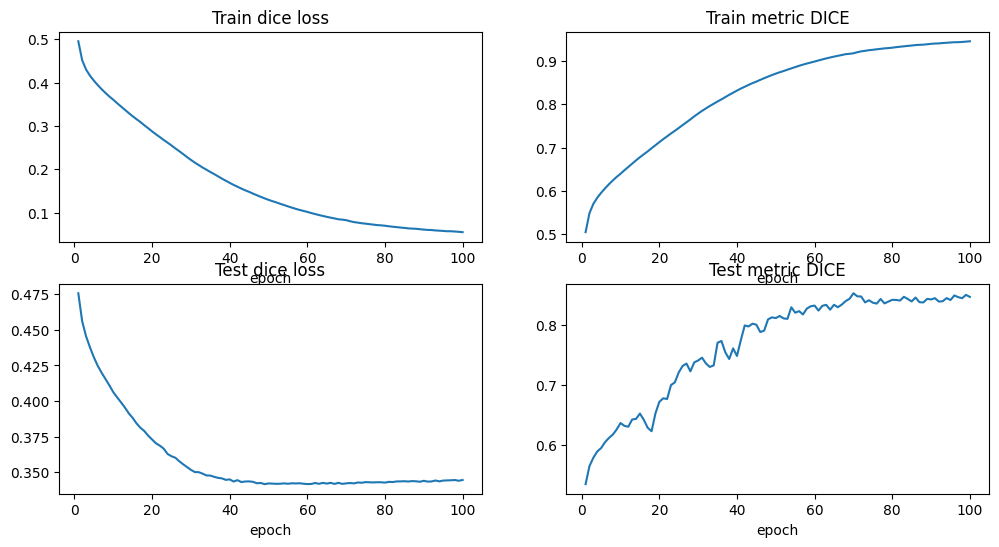

In [7]:
plt.figure("Results 24 August", (12, 6))
plt.subplot(2, 2, 1)
plt.title("Train dice loss")
x = [i + 1 for i in range(len(train_loss))]
y = train_loss
plt.xlabel("epoch")
plt.plot(x, y)

plt.subplot(2, 2, 2)
plt.title("Train metric DICE")
x = [i + 1 for i in range(len(train_metric))]
y = train_metric
plt.xlabel("epoch")
plt.plot(x, y)

plt.subplot(2, 2, 3)
plt.title("Test dice loss")
x = [i + 1 for i in range(len(test_loss))]
y = test_loss
plt.xlabel("epoch")
plt.plot(x, y)

plt.subplot(2, 2, 4)
plt.title("Test metric DICE")
x = [i + 1 for i in range(len(test_metric))]
y = test_metric
plt.xlabel("epoch")
plt.plot(x, y)

plt.show()

In [22]:
path_train_volumes = sorted(glob(os.path.join(data_dir, "TrainVolumes", "*.nii.gz")))
path_train_segmentation = sorted(glob(os.path.join(data_dir, "TrainSegmentation", "*.nii.gz")))

path_test_volumes = sorted(glob(os.path.join(data_dir, "TestVolumes", "*.nii.gz")))
path_test_segmentation = sorted(glob(os.path.join(data_dir, "TestSegmentation", "*.nii.gz")))

train_files = [{"vol": image_name, "seg": label_name} for image_name, label_name in zip(path_train_volumes, path_train_segmentation)]
test_files = [{"vol": image_name, "seg": label_name} for image_name, label_name in zip(path_test_volumes, path_test_segmentation)]
test_files = test_files[20:50]

In [23]:
test_files

[{'vol': 'C:\\Users\\Dikshant Sharma\\Documents\\Github\\Computer Vision\\Image Segmentation\\data\\train_test\\TestVolumes\\liver_116_8.nii.gz',
  'seg': 'C:\\Users\\Dikshant Sharma\\Documents\\Github\\Computer Vision\\Image Segmentation\\data\\train_test\\TestSegmentation\\liver_116_8.nii.gz'},
 {'vol': 'C:\\Users\\Dikshant Sharma\\Documents\\Github\\Computer Vision\\Image Segmentation\\data\\train_test\\TestVolumes\\liver_116_9.nii.gz',
  'seg': 'C:\\Users\\Dikshant Sharma\\Documents\\Github\\Computer Vision\\Image Segmentation\\data\\train_test\\TestSegmentation\\liver_116_9.nii.gz'},
 {'vol': 'C:\\Users\\Dikshant Sharma\\Documents\\Github\\Computer Vision\\Image Segmentation\\data\\train_test\\TestVolumes\\liver_117_4.nii.gz',
  'seg': 'C:\\Users\\Dikshant Sharma\\Documents\\Github\\Computer Vision\\Image Segmentation\\data\\train_test\\TestSegmentation\\liver_117_4.nii.gz'},
 {'vol': 'C:\\Users\\Dikshant Sharma\\Documents\\Github\\Computer Vision\\Image Segmentation\\data\\train_

In [24]:
test_transforms = Compose(
    [
        LoadImaged(keys=["vol", "seg"]),
        AddChanneld(keys=["vol", "seg"]),
        Spacingd(keys=["vol", "seg"], pixdim=(1.5,1.5,1.0), mode=("bilinear", "nearest")),
        Orientationd(keys=["vol", "seg"], axcodes="RAS"),
        ScaleIntensityRanged(keys=["vol"], a_min=-200, a_max=200,b_min=0.0, b_max=1.0, clip=True), 
        CropForegroundd(keys=['vol', 'seg'], source_key='vol'),
        Resized(keys=["vol", "seg"], spatial_size=[128,128,64]),   
        ToTensord(keys=["vol", "seg"]),
    ]
)

In [25]:
test_ds = Dataset(data=test_files, transform=test_transforms)
test_loader = DataLoader(test_ds, batch_size=1)


In [26]:
device = torch.device("cuda:0")
model = UNet(
    dimensions=3,
    in_channels=1,
    out_channels=2,
    channels=(16, 32, 64, 128, 256), 
    strides=(2, 2, 2, 2),
    num_res_units=2,
    norm=Norm.BATCH,
).to(device)

In [27]:
model.load_state_dict(torch.load(
    os.path.join(model_dir, "best_metric_model.pth")))
model.eval()

UNet(
  (model): Sequential(
    (0): ResidualUnit(
      (conv): Sequential(
        (unit0): Convolution(
          (conv): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
          (adn): ADN(
            (N): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (D): Dropout(p=0.0, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
        (unit1): Convolution(
          (conv): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (adn): ADN(
            (N): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (D): Dropout(p=0.0, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
      )
      (residual): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
    )
    (1): SkipConnection(
      (submodule): Sequential(
        (0): ResidualUnit(
          (conv): Sequential(


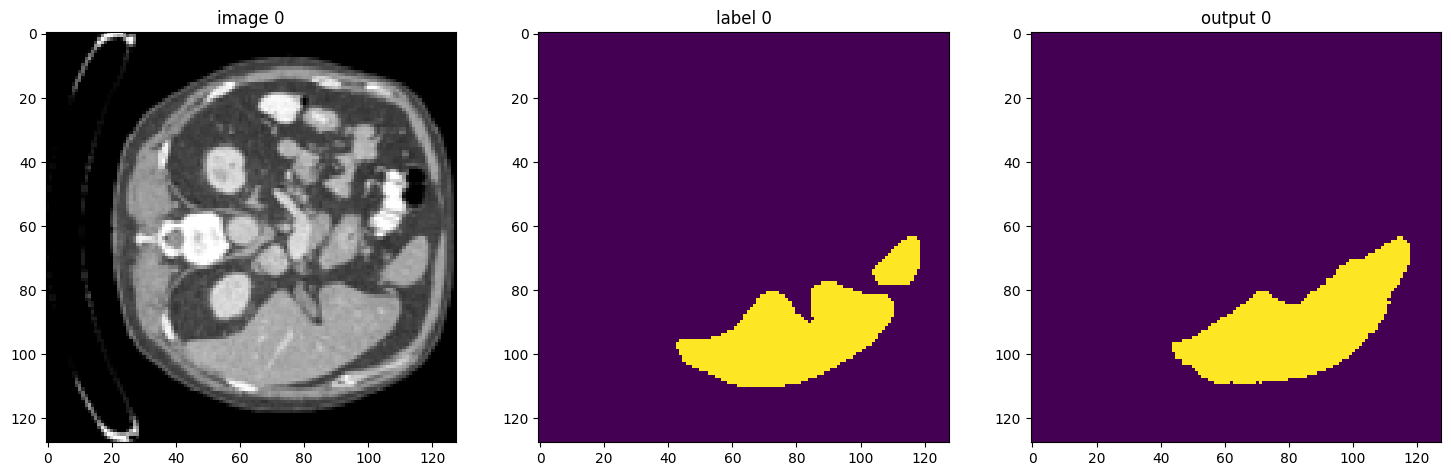

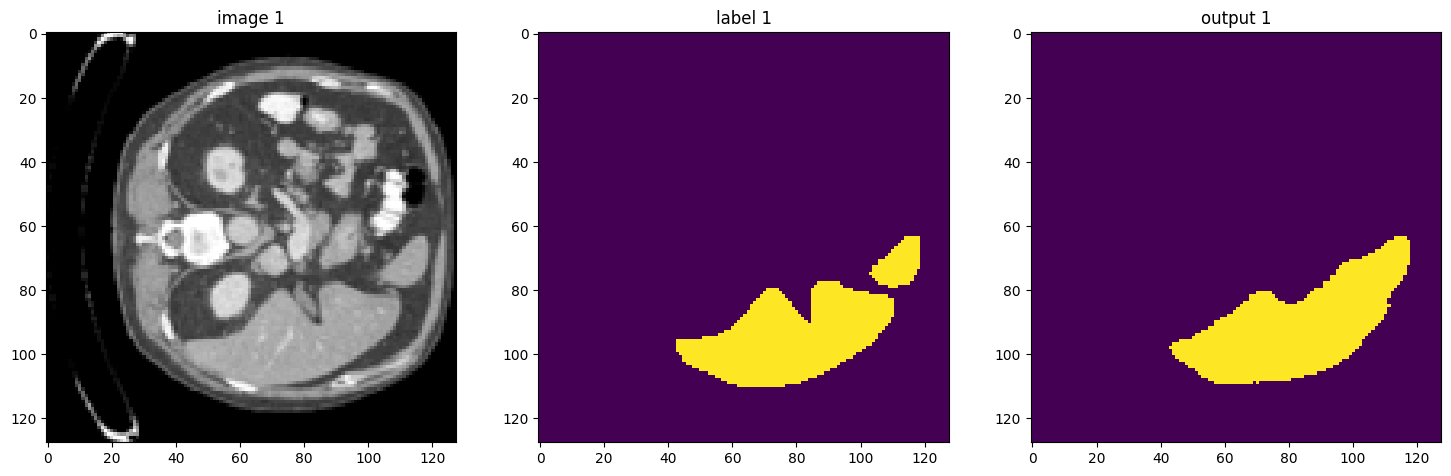

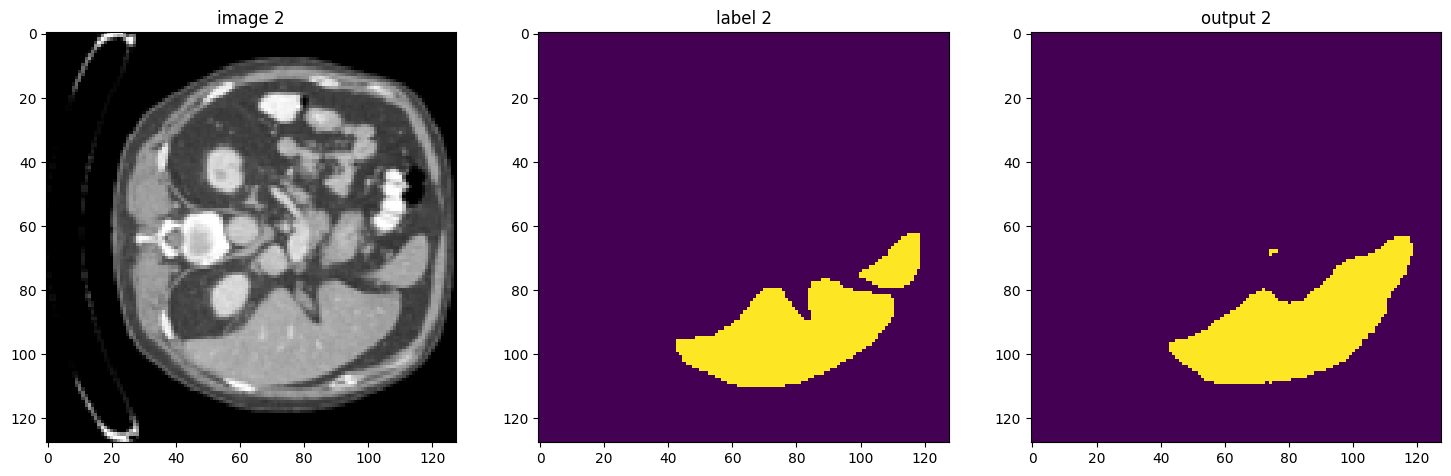

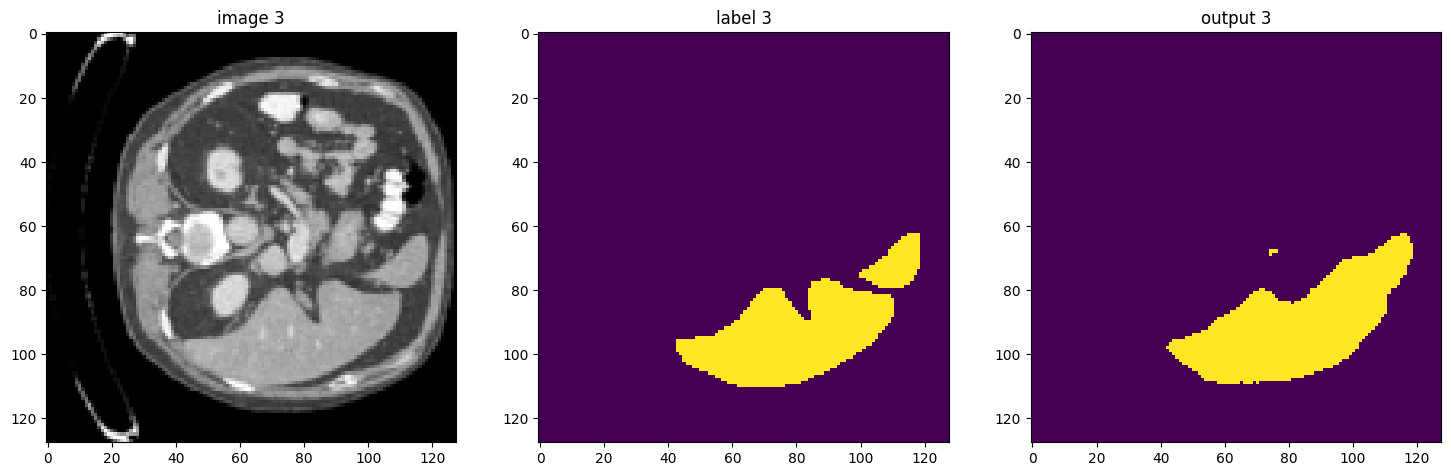

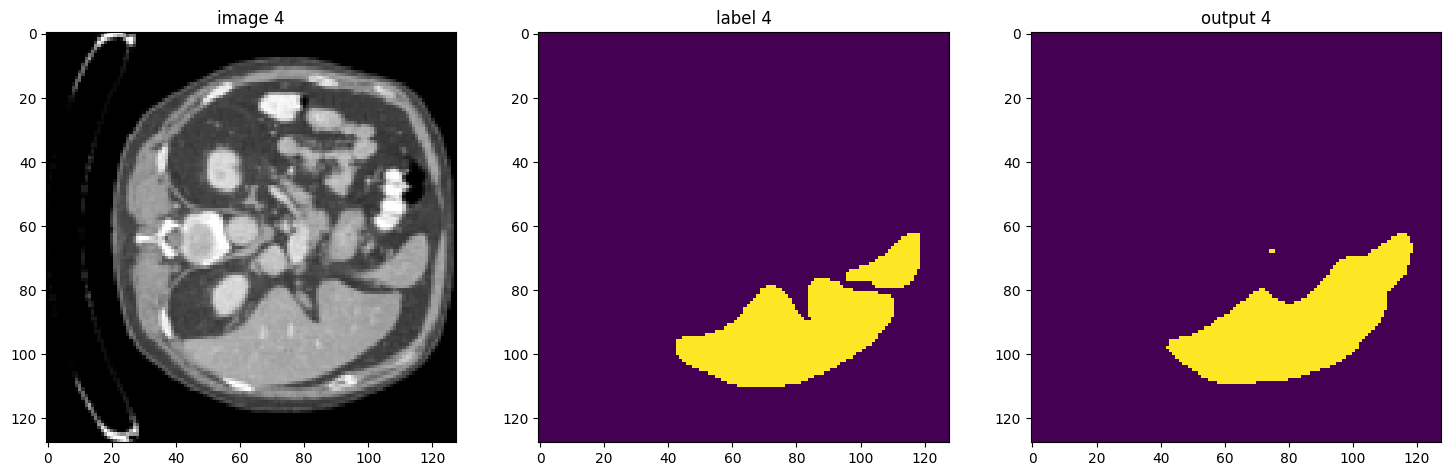

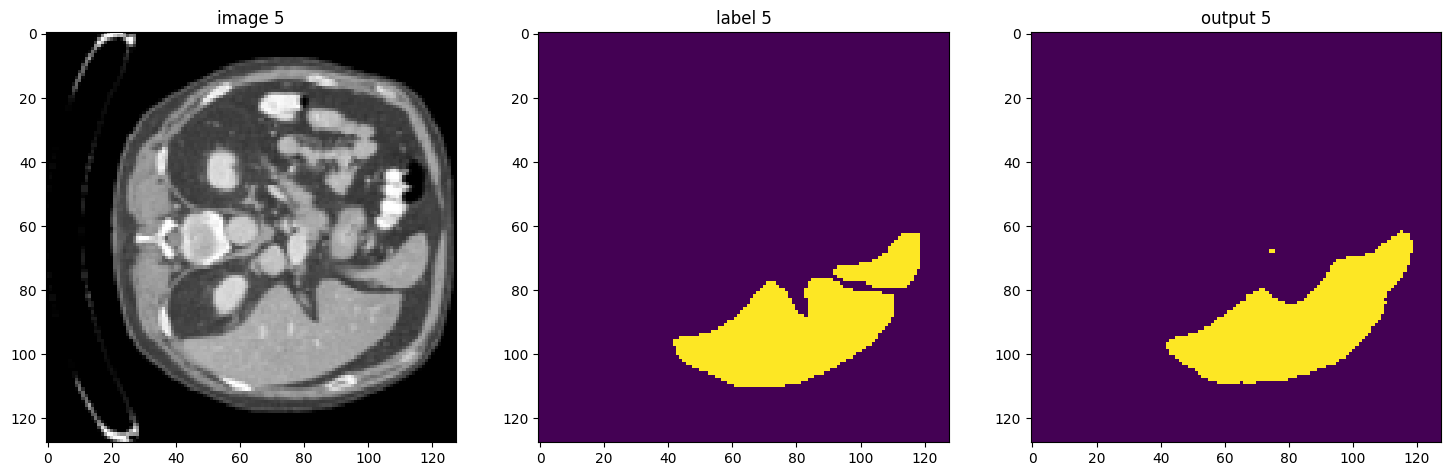

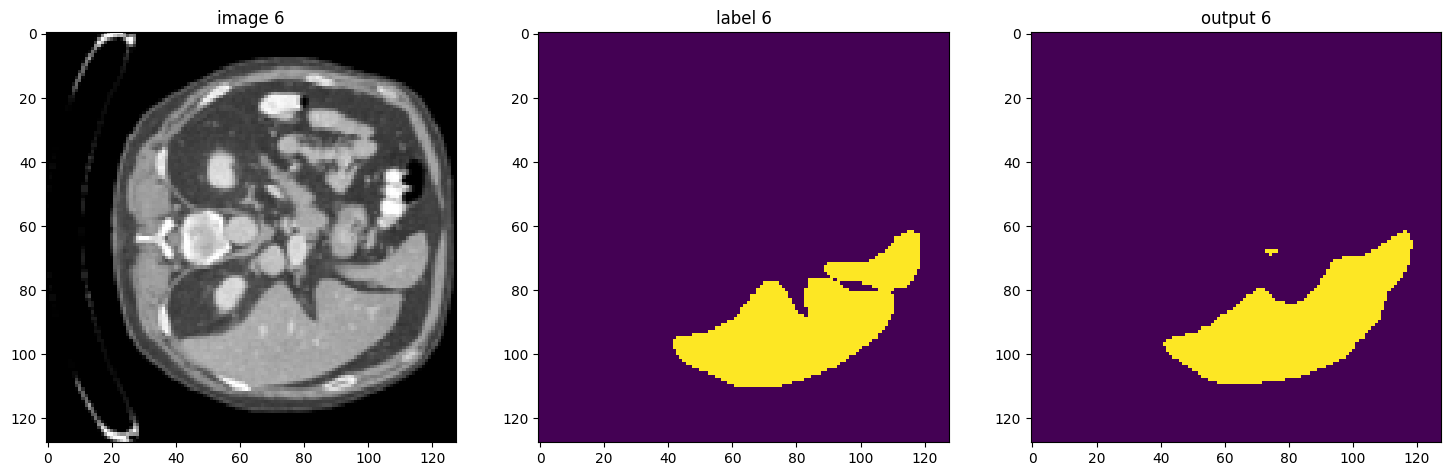

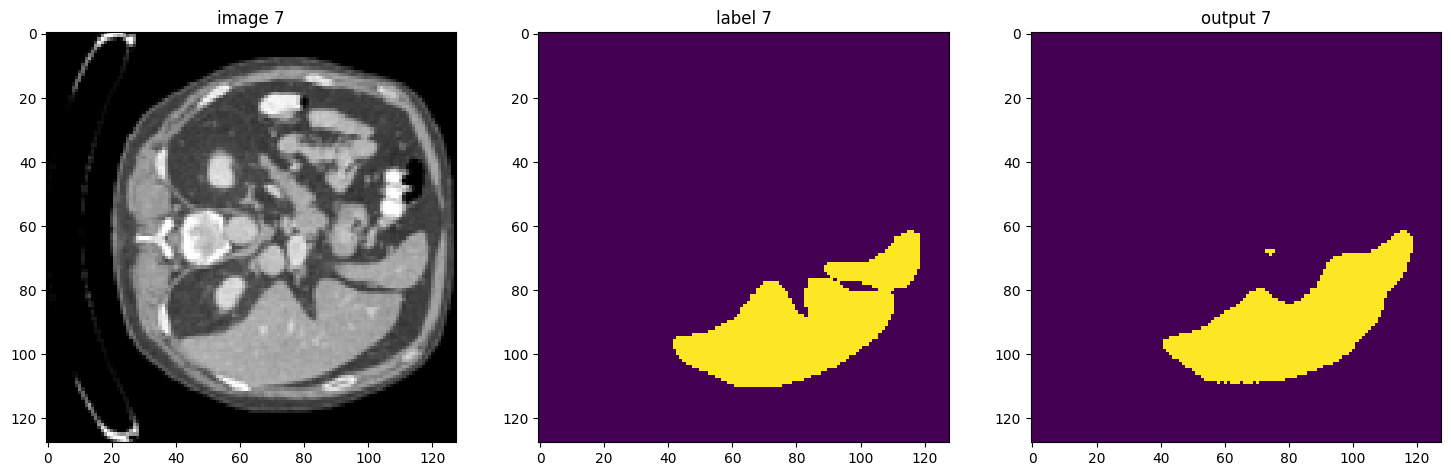

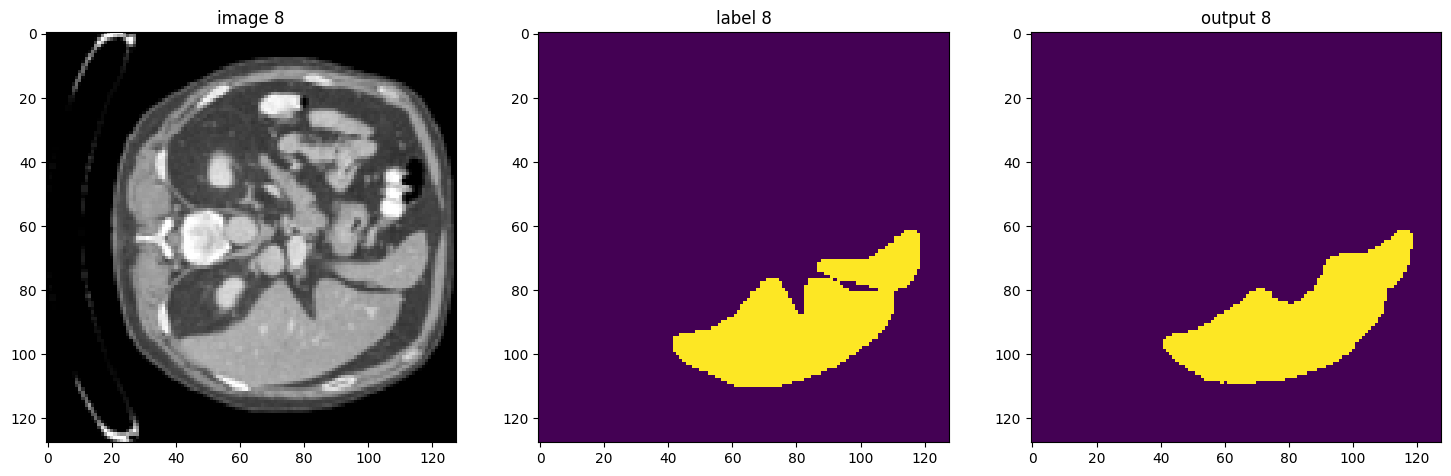

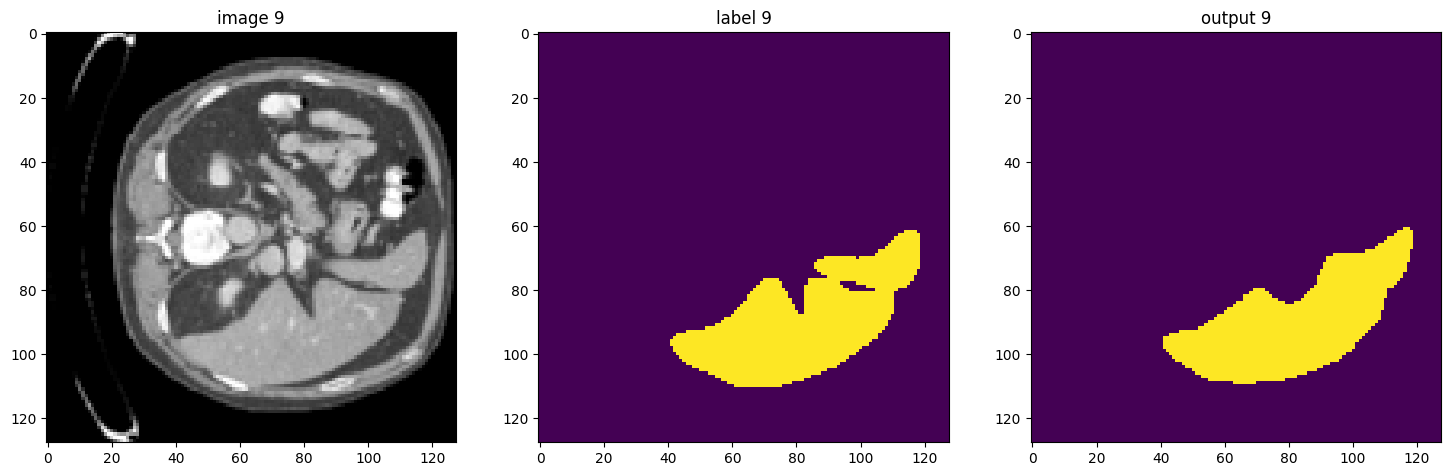

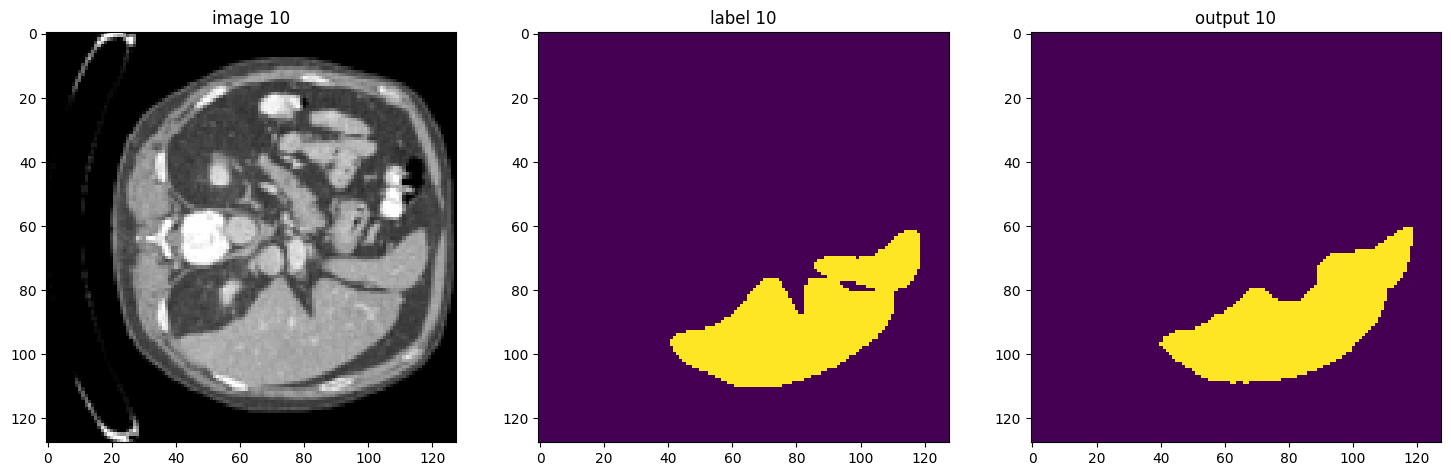

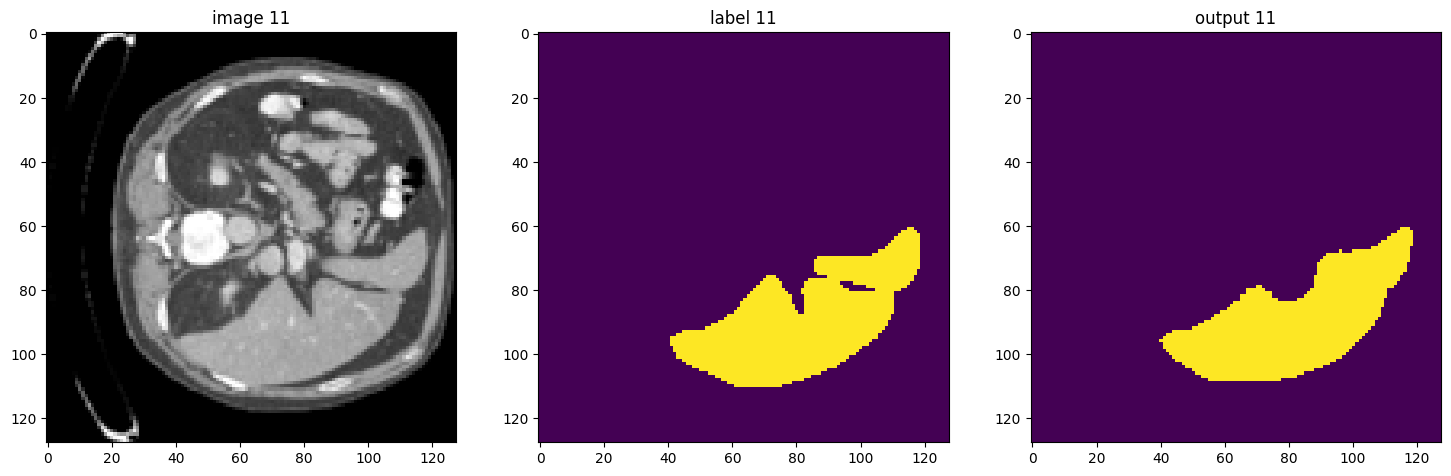

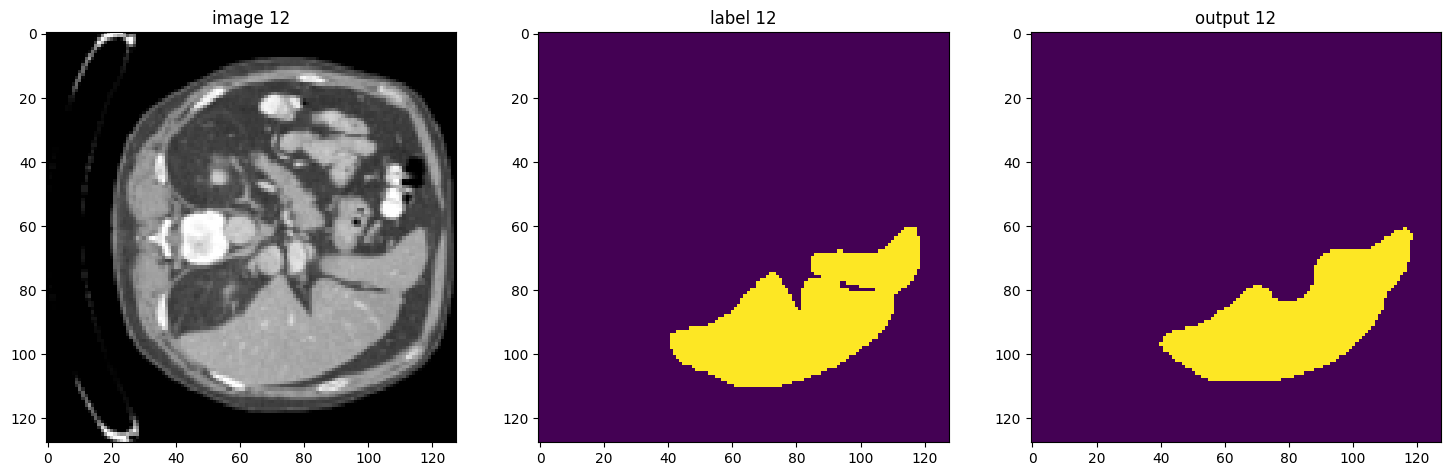

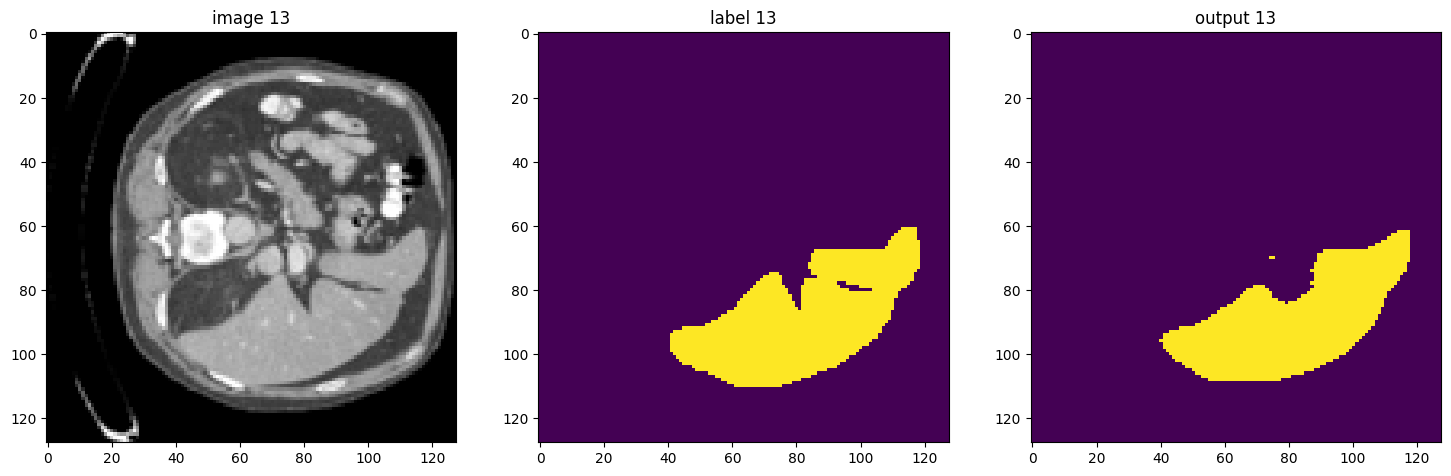

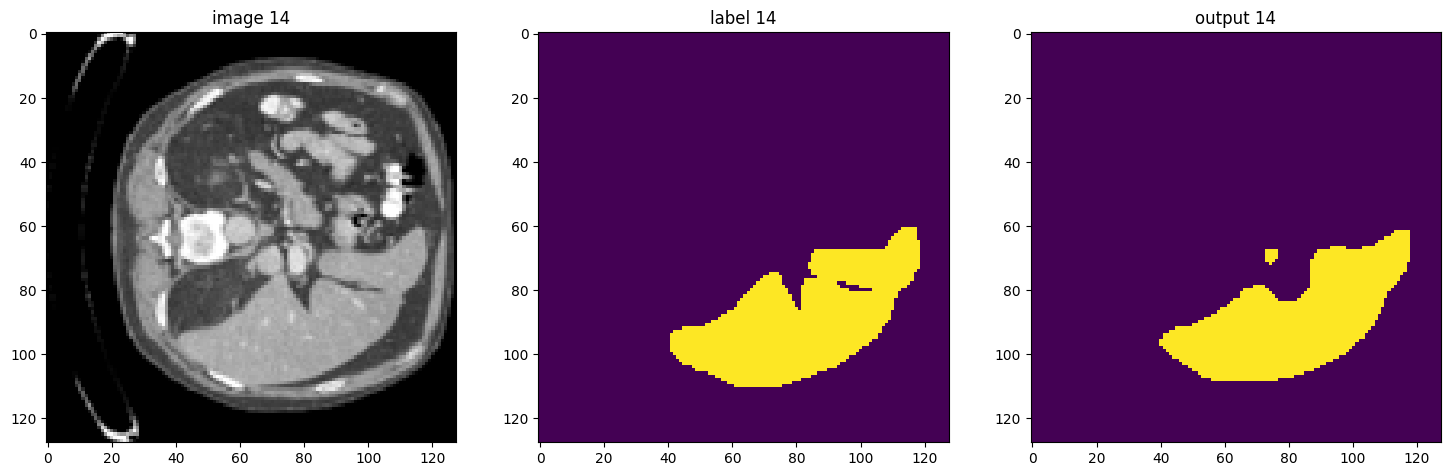

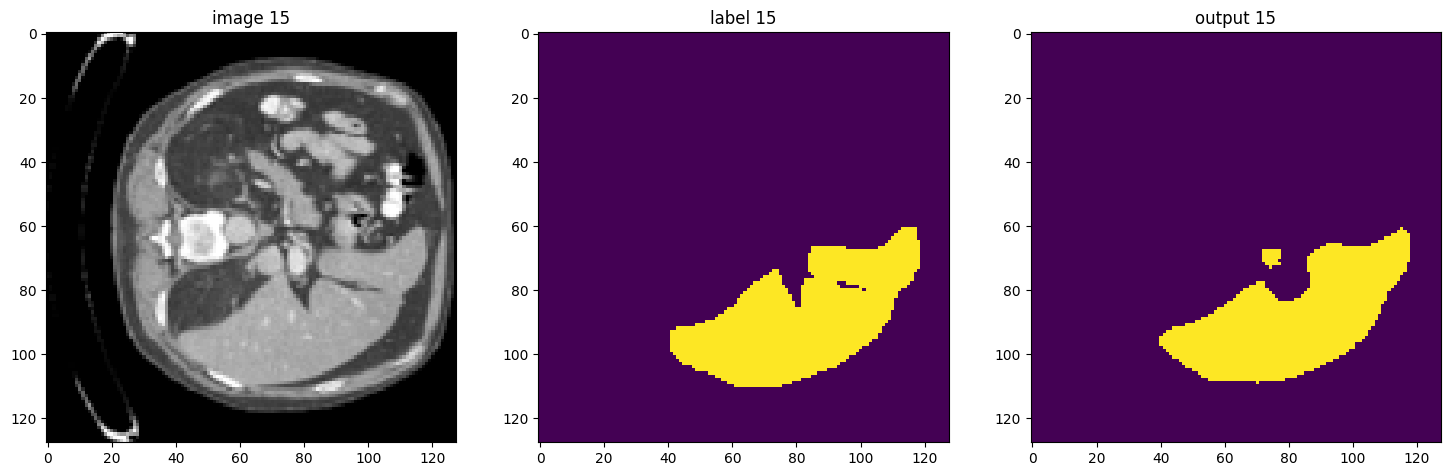

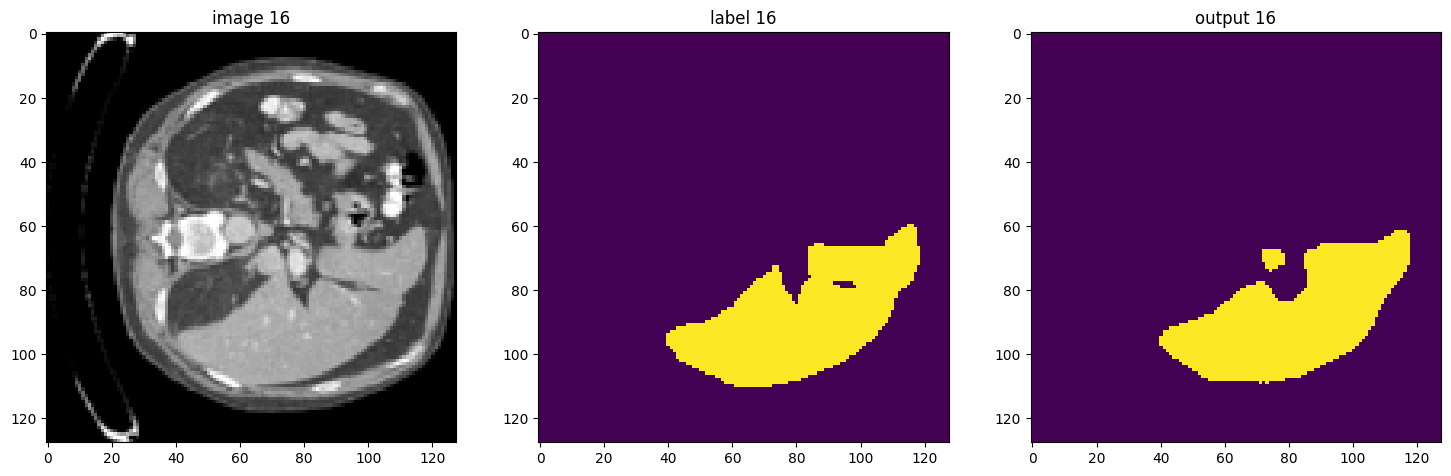

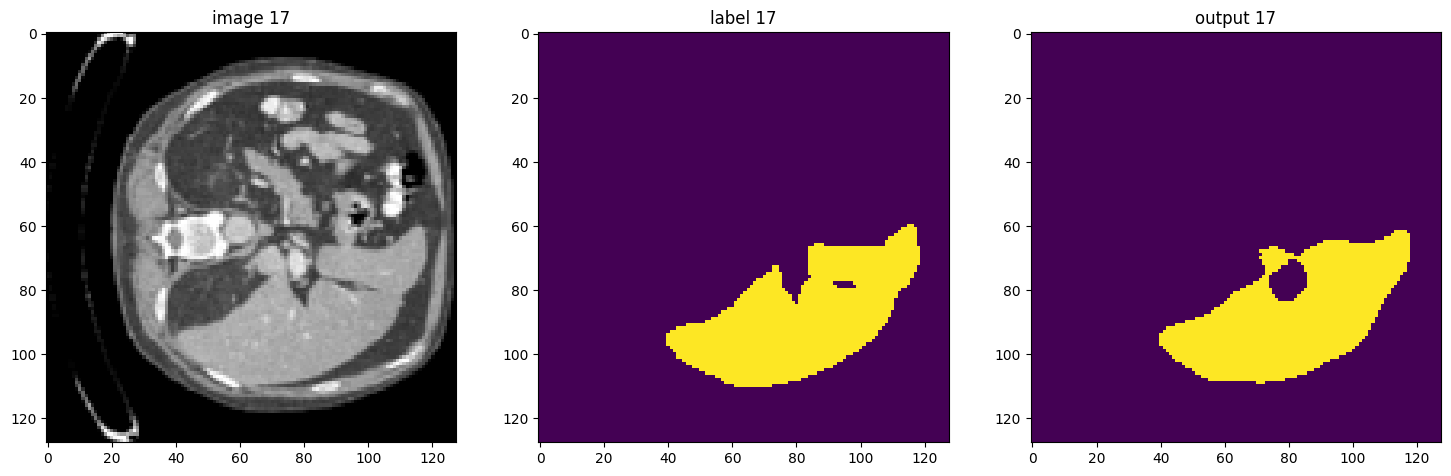

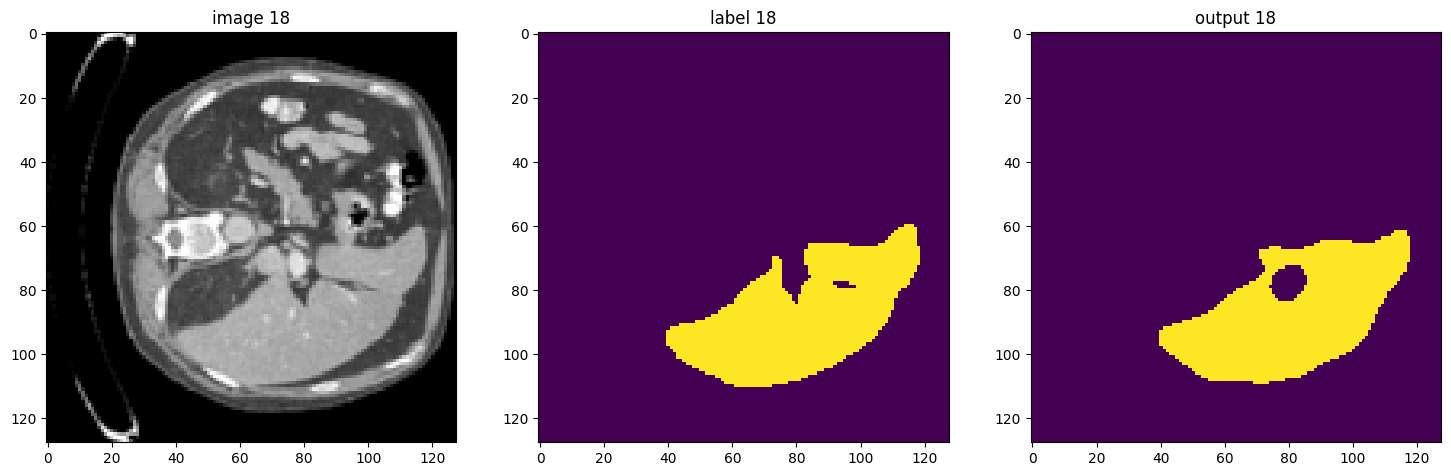

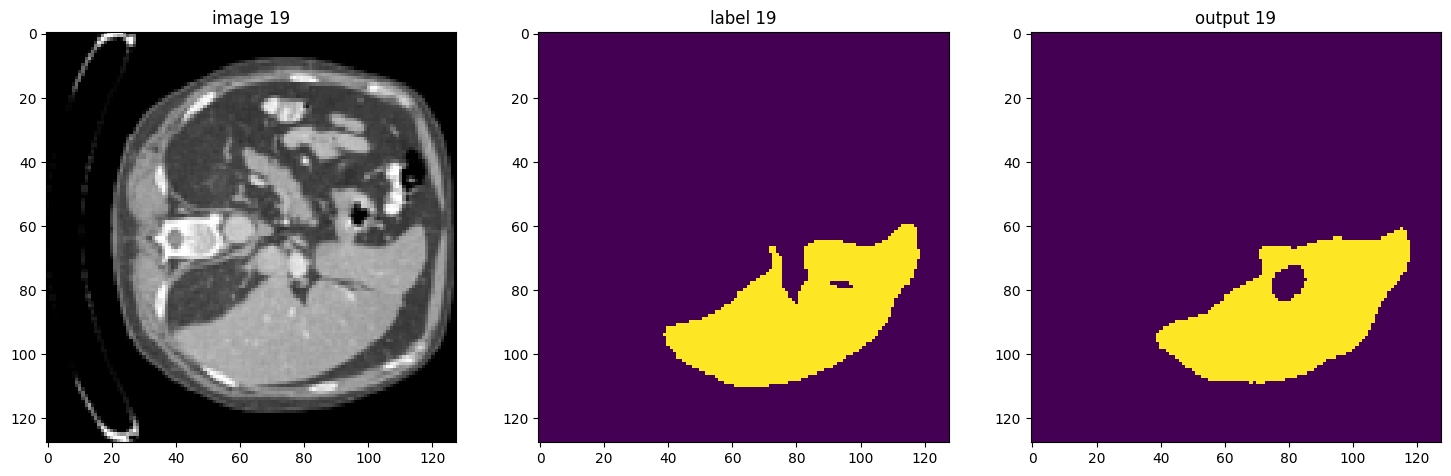

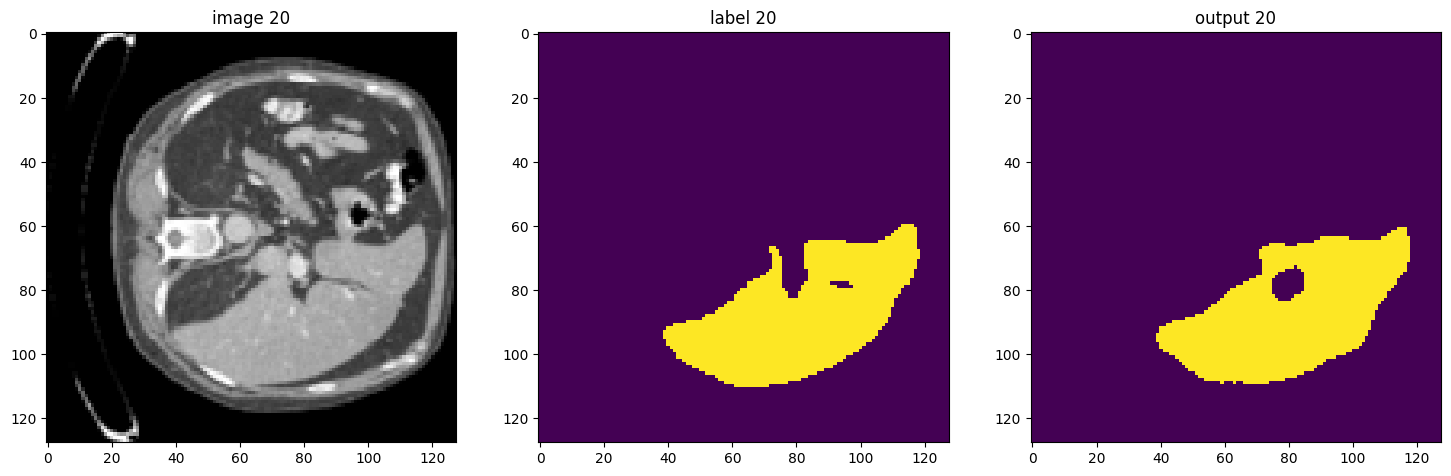

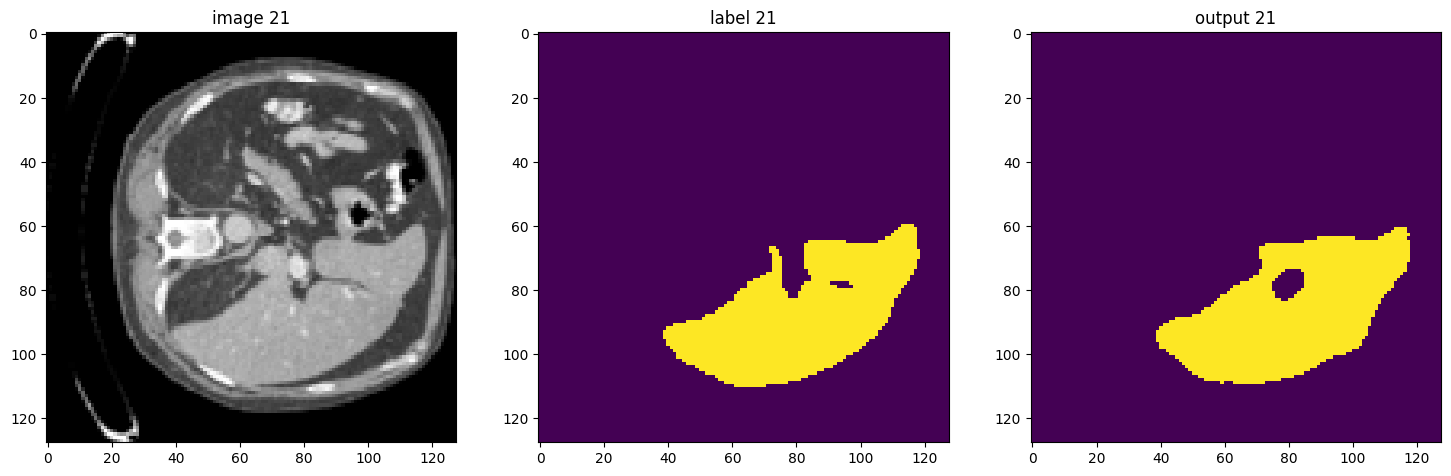

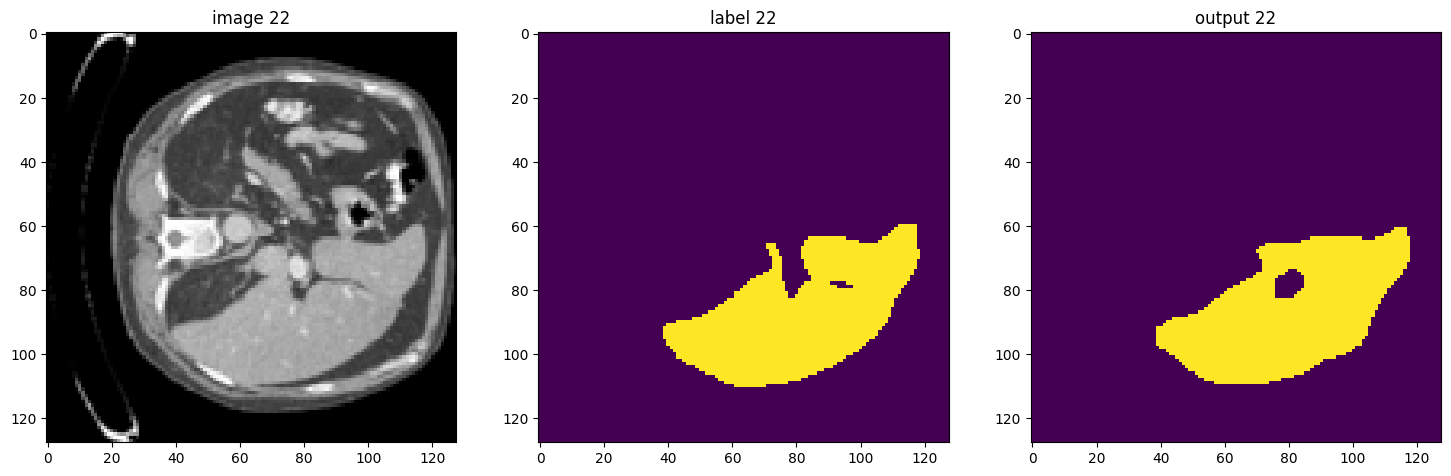

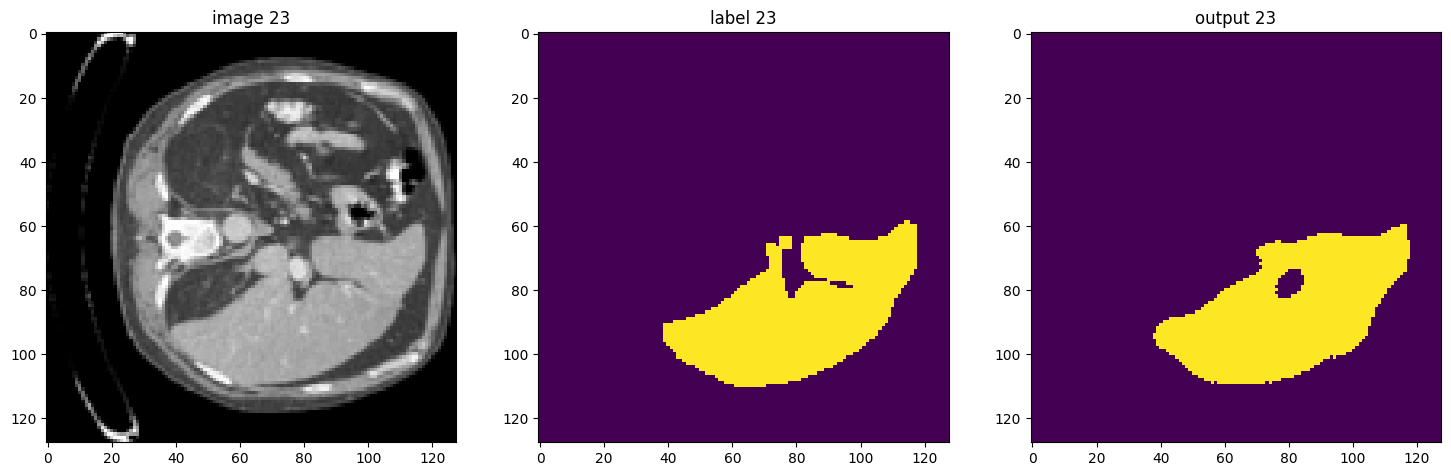

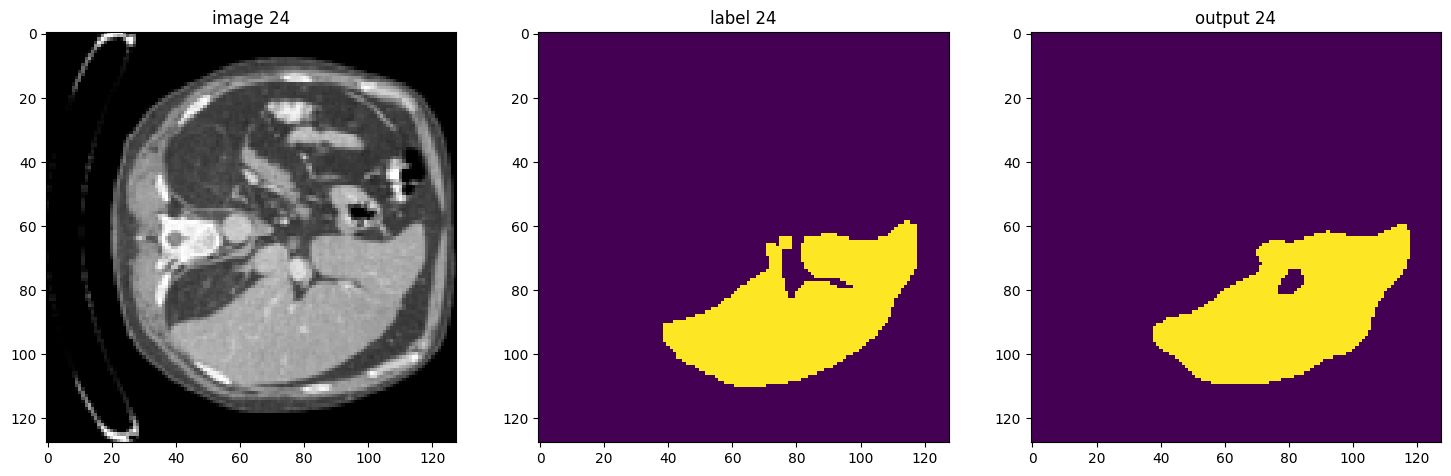

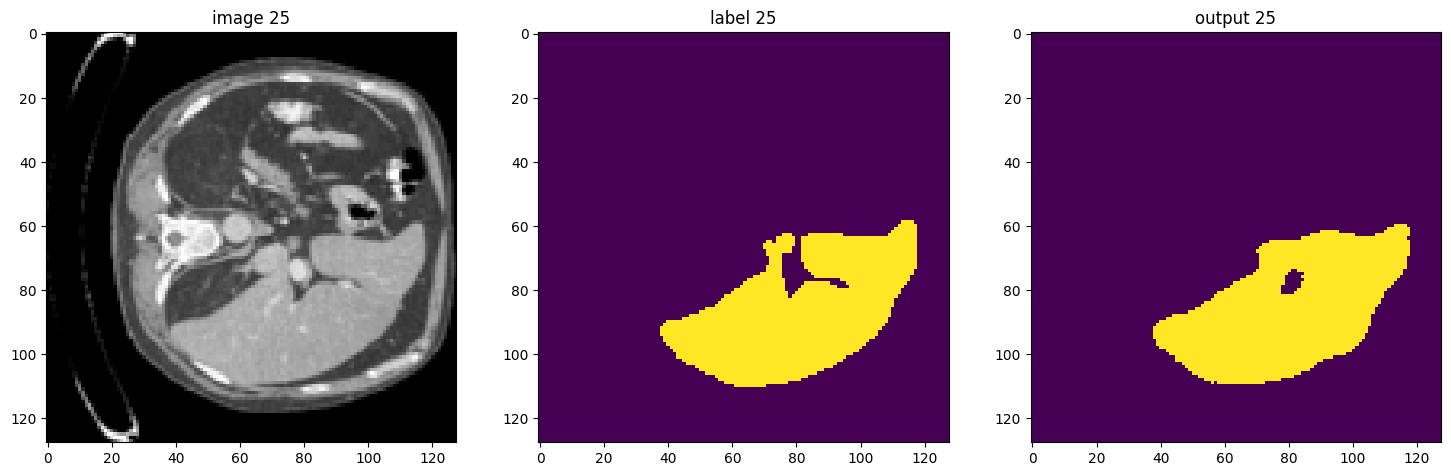

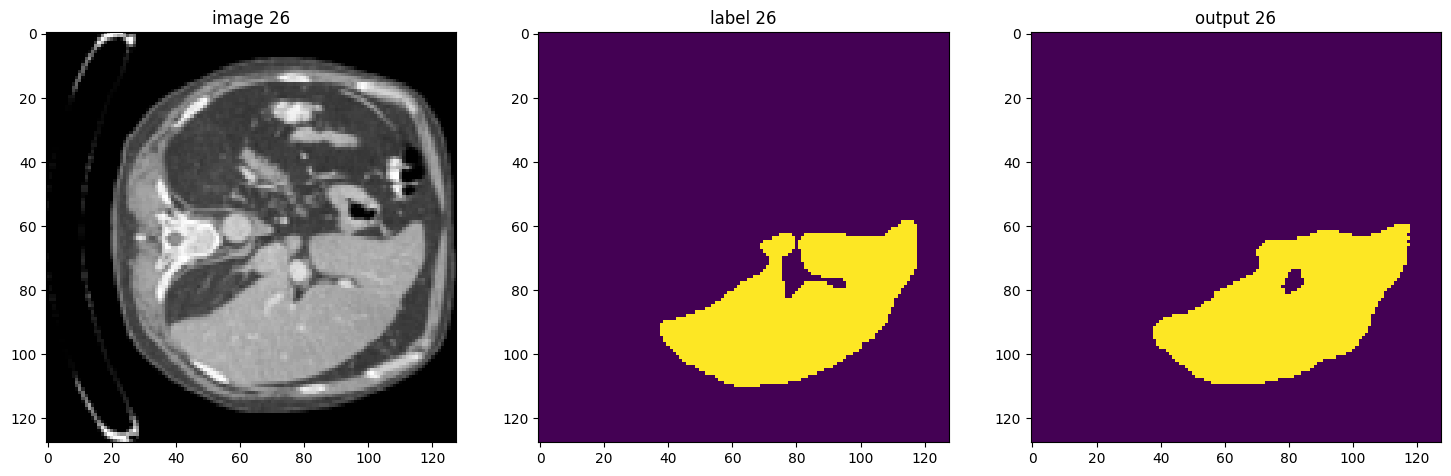

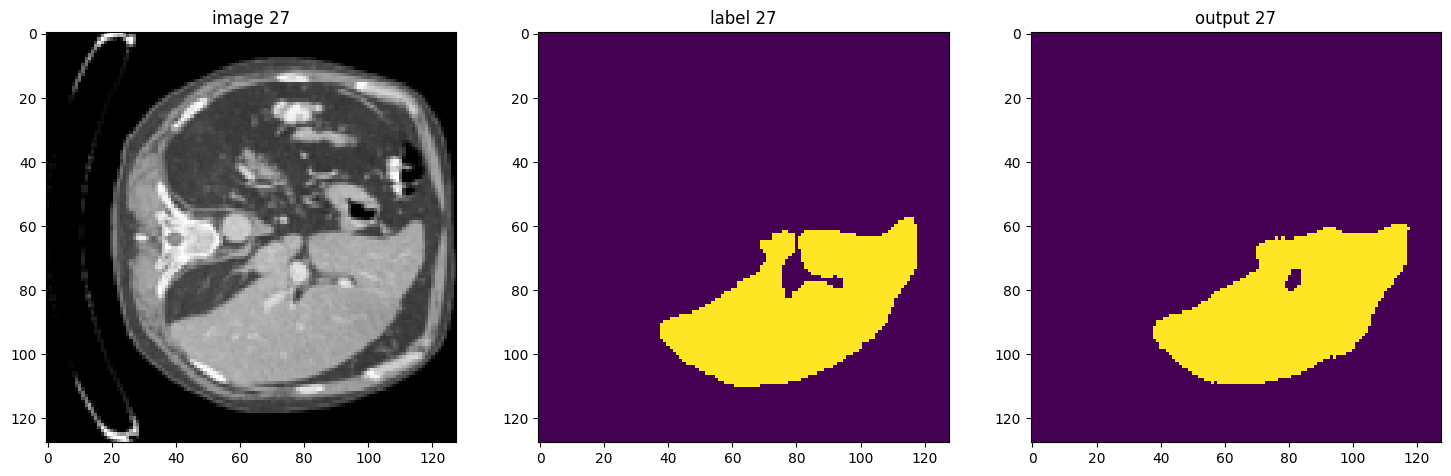

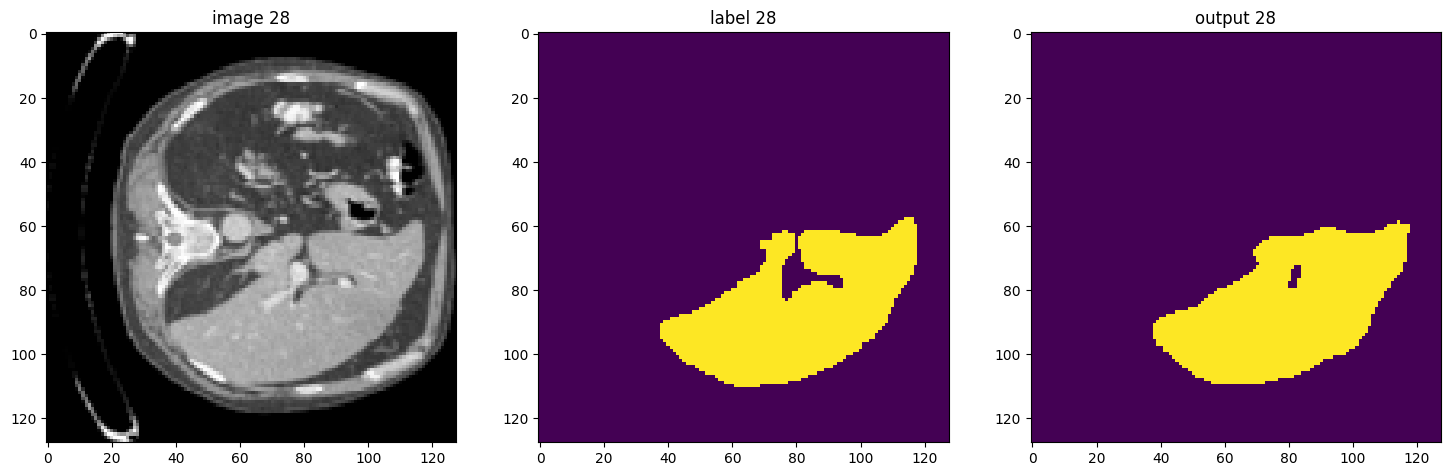

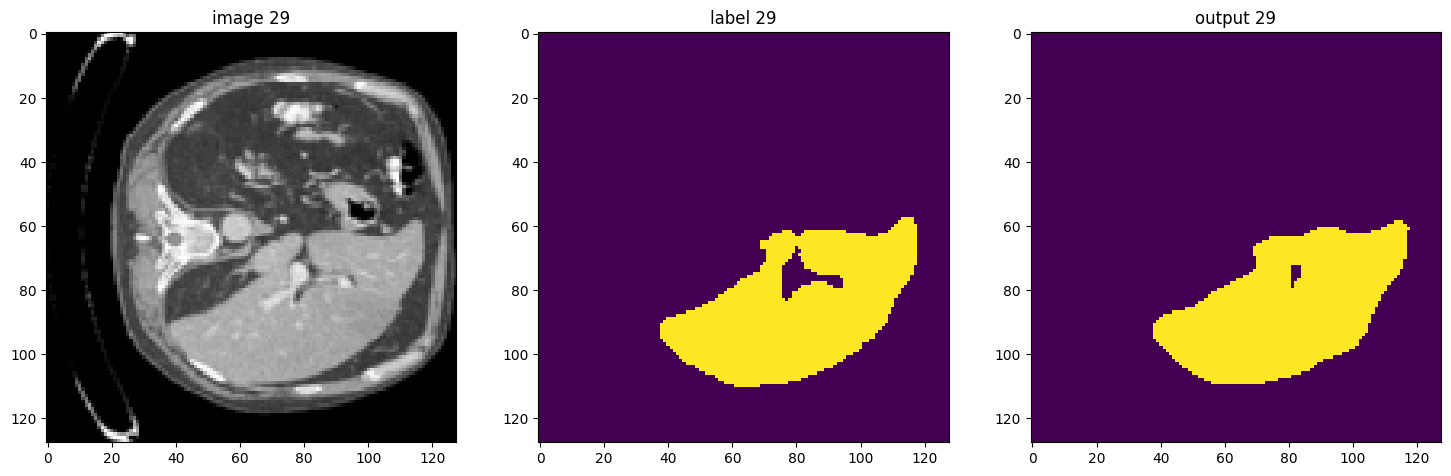

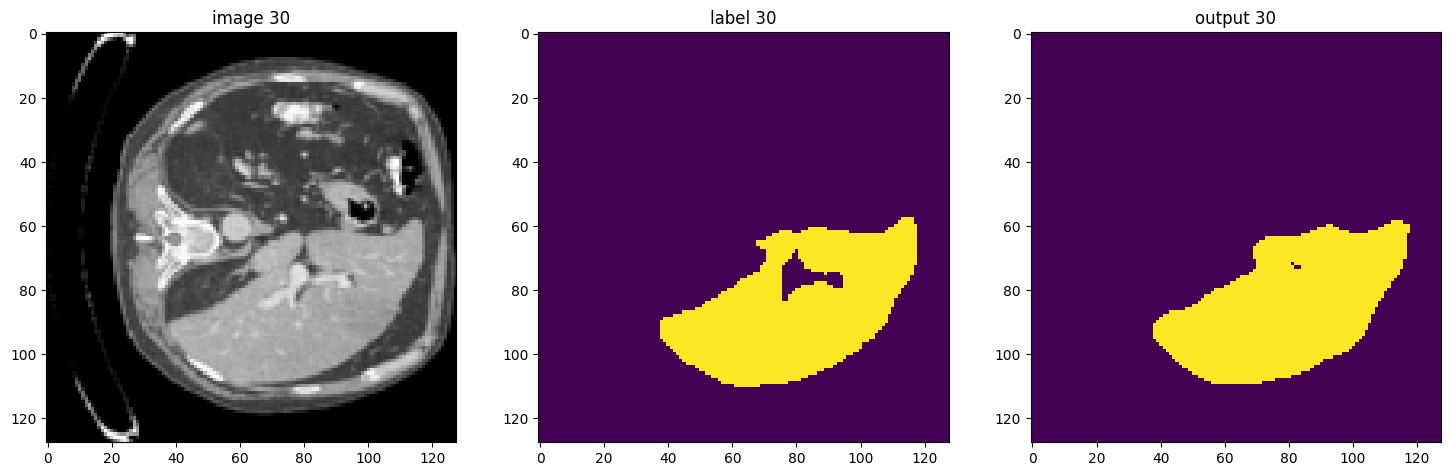

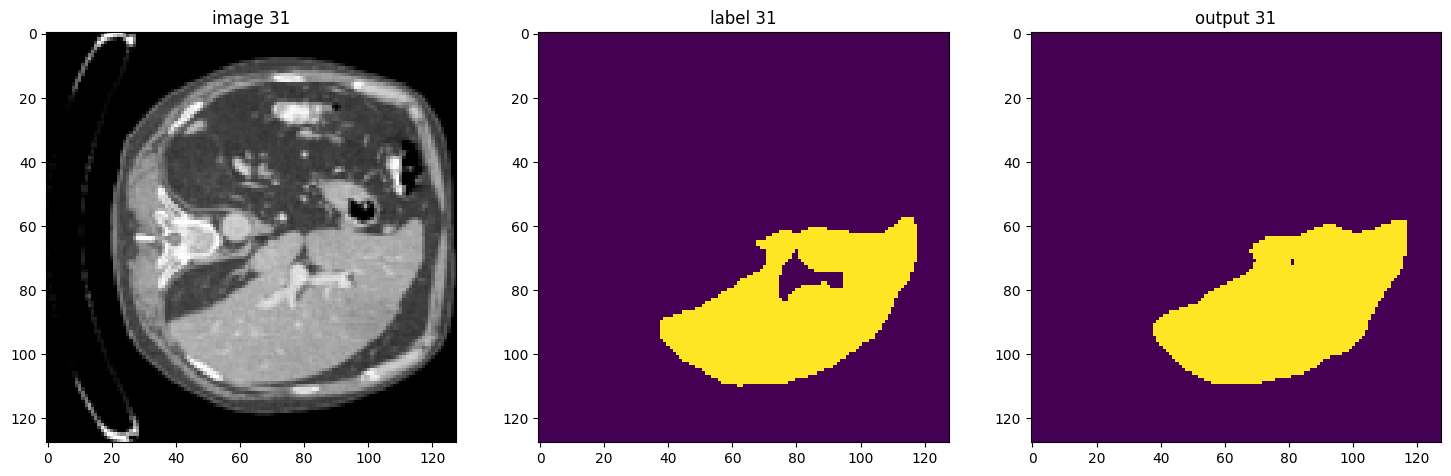

In [28]:
sw_batch_size = 4
roi_size = (128, 128, 64)
with torch.no_grad():
    test_patient = first(test_loader)
    t_volume = test_patient['vol']
    #t_segmentation = test_patient['seg']
    
    test_outputs = sliding_window_inference(t_volume.to(device), roi_size, sw_batch_size, model)
    sigmoid_activation = Activations(sigmoid=True)
    test_outputs = sigmoid_activation(test_outputs)
    test_outputs = test_outputs > 0.53
        
    for i in range(32):
        # plot the slice [:, :, 80]
        plt.figure("check", (18, 6))
        plt.subplot(1, 3, 1)
        plt.title(f"image {i}")
        plt.imshow(test_patient["vol"][0, 0, :, :, i], cmap="gray")
        plt.subplot(1, 3, 2)
        plt.title(f"label {i}")
        plt.imshow(test_patient["seg"][0, 0, :, :, i] != 0)
        plt.subplot(1, 3, 3)
        plt.title(f"output {i}")
        plt.imshow(test_outputs.detach().cpu()[0, 1, :, :, i])
        plt.show()